<a href="https://colab.research.google.com/github/BrainConnection/Qiskit/blob/main/Project%20Quantum%20Challenge/%231%20IBMQ%20QASM%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install matplotlib
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
import numpy as np

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import C3XGate, SwapGate

In [3]:
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

In [4]:
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")

sampler = Sampler(backend=backend)

#1. Fair Quantum Coin Operator & Four-Sided Fair Quantum Coin Operator

1) Quantum Coin State

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


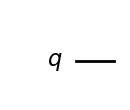

In [5]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.draw("mpl")

2) Fair Quantum Coin Operator

Fair Quantum Coin Operator

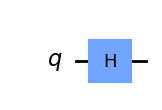

In [6]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.h(0)
Two_Sided_Fair_Coin.draw("mpl")

Verifying Fair Quantum Coin Operator

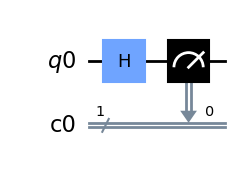

In [7]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
Two_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

Two_Sided_Fair_Coin_Circuit.h(q0)
Two_Sided_Fair_Coin_Circuit.measure(q0, c0)

Two_Sided_Fair_Coin_Circuit.draw("mpl")

>>> Job ID: cl85svtfa6vtjv91fbk0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.50282, 1: 0.49718}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.50282, 1: 0.49718}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


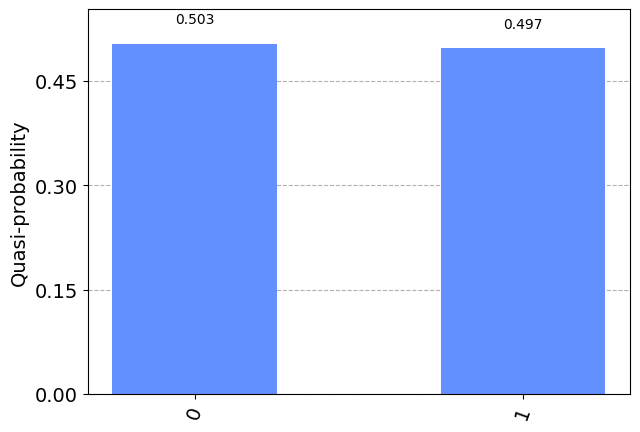

In [8]:
job = sampler.run(Two_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

3) Four-Sided Quantum Coin State

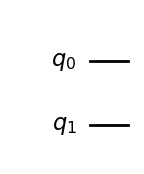

In [9]:
Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.draw("mpl")

4) Four-Sided Fair Quantum Coin Operator

Four-Sided Fair Quantum Coin Operator

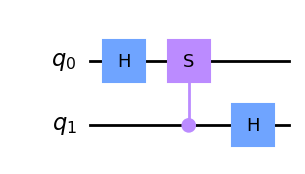

In [10]:
from qiskit.circuit.library.standard_gates import SGate, TGate

csgate = SGate().control(1) # the parameter is the amount of control points you want

Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.h(0)
Four_Sided_Fair_Coin.append(csgate, [1, 0])
Four_Sided_Fair_Coin.h(1)

Four_Sided_Fair_Coin.draw("mpl")

Verifying Four-Sided Fair Quantum Coin Operator

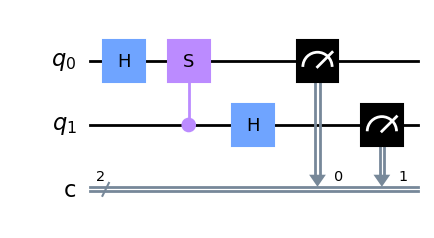

In [11]:
qubits = QuantumRegister(2, 'q')
clbits = ClassicalRegister(2, 'c')
Four_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,q1,) = qubits
(c0,c1,) = clbits

Four_Sided_Fair_Coin_Circuit.h(q0)
Four_Sided_Fair_Coin_Circuit.append(csgate, [q1, q0])
Four_Sided_Fair_Coin_Circuit.h(q1)
Four_Sided_Fair_Coin_Circuit.measure(qubits, clbits)

Four_Sided_Fair_Coin_Circuit.draw("mpl")

>>> Job ID: cl85t157pau17fl758e0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.25226, 3: 0.24948, 2: 0.24756, 0: 0.2507}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.25226, 3: 0.24948, 2: 0.24756, 0: 0.2507}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


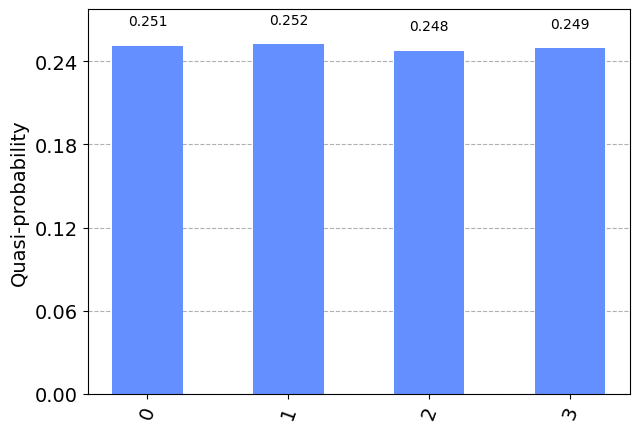

In [12]:
job = sampler.run(Four_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

5) Fairness Check

all matrix elements of each operator have same absolute value, thus unbiased coin

#2. Location on the Board

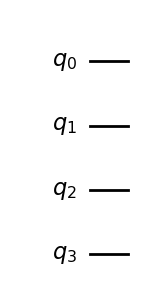

In [13]:
qreg_q = QuantumRegister(4, 'q')
Board = QuantumCircuit(qreg_q)

Board.draw("mpl")

#3. Quantum Coin with Shift Operator

1) Shift Operator

Right Shift Operator

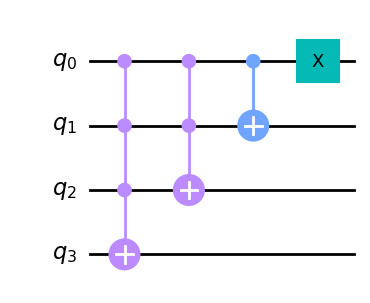

In [14]:
qreg_q = QuantumRegister(4, 'q')
Shift = QuantumCircuit(qreg_q)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.draw("mpl")

Verifying Right Shift Operator

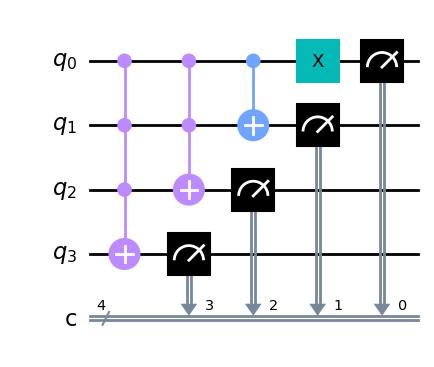

In [15]:
from qiskit.circuit.library.standard_gates import C3XGate

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
Shift = QuantumCircuit(qreg_q, creg_c)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.measure(qreg_q, creg_c)

Shift.draw("mpl")

>>> Job ID: cl85t2h6mcdhud4k1880
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


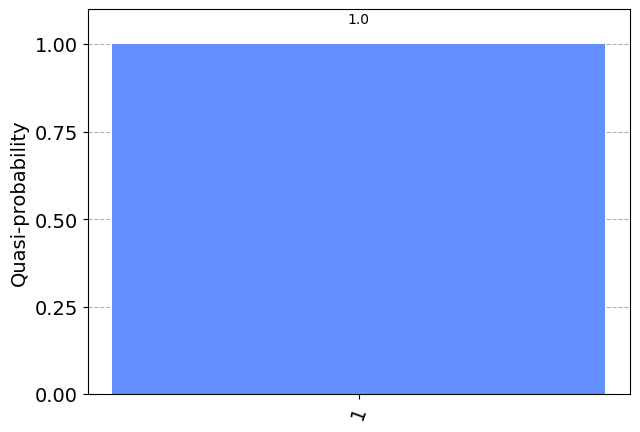

In [16]:
job = sampler.run(Shift, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Right Shift. |0000> -> |0001>
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Shift Operator with Quantum Coin Operator

Shift Operator

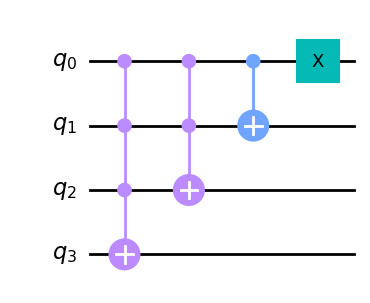

In [17]:
Shift = QuantumCircuit(4)
Shift.append(C3XGate(), [0,1,2,3])
Shift.ccx(0,1,2)
Shift.cx(0,1)
Shift.x(0)

Shift.draw("mpl")

1 Step Board Evolution Operator

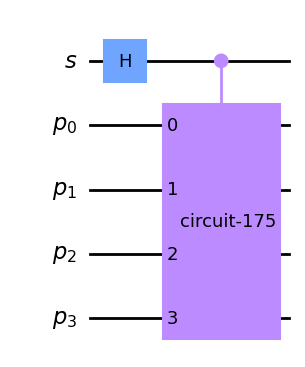

In [18]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.draw("mpl")

N Step Board Evolution Operator

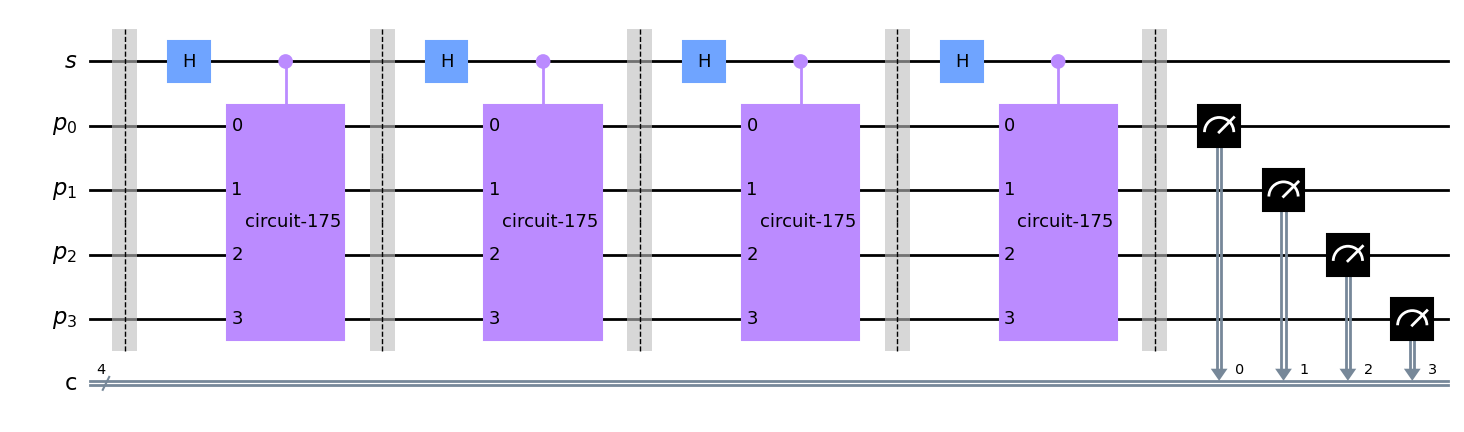

In [19]:
# varying N
N = 4

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl85t4775e3r3c6jbkrg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.06337, 2: 0.12416, 0: 0.06289, 1: 0.62454, 3: 0.12504}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.06337, 2: 0.12416, 0: 0.06289, 1: 0.62454, 3: 0.12504}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

4


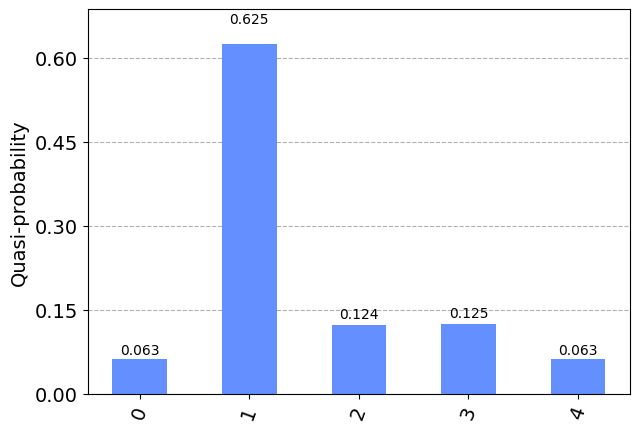

In [20]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying N Step Board Evolution Operator

>>> Job ID: cl85t4t7pau17fl75amg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
0
{0: 1.0}
0.05859375


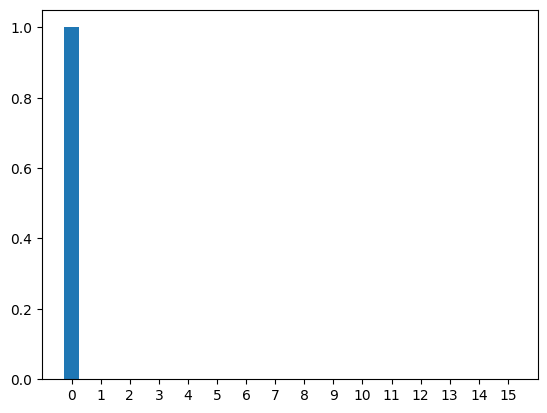



>>> Job ID: cl85t5t7pau17fl75b8g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.50066, 1: 0.49934}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.50066, 1: 0.49934}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
1
{0: 0.50066, 1: 0.49934}
0.027343804450000002


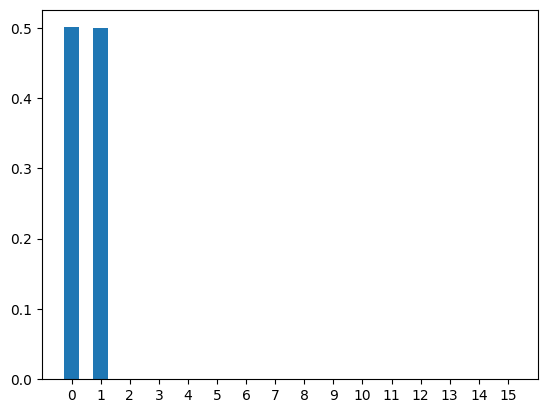



>>> Job ID: cl85t6l7pau17fl75bkg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.49915, 0: 0.25117, 2: 0.24968}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.49915, 0: 0.25117, 2: 0.24968}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
2
{1: 0.49915, 0: 0.25117, 2: 0.24968}
0.0195048246125


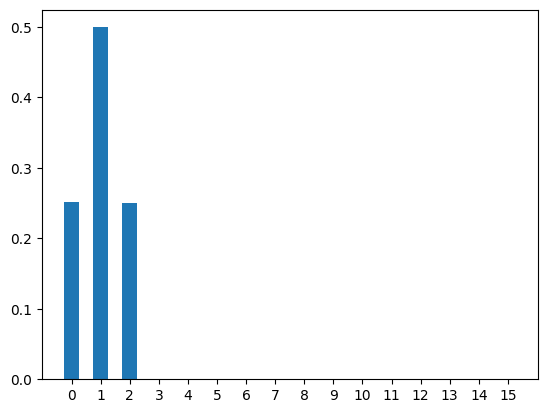



>>> Job ID: cl85t7dfa6vtjv91fg1g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.12493, 1: 0.62552, 0: 0.12521, 2: 0.12434}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.12493, 1: 0.62552, 0: 0.12521, 2: 0.12434}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
3
{3: 0.12493, 1: 0.62552, 0: 0.12521, 2: 0.12434}
0.023470047187499996


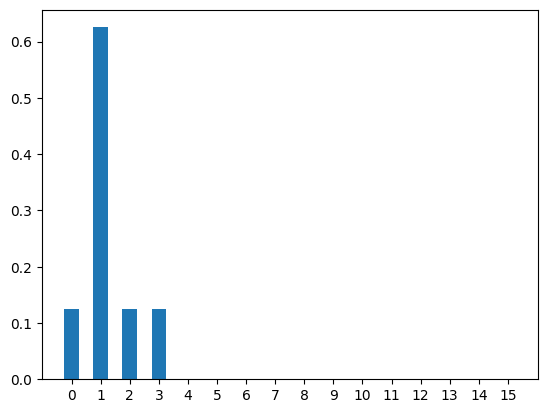



>>> Job ID: cl85t896mcdhud4k1b50
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.12528, 4: 0.06228, 1: 0.62536, 0: 0.06272, 2: 0.12436}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.12528, 4: 0.06228, 1: 0.62536, 0: 0.06272, 2: 0.12436}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
4
{3: 0.12528, 4: 0.06228, 1: 0.62536, 0: 0.06272, 2: 0.12436}
0.022971763400000005


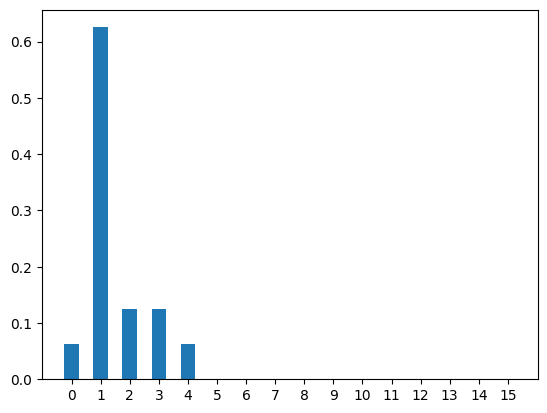



>>> Job ID: cl85t95fa6vtjv91fgtg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.03153, 2: 0.12333, 3: 0.12533, 4: 0.15606, 5: 0.03177, 1: 0.53198}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.03153, 2: 0.12333, 3: 0.12533, 4: 0.15606, 5: 0.03177, 1: 0.53198}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
5
{0: 0.03153, 2: 0.12333, 3: 0.12533, 4: 0.15606, 5: 0.03177, 1: 0.53198}
0.017361175975


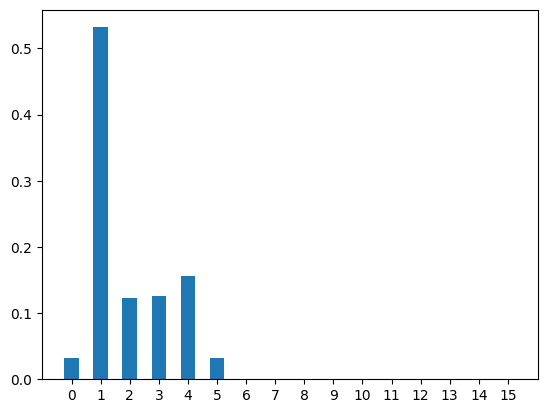



>>> Job ID: cl85t9vl4q34kqgq016g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.20259, 1: 0.40599, 5: 0.15815, 0: 0.01601, 3: 0.1231, 6: 0.01579, 4: 0.07837}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.20259, 1: 0.40599, 5: 0.15815, 0: 0.01601, 3: 0.1231, 6: 0.01579, 4: 0.07837}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
6
{2: 0.20259, 1: 0.40599, 5: 0.15815, 0: 0.01601, 3: 0.1231, 6: 0.01579, 4: 0.07837}
0.011886445112500001


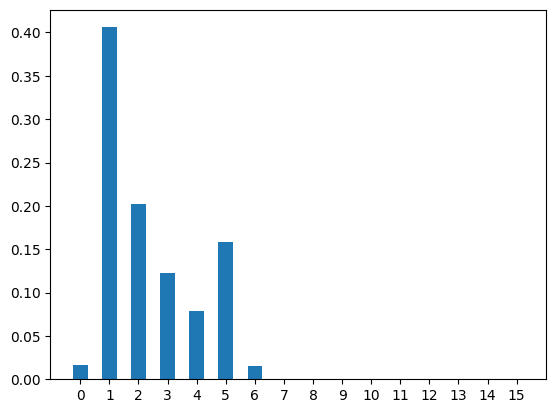



>>> Job ID: cl85tav75e3r3c6jbo4g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.31997, 0: 0.00782, 7: 0.00794, 3: 0.13285, 1: 0.28961, 5: 0.03872, 6: 0.13347, 4: 0.06962}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.31997, 0: 0.00782, 7: 0.00794, 3: 0.13285, 1: 0.28961, 5: 0.03872, 6: 0.13347, 4: 0.06962}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
7
{2: 0.31997, 0: 0.00782, 7: 0.00794, 3: 0.13285, 1: 0.28961, 5: 0.03872, 6: 0.13347, 4: 0.06962}
0.010355530949999999


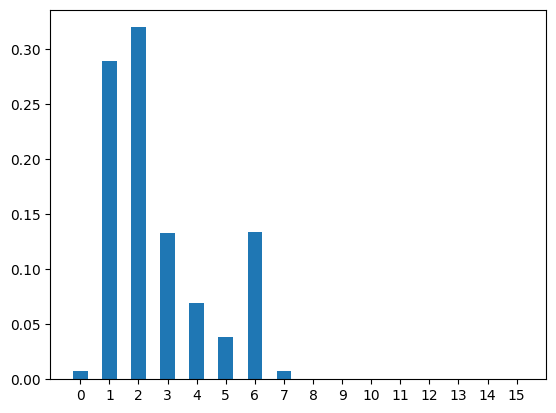



>>> Job ID: cl85tbn75e3r3c6jbog0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.00402, 5: 0.07001, 2: 0.41404, 4: 0.06941, 6: 0.03917, 1: 0.19389, 0: 0.00391, 3: 0.10381, 7: 0.10174}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.00402, 5: 0.07001, 2: 0.41404, 4: 0.06941, 6: 0.03917, 1: 0.19389, 0: 0.00391, 3: 0.10381, 7: 0.10174}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
8
{8: 0.00402, 5: 0.07001, 2: 0.41404, 4: 0.06941, 6: 0.03917, 1: 0.19389, 0: 0.00391, 3: 0.10381, 7: 0.10174}
0.011183430187500001


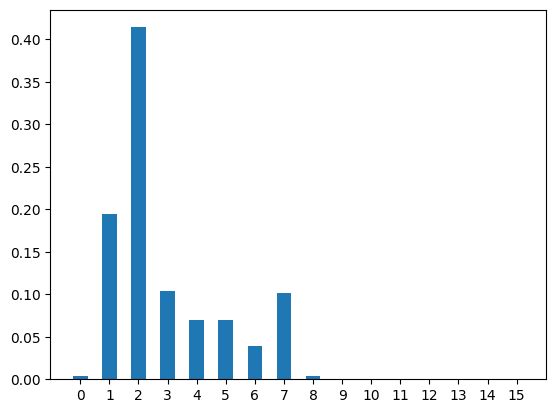



>>> Job ID: cl85tcl7pau17fl75em0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00171, 8: 0.07217, 2: 0.45266, 0: 0.00206, 3: 0.0633, 7: 0.06216, 1: 0.12704, 5: 0.06937, 6: 0.07786, 4: 0.07167}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00171, 8: 0.07217, 2: 0.45266, 0: 0.00206, 3: 0.0633, 7: 0.06216, 1: 0.12704, 5: 0.06937, 6: 0.07786, 4: 0.07167}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
9
{9: 0.00171, 8: 0.07217, 2: 0.45266, 0: 0.00206, 3: 0.0633, 7: 0.06216, 1: 0.12704, 5: 0.06937, 6: 0.07786, 4: 0.07167}
0.011727352174999999


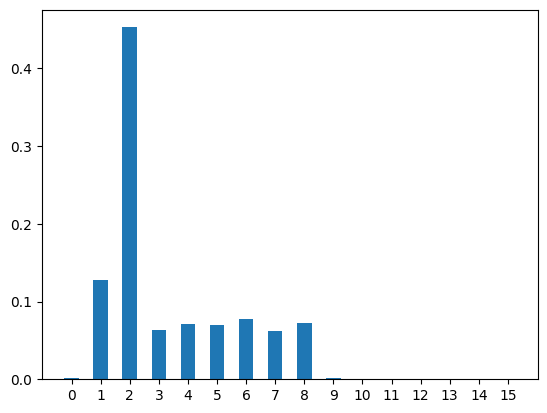



>>> Job ID: cl85td96mcdhud4k1dc0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00102, 9: 0.0493, 1: 0.08007, 5: 0.06924, 2: 0.44089, 8: 0.08544, 0: 0.00091, 7: 0.0626, 3: 0.06285, 6: 0.04962, 4: 0.09806}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00102, 9: 0.0493, 1: 0.08007, 5: 0.06924, 2: 0.44089, 8: 0.08544, 0: 0.00091, 7: 0.0626, 3: 0.06285, 6: 0.04962, 4: 0.09806}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
10
{10: 0.00102, 9: 0.0493, 1: 0.08007, 5: 0.06924, 2: 0.44089, 8: 0.08544, 0: 0.00091, 7: 0.0626, 3: 0.06285, 6: 0.04962, 4: 0.09806}
0.010798032325000002


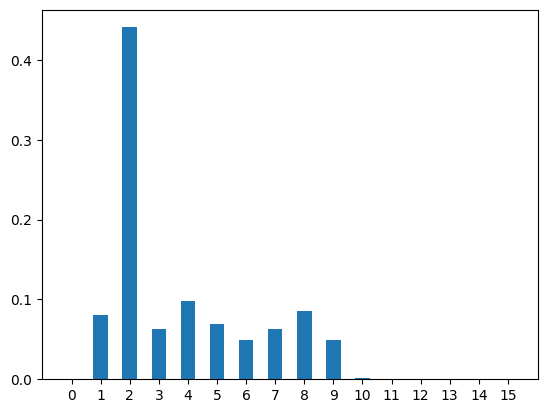



>>> Job ID: cl85te7l4q34kqgq03a0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.00034, 8: 0.03574, 10: 0.03082, 0: 0.00043, 7: 0.03329, 3: 0.1152, 2: 0.38689, 5: 0.07376, 1: 0.04924, 9: 0.10038, 6: 0.04855, 4: 0.12536}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.00034, 8: 0.03574, 10: 0.03082, 0: 0.00043, 7: 0.03329, 3: 0.1152, 2: 0.38689, 5: 0.07376, 1: 0.04924, 9: 0.10038, 6: 0.04855, 4: 0.12536}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
11
{11: 0.00034, 8: 0.03574, 10: 0.03082, 0: 0.00043, 7: 0.03329, 3: 0.1152, 2: 0.38689, 5: 0.07376, 1: 0.04924, 9: 0.10038, 6: 0.04855, 4: 0.12536}
0.008737759275000001


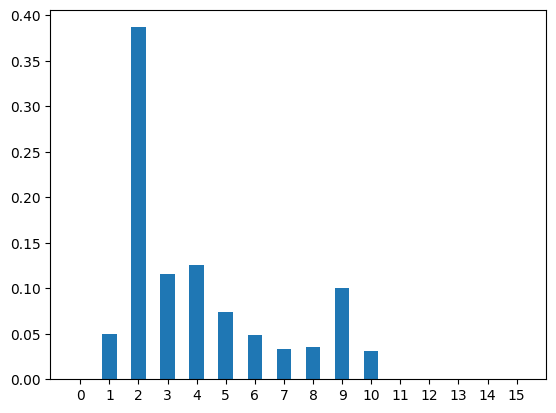



>>> Job ID: cl85tf5fa6vtjv91fk2g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.018, 11: 0.02063, 8: 0.03862, 6: 0.04884, 4: 0.1233, 0: 0.00016, 7: 0.0491, 3: 0.1964, 2: 0.31889, 1: 0.03002, 12: 0.00021, 5: 0.05674, 10: 0.09909}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.018, 11: 0.02063, 8: 0.03862, 6: 0.04884, 4: 0.1233, 0: 0.00016, 7: 0.0491, 3: 0.1964, 2: 0.31889, 1: 0.03002, 12: 0.00021, 5: 0.05674, 10: 0.09909}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
12
{9: 0.018, 11: 0.02063, 8: 0.03862, 6: 0.04884, 4: 0.1233, 0: 0.00016, 7: 0.0491, 3: 0.1964, 2: 0.31889, 1: 0.03002, 12: 0.00021, 5: 0.05674, 10: 0.09909}
0.0071214665499999994


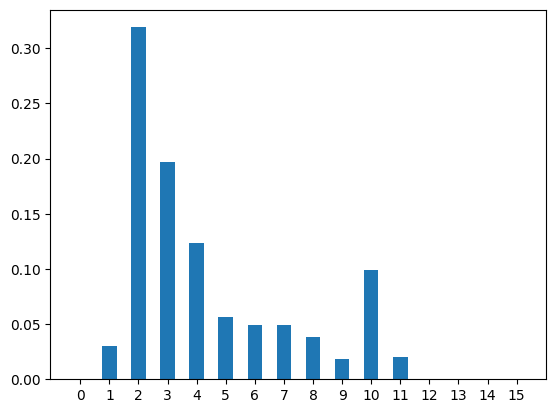



>>> Job ID: cl85tftfa6vtjv91fkj0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00017, 8: 0.0517, 10: 0.01877, 11: 0.08924, 1: 0.01823, 2: 0.24841, 4: 0.08829, 6: 0.04912, 9: 0.05352, 12: 0.01164, 5: 0.04265, 0: 7e-05, 3: 0.27886, 7: 0.04933}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00017, 8: 0.0517, 10: 0.01877, 11: 0.08924, 1: 0.01823, 2: 0.24841, 4: 0.08829, 6: 0.04912, 9: 0.05352, 12: 0.01164, 5: 0.04265, 0: 7e-05, 3: 0.27886, 7: 0.04933}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
13
{13: 0.00017, 8: 0.0517, 10: 0.01877, 11: 0.08924, 1: 0.01823, 2: 0.24841, 4: 0.08829, 6: 0.04912, 9: 0.05352, 12: 0.01164, 5: 0.04265, 0: 7e-05, 3: 0.27886, 7: 0.04933}
0.006609501549999999


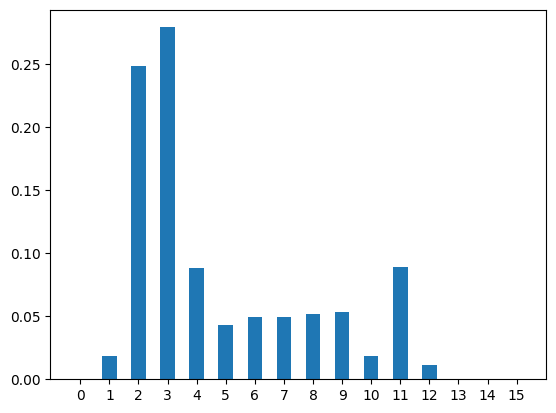



>>> Job ID: cl85tgtfa6vtjv91fl3g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 7e-05, 1: 0.00991, 13: 0.00738, 11: 0.03221, 4: 0.04977, 6: 0.06295, 5: 0.05686, 12: 0.07539, 9: 0.03942, 0: 5e-05, 7: 0.04897, 3: 0.33633, 2: 0.18515, 10: 0.05688, 8: 0.03866}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 7e-05, 1: 0.00991, 13: 0.00738, 11: 0.03221, 4: 0.04977, 6: 0.06295, 5: 0.05686, 12: 0.07539, 9: 0.03942, 0: 5e-05, 7: 0.04897, 3: 0.33633, 2: 0.18515, 10: 0.05688, 8: 0.03866}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
14
{14: 7e-05, 1: 0.00991, 13: 0.00738, 11: 0.03221, 4: 0.04977, 6: 0.06295, 5: 0.05686, 12: 0.07539, 9: 0.03942, 0: 5e-05, 7: 0.04897, 3: 0.33633, 2: 0.18515, 10: 0.05688, 8: 0.03866}
0.006882934362500001


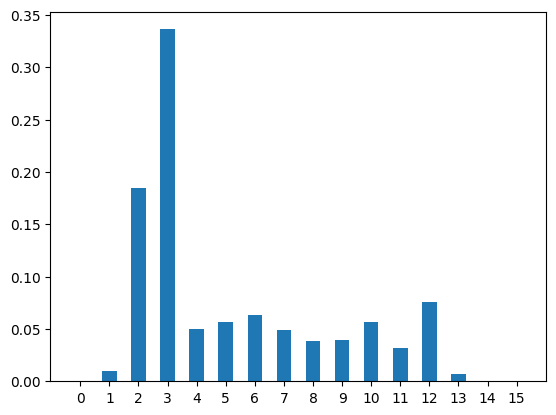



>>> Job ID: cl85thh5o5utp9bvvmdg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00426, 15: 4e-05, 10: 0.02324, 1: 0.00574, 8: 0.03787, 13: 0.05888, 6: 0.07283, 4: 0.03589, 2: 0.1338, 7: 0.05012, 3: 0.35962, 9: 0.02766, 5: 0.09113, 12: 0.05177, 11: 0.04715}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00426, 15: 4e-05, 10: 0.02324, 1: 0.00574, 8: 0.03787, 13: 0.05888, 6: 0.07283, 4: 0.03589, 2: 0.1338, 7: 0.05012, 3: 0.35962, 9: 0.02766, 5: 0.09113, 12: 0.05177, 11: 0.04715}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
15
{14: 0.00426, 15: 4e-05, 10: 0.02324, 1: 0.00574, 8: 0.03787, 13: 0.05888, 6: 0.07283, 4: 0.03589, 2: 0.1338, 7: 0.05012, 3: 0.35962, 9: 0.02766, 5: 0.09113, 12: 0.05177, 11: 0.04715}
0.0070811558374999995


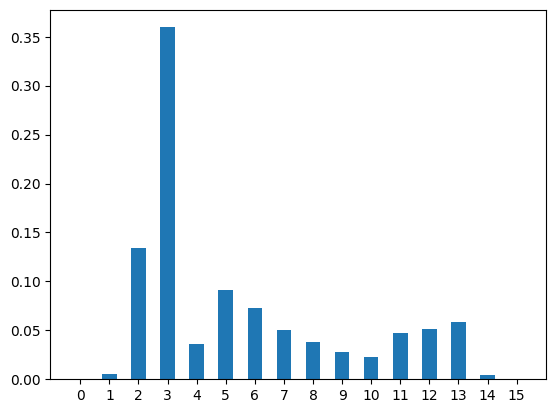



>>> Job ID: cl85tih5o5utp9bvvmqg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.01942, 9: 0.0376, 14: 0.04569, 1: 0.00373, 13: 0.06625, 12: 0.02875, 5: 0.11929, 15: 0.00252, 10: 0.03276, 4: 0.05702, 6: 0.06402, 2: 0.09327, 8: 0.03669, 0: 1e-05, 7: 0.04032, 3: 0.35266}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.01942, 9: 0.0376, 14: 0.04569, 1: 0.00373, 13: 0.06625, 12: 0.02875, 5: 0.11929, 15: 0.00252, 10: 0.03276, 4: 0.05702, 6: 0.06402, 2: 0.09327, 8: 0.03669, 0: 1e-05, 7: 0.04032, 3: 0.35266}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
16
{11: 0.01942, 9: 0.0376, 14: 0.04569, 1: 0.00373, 13: 0.06625, 12: 0.02875, 5: 0.11929, 15: 0.00252, 10: 0.03276, 4: 0.05702, 6: 0.06402, 2: 0.09327, 8: 0.03669, 0: 1e-05, 7: 0.04032, 3: 0.35266}
0.0065817344


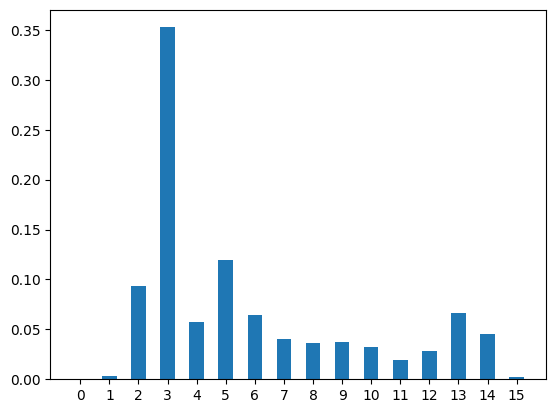



>>> Job ID: cl85tjl7pau17fl75i6g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00201, 11: 0.03985, 9: 0.03692, 13: 0.01437, 15: 0.03298, 10: 0.03899, 6: 0.04193, 4: 0.10902, 2: 0.06232, 14: 0.07619, 0: 0.00159, 7: 0.03522, 3: 0.32414, 8: 0.03764, 5: 0.11908, 12: 0.02775}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00201, 11: 0.03985, 9: 0.03692, 13: 0.01437, 15: 0.03298, 10: 0.03899, 6: 0.04193, 4: 0.10902, 2: 0.06232, 14: 0.07619, 0: 0.00159, 7: 0.03522, 3: 0.32414, 8: 0.03764, 5: 0.11908, 12: 0.02775}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
17
{1: 0.00201, 11: 0.03985, 9: 0.03692, 13: 0.01437, 15: 0.03298, 10: 0.03899, 6: 0.04193, 4: 0.10902, 2: 0.06232, 14: 0.07619, 0: 0.00159, 7: 0.03522, 3: 0.32414, 8: 0.03764, 5: 0.11908, 12: 0.02775}
0.005579895299999999


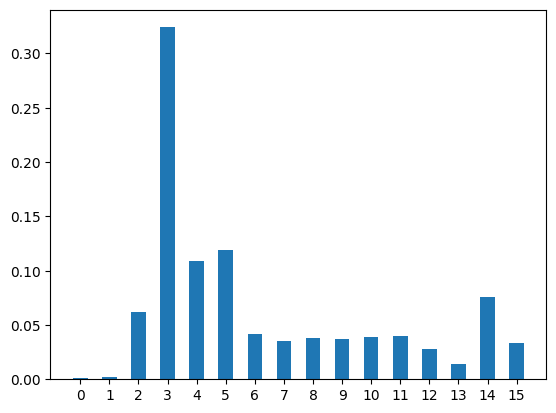



>>> Job ID: cl85tkdfa6vtjv91fn40
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00971, 1: 0.0019, 9: 0.03803, 13: 0.04048, 8: 0.04565, 2: 0.04272, 6: 0.03142, 4: 0.17392, 11: 0.03005, 7: 0.0459, 0: 0.02254, 3: 0.27938, 12: 0.03942, 5: 0.0922, 10: 0.03079, 15: 0.07589}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00971, 1: 0.0019, 9: 0.03803, 13: 0.04048, 8: 0.04565, 2: 0.04272, 6: 0.03142, 4: 0.17392, 11: 0.03005, 7: 0.0459, 0: 0.02254, 3: 0.27938, 12: 0.03942, 5: 0.0922, 10: 0.03079, 15: 0.07589}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
18
{14: 0.00971, 1: 0.0019, 9: 0.03803, 13: 0.04048, 8: 0.04565, 2: 0.04272, 6: 0.03142, 4: 0.17392, 11: 0.03005, 7: 0.0459, 0: 0.02254, 3: 0.27938, 12: 0.03942, 5: 0.0922, 10: 0.03079, 15: 0.07589}
0.0046350156375


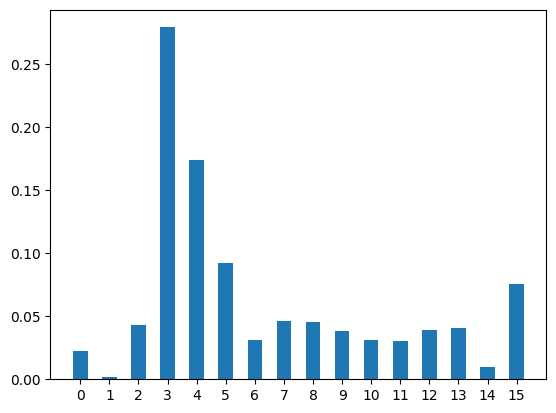



>>> Job ID: cl85tlf75e3r3c6jbtd0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.0243, 8: 0.05055, 14: 0.04769, 9: 0.0372, 2: 0.02904, 1: 0.01528, 6: 0.04366, 4: 0.23714, 15: 0.01495, 10: 0.03004, 12: 0.01968, 5: 0.0566, 7: 0.06505, 3: 0.22938, 0: 0.0728, 13: 0.02664}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.0243, 8: 0.05055, 14: 0.04769, 9: 0.0372, 2: 0.02904, 1: 0.01528, 6: 0.04366, 4: 0.23714, 15: 0.01495, 10: 0.03004, 12: 0.01968, 5: 0.0566, 7: 0.06505, 3: 0.22938, 0: 0.0728, 13: 0.02664}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
19
{11: 0.0243, 8: 0.05055, 14: 0.04769, 9: 0.0372, 2: 0.02904, 1: 0.01528, 6: 0.04366, 4: 0.23714, 15: 0.01495, 10: 0.03004, 12: 0.01968, 5: 0.0566, 7: 0.06505, 3: 0.22938, 0: 0.0728, 13: 0.02664}
0.004443457925


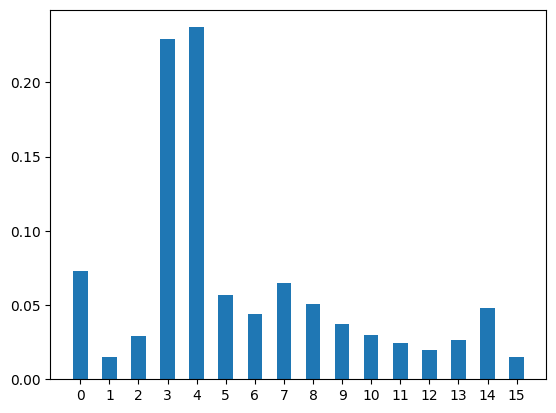



>>> Job ID: cl85tmdfa6vtjv91fo0g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.01999, 14: 0.01507, 9: 0.03138, 10: 0.02966, 15: 0.04097, 11: 0.03047, 1: 0.0671, 2: 0.0289, 6: 0.07624, 4: 0.28277, 7: 0.07154, 3: 0.17965, 0: 0.02678, 8: 0.04243, 12: 0.02736, 5: 0.02969}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.01999, 14: 0.01507, 9: 0.03138, 10: 0.02966, 15: 0.04097, 11: 0.03047, 1: 0.0671, 2: 0.0289, 6: 0.07624, 4: 0.28277, 7: 0.07154, 3: 0.17965, 0: 0.02678, 8: 0.04243, 12: 0.02736, 5: 0.02969}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
20
{13: 0.01999, 14: 0.01507, 9: 0.03138, 10: 0.02966, 15: 0.04097, 11: 0.03047, 1: 0.0671, 2: 0.0289, 6: 0.07624, 4: 0.28277, 7: 0.07154, 3: 0.17965, 0: 0.02678, 8: 0.04243, 12: 0.02736, 5: 0.02969}
0.0047029219


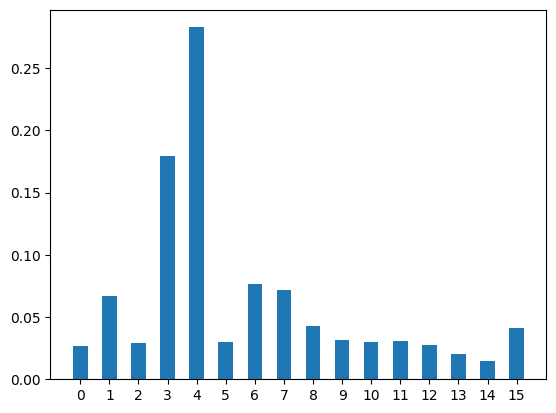



>>> Job ID: cl85tn16mcdhud4k1i70
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.03046, 15: 0.01223, 12: 0.03117, 5: 0.0272, 9: 0.02867, 11: 0.03008, 8: 0.02879, 2: 0.05633, 13: 0.03358, 4: 0.3083, 6: 0.10629, 0: 0.02934, 7: 0.0585, 3: 0.1527, 14: 0.02841, 1: 0.03795}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.03046, 15: 0.01223, 12: 0.03117, 5: 0.0272, 9: 0.02867, 11: 0.03008, 8: 0.02879, 2: 0.05633, 13: 0.03358, 4: 0.3083, 6: 0.10629, 0: 0.02934, 7: 0.0585, 3: 0.1527, 14: 0.02841, 1: 0.03795}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
21
{10: 0.03046, 15: 0.01223, 12: 0.03117, 5: 0.0272, 9: 0.02867, 11: 0.03008, 8: 0.02879, 2: 0.05633, 13: 0.03358, 4: 0.3083, 6: 0.10629, 0: 0.02934, 7: 0.0585, 3: 0.1527, 14: 0.02841, 1: 0.03795}
0.0052087049


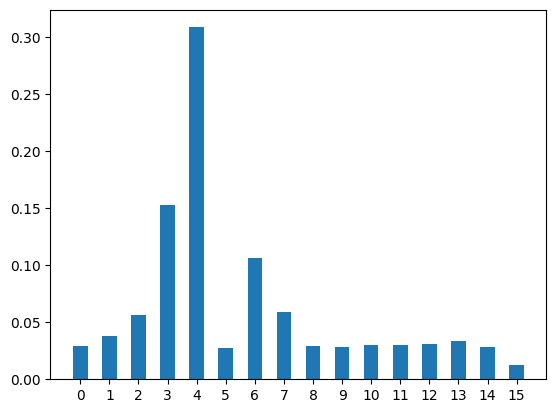



>>> Job ID: cl85to16mcdhud4k1in0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01714, 12: 0.02565, 5: 0.0471, 13: 0.0238, 9: 0.0364, 8: 0.02747, 0: 0.01896, 7: 0.036, 3: 0.15212, 11: 0.03156, 15: 0.03498, 10: 0.03601, 4: 0.29201, 6: 0.11483, 2: 0.07582, 14: 0.03015}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01714, 12: 0.02565, 5: 0.0471, 13: 0.0238, 9: 0.0364, 8: 0.02747, 0: 0.01896, 7: 0.036, 3: 0.15212, 11: 0.03156, 15: 0.03498, 10: 0.03601, 4: 0.29201, 6: 0.11483, 2: 0.07582, 14: 0.03015}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
22
{1: 0.01714, 12: 0.02565, 5: 0.0471, 13: 0.0238, 9: 0.0364, 8: 0.02747, 0: 0.01896, 7: 0.036, 3: 0.15212, 11: 0.03156, 15: 0.03498, 10: 0.03601, 4: 0.29201, 6: 0.11483, 2: 0.07582, 14: 0.03015}
0.0047963691875


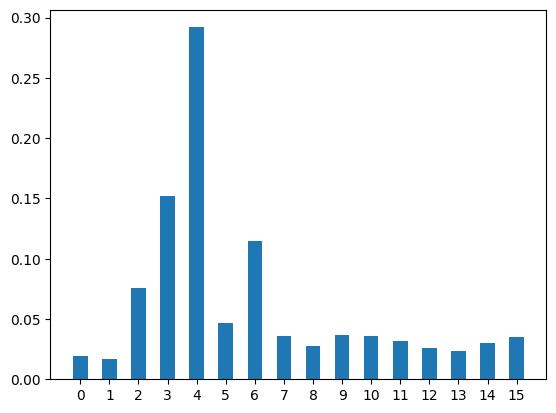



>>> Job ID: cl85tp15o5utp9bvvqd0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00325, 13: 0.02141, 10: 0.03851, 15: 0.0184, 9: 0.04931, 12: 0.02577, 5: 0.12077, 1: 0.03244, 0: 0.03244, 7: 0.02356, 3: 0.10078, 14: 0.01749, 11: 0.03076, 4: 0.34041, 6: 0.10009, 8: 0.04461}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00325, 13: 0.02141, 10: 0.03851, 15: 0.0184, 9: 0.04931, 12: 0.02577, 5: 0.12077, 1: 0.03244, 0: 0.03244, 7: 0.02356, 3: 0.10078, 14: 0.01749, 11: 0.03076, 4: 0.34041, 6: 0.10009, 8: 0.04461}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
23
{2: 0.00325, 13: 0.02141, 10: 0.03851, 15: 0.0184, 9: 0.04931, 12: 0.02577, 5: 0.12077, 1: 0.03244, 0: 0.03244, 7: 0.02356, 3: 0.10078, 14: 0.01749, 11: 0.03076, 4: 0.34041, 6: 0.10009, 8: 0.04461}
0.0062141867375


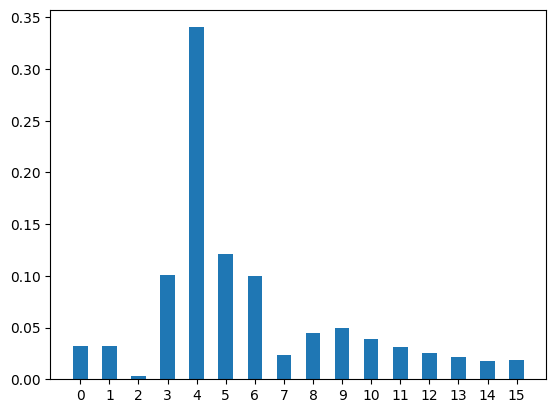



>>> Job ID: cl85tq775e3r3c6jbvjg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.02509, 1: 0.0217, 9: 0.04986, 13: 0.02613, 6: 0.06956, 4: 0.33981, 2: 0.03381, 8: 0.06351, 11: 0.02644, 15: 0.0188, 10: 0.03258, 5: 0.12213, 12: 0.02506, 0: 0.01247, 7: 0.03316, 3: 0.09989}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.02509, 1: 0.0217, 9: 0.04986, 13: 0.02613, 6: 0.06956, 4: 0.33981, 2: 0.03381, 8: 0.06351, 11: 0.02644, 15: 0.0188, 10: 0.03258, 5: 0.12213, 12: 0.02506, 0: 0.01247, 7: 0.03316, 3: 0.09989}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
24
{14: 0.02509, 1: 0.0217, 9: 0.04986, 13: 0.02613, 6: 0.06956, 4: 0.33981, 2: 0.03381, 8: 0.06351, 11: 0.02644, 15: 0.0188, 10: 0.03258, 5: 0.12213, 12: 0.02506, 0: 0.01247, 7: 0.03316, 3: 0.09989}
0.00600912935


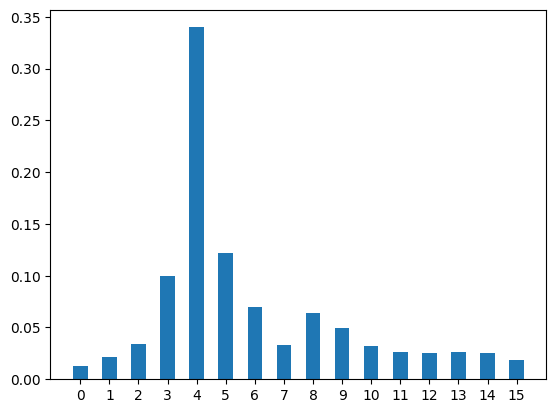



>>> Job ID: cl85tr57pau17fl75m00
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01523, 11: 0.0251, 14: 0.02565, 10: 0.02346, 15: 0.02807, 2: 0.01923, 8: 0.07083, 9: 0.03585, 12: 0.02558, 5: 0.30009, 0: 0.02527, 7: 0.04884, 3: 0.0873, 13: 0.02536, 6: 0.08223, 4: 0.16191}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01523, 11: 0.0251, 14: 0.02565, 10: 0.02346, 15: 0.02807, 2: 0.01923, 8: 0.07083, 9: 0.03585, 12: 0.02558, 5: 0.30009, 0: 0.02527, 7: 0.04884, 3: 0.0873, 13: 0.02536, 6: 0.08223, 4: 0.16191}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
25
{1: 0.01523, 11: 0.0251, 14: 0.02565, 10: 0.02346, 15: 0.02807, 2: 0.01923, 8: 0.07083, 9: 0.03585, 12: 0.02558, 5: 0.30009, 0: 0.02527, 7: 0.04884, 3: 0.0873, 13: 0.02536, 6: 0.08223, 4: 0.16191}
0.0051252118625


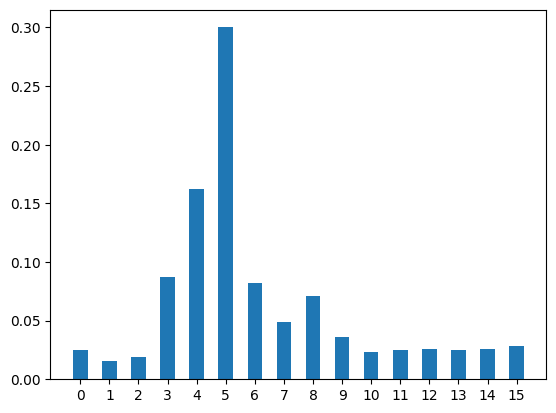



>>> Job ID: cl85ts5fa6vtjv91fqg0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.0258, 2: 0.03025, 10: 0.02595, 15: 0.02119, 11: 0.03082, 14: 0.02179, 6: 0.0143, 4: 0.22765, 12: 0.02922, 5: 0.30601, 8: 0.05862, 1: 0.029, 9: 0.02283, 3: 0.00442, 7: 0.12991, 0: 0.02224}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.0258, 2: 0.03025, 10: 0.02595, 15: 0.02119, 11: 0.03082, 14: 0.02179, 6: 0.0143, 4: 0.22765, 12: 0.02922, 5: 0.30601, 8: 0.05862, 1: 0.029, 9: 0.02283, 3: 0.00442, 7: 0.12991, 0: 0.02224}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
26
{13: 0.0258, 2: 0.03025, 10: 0.02595, 15: 0.02119, 11: 0.03082, 14: 0.02179, 6: 0.0143, 4: 0.22765, 12: 0.02922, 5: 0.30601, 8: 0.05862, 1: 0.029, 9: 0.02283, 3: 0.00442, 7: 0.12991, 0: 0.02224}
0.006896375875


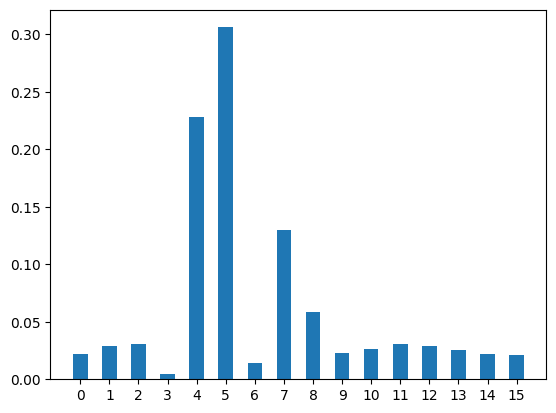



>>> Job ID: cl85tt7l4q34kqgq0ag0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.02551, 1: 0.01561, 14: 0.02176, 9: 0.03036, 11: 0.03872, 8: 0.03058, 2: 0.02346, 0: 0.01556, 3: 0.03284, 7: 0.13027, 12: 0.03123, 5: 0.22059, 6: 0.09902, 4: 0.22613, 10: 0.03945, 15: 0.01891}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.02551, 1: 0.01561, 14: 0.02176, 9: 0.03036, 11: 0.03872, 8: 0.03058, 2: 0.02346, 0: 0.01556, 3: 0.03284, 7: 0.13027, 12: 0.03123, 5: 0.22059, 6: 0.09902, 4: 0.22613, 10: 0.03945, 15: 0.01891}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
27
{13: 0.02551, 1: 0.01561, 14: 0.02176, 9: 0.03036, 11: 0.03872, 8: 0.03058, 2: 0.02346, 0: 0.01556, 3: 0.03284, 7: 0.13027, 12: 0.03123, 5: 0.22059, 6: 0.09902, 4: 0.22613, 10: 0.03945, 15: 0.01891}
0.004597134175


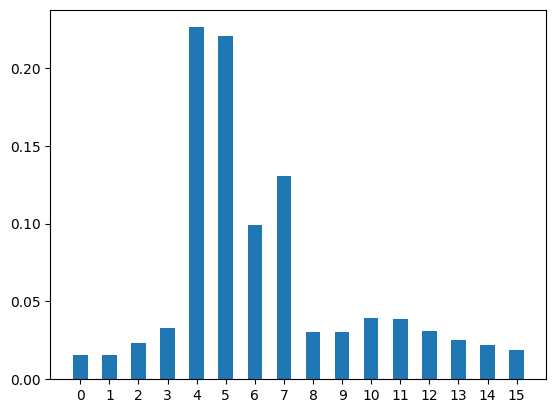



>>> Job ID: cl85tud7pau17fl75nd0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.02145, 14: 0.02191, 9: 0.02337, 15: 0.02217, 10: 0.05326, 11: 0.03623, 12: 0.02587, 5: 0.23504, 8: 0.11262, 1: 0.01781, 0: 0.02148, 3: 0.03971, 7: 0.12043, 6: 0.10021, 4: 0.1396, 2: 0.00884}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.02145, 14: 0.02191, 9: 0.02337, 15: 0.02217, 10: 0.05326, 11: 0.03623, 12: 0.02587, 5: 0.23504, 8: 0.11262, 1: 0.01781, 0: 0.02148, 3: 0.03971, 7: 0.12043, 6: 0.10021, 4: 0.1396, 2: 0.00884}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
28
{13: 0.02145, 14: 0.02191, 9: 0.02337, 15: 0.02217, 10: 0.05326, 11: 0.03623, 12: 0.02587, 5: 0.23504, 8: 0.11262, 1: 0.01781, 0: 0.02148, 3: 0.03971, 7: 0.12043, 6: 0.10021, 4: 0.1396, 2: 0.00884}
0.0036681615625


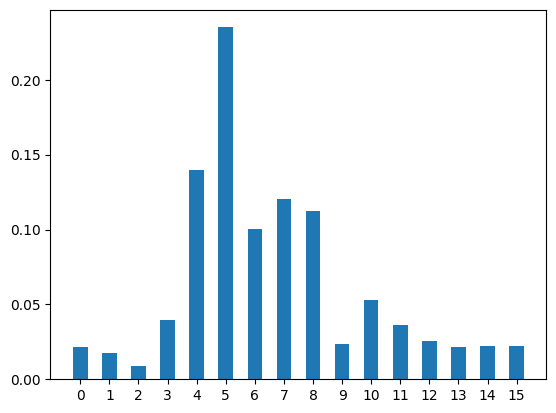



>>> Job ID: cl85tvd7pau17fl75nt0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.02183, 8: 0.01417, 13: 0.02151, 2: 0.02082, 1: 0.02412, 9: 0.12749, 11: 0.02288, 6: 0.09041, 4: 0.03851, 0: 0.02294, 7: 0.12578, 3: 0.04168, 12: 0.02056, 5: 0.33595, 10: 0.04993, 15: 0.02142}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.02183, 8: 0.01417, 13: 0.02151, 2: 0.02082, 1: 0.02412, 9: 0.12749, 11: 0.02288, 6: 0.09041, 4: 0.03851, 0: 0.02294, 7: 0.12578, 3: 0.04168, 12: 0.02056, 5: 0.33595, 10: 0.04993, 15: 0.02142}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
29
{14: 0.02183, 8: 0.01417, 13: 0.02151, 2: 0.02082, 1: 0.02412, 9: 0.12749, 11: 0.02288, 6: 0.09041, 4: 0.03851, 0: 0.02294, 7: 0.12578, 3: 0.04168, 12: 0.02056, 5: 0.33595, 10: 0.04993, 15: 0.02142}
0.006275653700000001


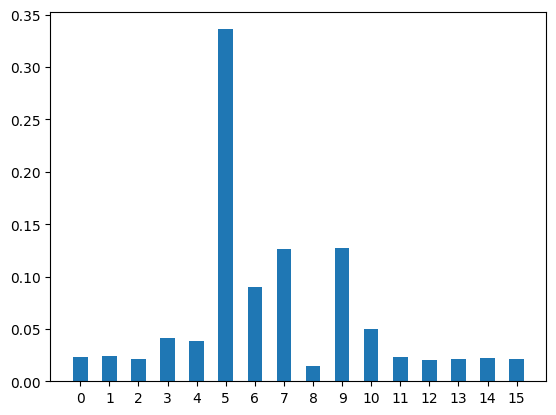



>>> Job ID: cl85u096mcdhud4k1mng
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.03639, 2: 0.02012, 13: 0.02638, 12: 0.02101, 5: 0.33492, 8: 0.03082, 14: 0.02629, 6: 0.07496, 4: 0.05726, 1: 0.01857, 15: 0.02178, 10: 0.03314, 3: 0.03039, 7: 0.12533, 0: 0.01904, 9: 0.1236}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.03639, 2: 0.02012, 13: 0.02638, 12: 0.02101, 5: 0.33492, 8: 0.03082, 14: 0.02629, 6: 0.07496, 4: 0.05726, 1: 0.01857, 15: 0.02178, 10: 0.03314, 3: 0.03039, 7: 0.12533, 0: 0.01904, 9: 0.1236}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
30
{11: 0.03639, 2: 0.02012, 13: 0.02638, 12: 0.02101, 5: 0.33492, 8: 0.03082, 14: 0.02629, 6: 0.07496, 4: 0.05726, 1: 0.01857, 15: 0.02178, 10: 0.03314, 3: 0.03039, 7: 0.12533, 0: 0.01904, 9: 0.1236}
0.006079039912499999


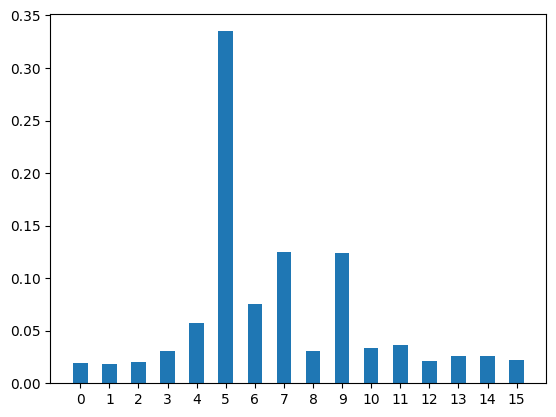



>>> Job ID: cl85u1dfa6vtjv91fsmg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01614, 9: 0.03434, 14: 0.02575, 13: 0.0301, 4: 0.08587, 6: 0.16538, 1: 0.01643, 12: 0.04565, 5: 0.23356, 8: 0.13935, 11: 0.00641, 15: 0.02266, 10: 0.1342, 3: 0.00635, 7: 0.01845, 0: 0.01936}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01614, 9: 0.03434, 14: 0.02575, 13: 0.0301, 4: 0.08587, 6: 0.16538, 1: 0.01643, 12: 0.04565, 5: 0.23356, 8: 0.13935, 11: 0.00641, 15: 0.02266, 10: 0.1342, 3: 0.00635, 7: 0.01845, 0: 0.01936}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
31
{2: 0.01614, 9: 0.03434, 14: 0.02575, 13: 0.0301, 4: 0.08587, 6: 0.16538, 1: 0.01643, 12: 0.04565, 5: 0.23356, 8: 0.13935, 11: 0.00641, 15: 0.02266, 10: 0.1342, 3: 0.00635, 7: 0.01845, 0: 0.01936}
0.004429706925


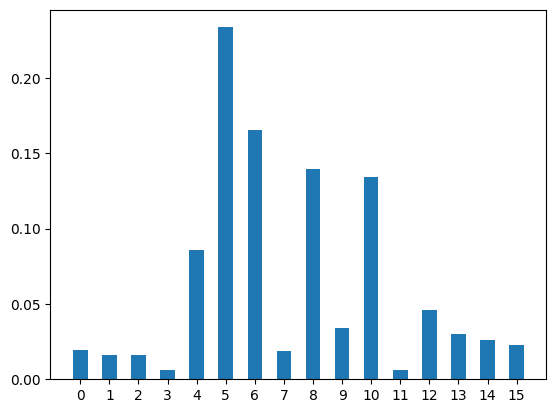



>>> Job ID: cl85u2h6mcdhud4k1nmg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{7: 0.00184, 3: 0.00867, 0: 0.01916, 13: 0.02822, 2: 0.01922, 12: 0.04631, 5: 0.11402, 9: 0.05095, 11: 0.12772, 10: 0.0114, 15: 0.01933, 14: 0.02162, 4: 0.08385, 6: 0.28908, 1: 0.01867, 8: 0.13994}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {7: 0.00184, 3: 0.00867, 0: 0.01916, 13: 0.02822, 2: 0.01922, 12: 0.04631, 5: 0.11402, 9: 0.05095, 11: 0.12772, 10: 0.0114, 15: 0.01933, 14: 0.02162, 4: 0.08385, 6: 0.28908, 1: 0.01867, 8: 0.13994}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
32
{7: 0.00184, 3: 0.00867, 0: 0.01916, 13: 0.02822, 2: 0.01922, 12: 0.04631, 5: 0.11402, 9: 0.05095, 11: 0.12772, 10: 0.0114, 15: 0.01933, 14: 0.02162, 4: 0.08385, 6: 0.28908, 1: 0.01867, 8: 0.13994}
0.0052916118125


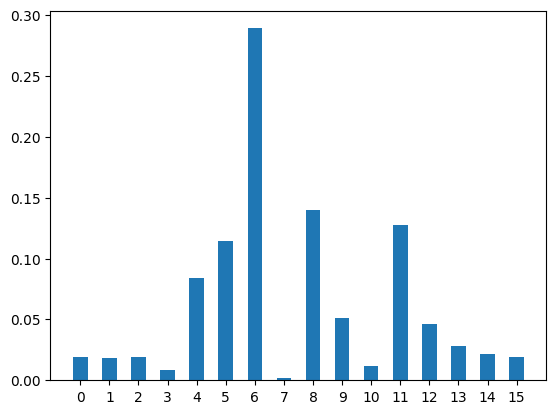



>>> Job ID: cl85u3vl4q34kqgq0dig
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.01157, 7: 0.00234, 3: 0.01995, 0: 0.0195, 10: 0.01065, 15: 0.02029, 13: 0.05203, 11: 0.08774, 9: 0.07115, 2: 0.02026, 12: 0.05428, 5: 0.10595, 8: 0.11857, 1: 0.01979, 6: 0.32462, 4: 0.06131}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.01157, 7: 0.00234, 3: 0.01995, 0: 0.0195, 10: 0.01065, 15: 0.02029, 13: 0.05203, 11: 0.08774, 9: 0.07115, 2: 0.02026, 12: 0.05428, 5: 0.10595, 8: 0.11857, 1: 0.01979, 6: 0.32462, 4: 0.06131}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
33
{14: 0.01157, 7: 0.00234, 3: 0.01995, 0: 0.0195, 10: 0.01065, 15: 0.02029, 13: 0.05203, 11: 0.08774, 9: 0.07115, 2: 0.02026, 12: 0.05428, 5: 0.10595, 8: 0.11857, 1: 0.01979, 6: 0.32462, 4: 0.06131}
0.005786261787500001


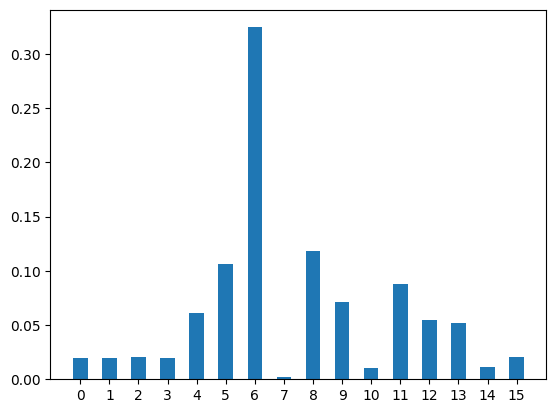



>>> Job ID: cl85u4vl4q34kqgq0e70
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00453, 2: 0.01662, 11: 0.03592, 15: 0.01812, 10: 0.07598, 9: 0.07151, 1: 0.01978, 6: 0.2742, 4: 0.02001, 3: 0.02231, 0: 0.02202, 7: 0.05505, 8: 0.0517, 12: 0.10741, 5: 0.15288, 14: 0.05196}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00453, 2: 0.01662, 11: 0.03592, 15: 0.01812, 10: 0.07598, 9: 0.07151, 1: 0.01978, 6: 0.2742, 4: 0.02001, 3: 0.02231, 0: 0.02202, 7: 0.05505, 8: 0.0517, 12: 0.10741, 5: 0.15288, 14: 0.05196}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
34
{13: 0.00453, 2: 0.01662, 11: 0.03592, 15: 0.01812, 10: 0.07598, 9: 0.07151, 1: 0.01978, 6: 0.2742, 4: 0.02001, 3: 0.02231, 0: 0.02202, 7: 0.05505, 8: 0.0517, 12: 0.10741, 5: 0.15288, 14: 0.05196}
0.0044108942625


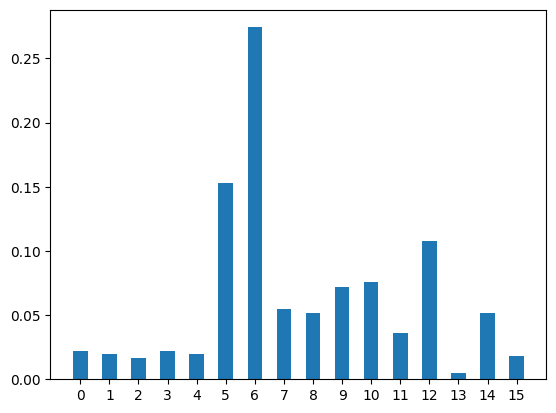



>>> Job ID: cl85u5tfa6vtjv91fusg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01619, 1: 0.01932, 10: 0.11165, 15: 0.03958, 8: 0.06212, 13: 0.10685, 11: 0.02462, 9: 0.0359, 4: 0.00027, 6: 0.17389, 14: 0.03645, 12: 0.02687, 5: 0.16834, 3: 0.02133, 0: 0.0225, 7: 0.13412}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01619, 1: 0.01932, 10: 0.11165, 15: 0.03958, 8: 0.06212, 13: 0.10685, 11: 0.02462, 9: 0.0359, 4: 0.00027, 6: 0.17389, 14: 0.03645, 12: 0.02687, 5: 0.16834, 3: 0.02133, 0: 0.0225, 7: 0.13412}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
35
{2: 0.01619, 1: 0.01932, 10: 0.11165, 15: 0.03958, 8: 0.06212, 13: 0.10685, 11: 0.02462, 9: 0.0359, 4: 0.00027, 6: 0.17389, 14: 0.03645, 12: 0.02687, 5: 0.16834, 3: 0.02133, 0: 0.0225, 7: 0.13412}
0.0030571626249999992


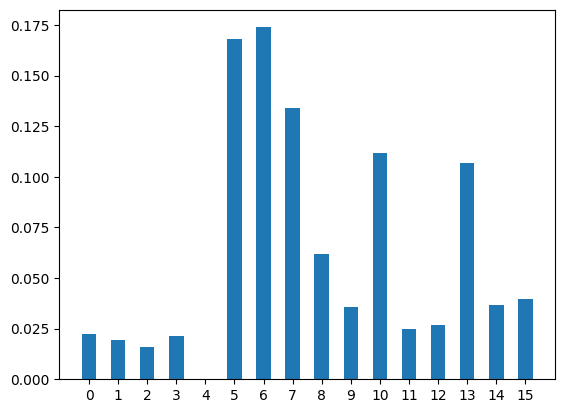



>>> Job ID: cl85u757pau17fl75rj0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01643, 8: 0.07494, 11: 0.0246, 1: 0.01979, 14: 0.06688, 9: 0.03705, 10: 0.11198, 15: 0.06771, 13: 0.05788, 12: 0.01507, 5: 0.1397, 0: 0.013, 3: 0.02082, 7: 0.18121, 6: 0.14342, 4: 0.00952}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01643, 8: 0.07494, 11: 0.0246, 1: 0.01979, 14: 0.06688, 9: 0.03705, 10: 0.11198, 15: 0.06771, 13: 0.05788, 12: 0.01507, 5: 0.1397, 0: 0.013, 3: 0.02082, 7: 0.18121, 6: 0.14342, 4: 0.00952}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
36
{2: 0.01643, 8: 0.07494, 11: 0.0246, 1: 0.01979, 14: 0.06688, 9: 0.03705, 10: 0.11198, 15: 0.06771, 13: 0.05788, 12: 0.01507, 5: 0.1397, 0: 0.013, 3: 0.02082, 7: 0.18121, 6: 0.14342, 4: 0.00952}
0.0027840816625


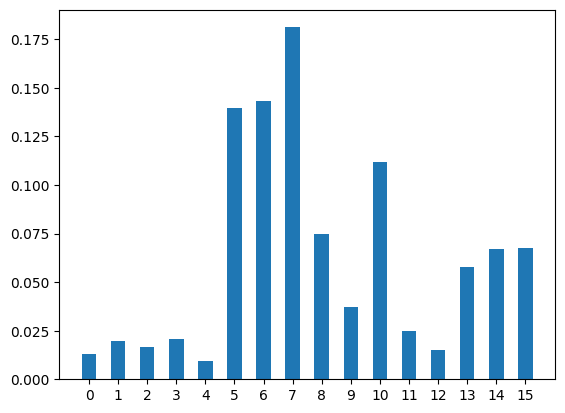



>>> Job ID: cl85u8fl4q34kqgq0fs0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00631, 11: 0.072, 8: 0.07069, 15: 0.01415, 10: 0.06469, 12: 0.0198, 5: 0.07741, 13: 0.06253, 9: 0.03154, 14: 0.05824, 2: 0.02067, 4: 0.02374, 6: 0.19634, 0: 0.07444, 3: 0.01669, 7: 0.19076}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00631, 11: 0.072, 8: 0.07069, 15: 0.01415, 10: 0.06469, 12: 0.0198, 5: 0.07741, 13: 0.06253, 9: 0.03154, 14: 0.05824, 2: 0.02067, 4: 0.02374, 6: 0.19634, 0: 0.07444, 3: 0.01669, 7: 0.19076}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
37
{1: 0.00631, 11: 0.072, 8: 0.07069, 15: 0.01415, 10: 0.06469, 12: 0.0198, 5: 0.07741, 13: 0.06253, 9: 0.03154, 14: 0.05824, 2: 0.02067, 4: 0.02374, 6: 0.19634, 0: 0.07444, 3: 0.01669, 7: 0.19076}
0.0030335255249999997


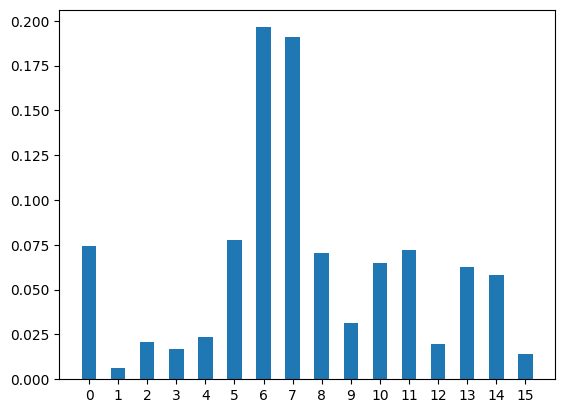



>>> Job ID: cl85u9l7pau17fl75sn0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01387, 13: 0.00985, 14: 0.06654, 8: 0.06252, 9: 0.08429, 11: 0.07208, 10: 0.00654, 15: 0.05524, 4: 0.02932, 6: 0.25451, 0: 0.02039, 3: 0.01706, 7: 0.14636, 1: 0.06251, 5: 0.021, 12: 0.07792}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01387, 13: 0.00985, 14: 0.06654, 8: 0.06252, 9: 0.08429, 11: 0.07208, 10: 0.00654, 15: 0.05524, 4: 0.02932, 6: 0.25451, 0: 0.02039, 3: 0.01706, 7: 0.14636, 1: 0.06251, 5: 0.021, 12: 0.07792}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
38
{2: 0.01387, 13: 0.00985, 14: 0.06654, 8: 0.06252, 9: 0.08429, 11: 0.07208, 10: 0.00654, 15: 0.05524, 4: 0.02932, 6: 0.25451, 0: 0.02039, 3: 0.01706, 7: 0.14636, 1: 0.06251, 5: 0.021, 12: 0.07792}
0.0037314597125000007


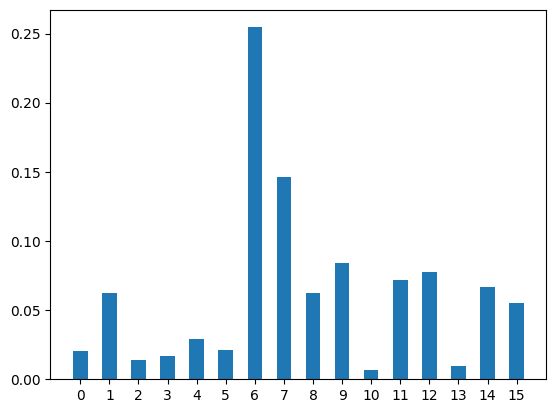



>>> Job ID: cl85uap6mcdhud4k1rdg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.01394, 11: 0.0679, 1: 0.06173, 8: 0.0526, 10: 0.00241, 15: 0.06664, 9: 0.14182, 2: 0.03057, 14: 0.00849, 4: 0.02905, 6: 0.2522, 3: 0.01828, 7: 0.11989, 0: 0.04898, 5: 0.00352, 12: 0.08198}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.01394, 11: 0.0679, 1: 0.06173, 8: 0.0526, 10: 0.00241, 15: 0.06664, 9: 0.14182, 2: 0.03057, 14: 0.00849, 4: 0.02905, 6: 0.2522, 3: 0.01828, 7: 0.11989, 0: 0.04898, 5: 0.00352, 12: 0.08198}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
39
{13: 0.01394, 11: 0.0679, 1: 0.06173, 8: 0.0526, 10: 0.00241, 15: 0.06664, 9: 0.14182, 2: 0.03057, 14: 0.00849, 4: 0.02905, 6: 0.2522, 3: 0.01828, 7: 0.11989, 0: 0.04898, 5: 0.00352, 12: 0.08198}
0.0039210603625


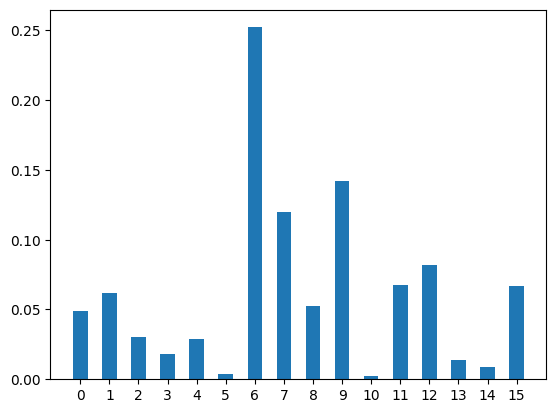



>>> Job ID: cl85uc57pau17fl75tk0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00334, 15: 0.05388, 14: 0.00746, 1: 0.01916, 11: 0.05394, 3: 0.00491, 0: 0.04434, 7: 0.1636, 8: 0.05559, 13: 0.02846, 4: 0.02879, 6: 0.19347, 2: 0.09072, 5: 0.01618, 12: 0.08219, 9: 0.15397}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00334, 15: 0.05388, 14: 0.00746, 1: 0.01916, 11: 0.05394, 3: 0.00491, 0: 0.04434, 7: 0.1636, 8: 0.05559, 13: 0.02846, 4: 0.02879, 6: 0.19347, 2: 0.09072, 5: 0.01618, 12: 0.08219, 9: 0.15397}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
40
{10: 0.00334, 15: 0.05388, 14: 0.00746, 1: 0.01916, 11: 0.05394, 3: 0.00491, 0: 0.04434, 7: 0.1636, 8: 0.05559, 13: 0.02846, 4: 0.02879, 6: 0.19347, 2: 0.09072, 5: 0.01618, 12: 0.08219, 9: 0.15397}
0.0033509491874999997


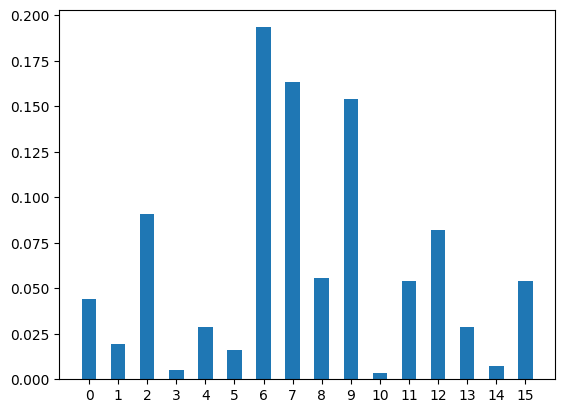



>>> Job ID: cl85ud57pau17fl75u3g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00571, 11: 0.02663, 8: 0.05518, 1: 0.01834, 15: 0.02218, 10: 0.03448, 13: 0.07283, 4: 0.00181, 6: 0.10509, 12: 0.03899, 5: 0.04348, 14: 0.03342, 9: 0.11977, 7: 0.25096, 3: 0.09207, 0: 0.07906}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00571, 11: 0.02663, 8: 0.05518, 1: 0.01834, 15: 0.02218, 10: 0.03448, 13: 0.07283, 4: 0.00181, 6: 0.10509, 12: 0.03899, 5: 0.04348, 14: 0.03342, 9: 0.11977, 7: 0.25096, 3: 0.09207, 0: 0.07906}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
41
{2: 0.00571, 11: 0.02663, 8: 0.05518, 1: 0.01834, 15: 0.02218, 10: 0.03448, 13: 0.07283, 4: 0.00181, 6: 0.10509, 12: 0.03899, 5: 0.04348, 14: 0.03342, 9: 0.11977, 7: 0.25096, 3: 0.09207, 0: 0.07906}
0.0035147459250000003


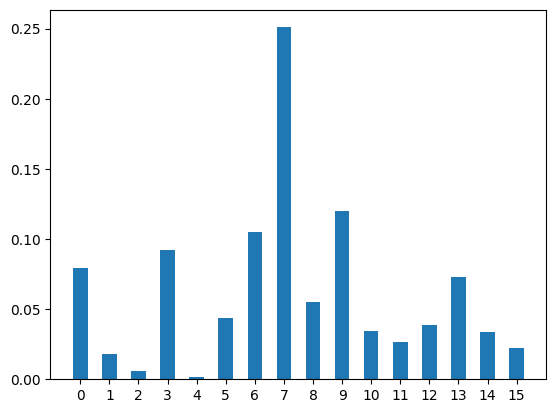



>>> Job ID: cl85uedfa6vtjv91g2r0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.04076, 2: 0.01561, 14: 0.06275, 6: 0.04014, 4: 0.06505, 8: 0.04637, 12: 0.00795, 5: 0.0438, 9: 0.05742, 15: 0.00872, 10: 0.09324, 13: 0.07348, 7: 0.31103, 3: 0.03312, 0: 0.02008, 1: 0.08048}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.04076, 2: 0.01561, 14: 0.06275, 6: 0.04014, 4: 0.06505, 8: 0.04637, 12: 0.00795, 5: 0.0438, 9: 0.05742, 15: 0.00872, 10: 0.09324, 13: 0.07348, 7: 0.31103, 3: 0.03312, 0: 0.02008, 1: 0.08048}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
42
{11: 0.04076, 2: 0.01561, 14: 0.06275, 6: 0.04014, 4: 0.06505, 8: 0.04637, 12: 0.00795, 5: 0.0438, 9: 0.05742, 15: 0.00872, 10: 0.09324, 13: 0.07348, 7: 0.31103, 3: 0.03312, 0: 0.02008, 1: 0.08048}
0.0047187555375


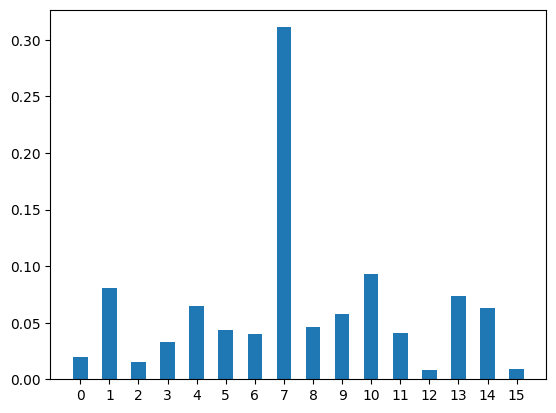



>>> Job ID: cl85ufvl4q34kqgq0j80
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.0615, 1: 0.03716, 13: 0.07244, 12: 0.00789, 5: 0.05901, 9: 0.01172, 8: 0.06659, 14: 0.06309, 15: 0.00876, 10: 0.13425, 0: 0.00779, 3: 0.01262, 7: 0.31123, 11: 0.05298, 6: 0.02725, 4: 0.06572}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.0615, 1: 0.03716, 13: 0.07244, 12: 0.00789, 5: 0.05901, 9: 0.01172, 8: 0.06659, 14: 0.06309, 15: 0.00876, 10: 0.13425, 0: 0.00779, 3: 0.01262, 7: 0.31123, 11: 0.05298, 6: 0.02725, 4: 0.06572}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
43
{2: 0.0615, 1: 0.03716, 13: 0.07244, 12: 0.00789, 5: 0.05901, 9: 0.01172, 8: 0.06659, 14: 0.06309, 15: 0.00876, 10: 0.13425, 0: 0.00779, 3: 0.01262, 7: 0.31123, 11: 0.05298, 6: 0.02725, 4: 0.06572}
0.005191216175


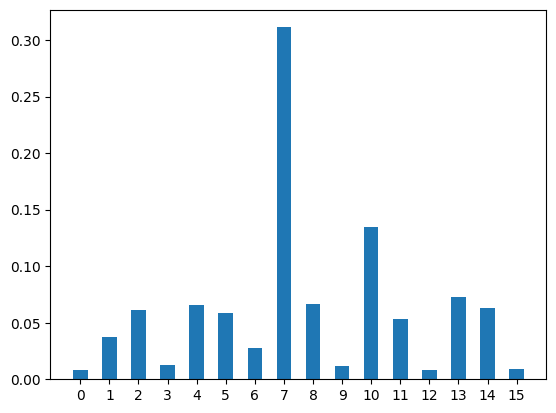



>>> Job ID: cl85uh16mcdhud4k1u4g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00073, 13: 0.04376, 1: 0.0394, 11: 0.05053, 8: 0.13285, 4: 0.00052, 6: 0.02753, 2: 0.05181, 0: 0.00645, 3: 0.02416, 7: 0.24157, 12: 0.00901, 5: 0.12376, 14: 0.06452, 10: 0.14493, 15: 0.03847}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00073, 13: 0.04376, 1: 0.0394, 11: 0.05053, 8: 0.13285, 4: 0.00052, 6: 0.02753, 2: 0.05181, 0: 0.00645, 3: 0.02416, 7: 0.24157, 12: 0.00901, 5: 0.12376, 14: 0.06452, 10: 0.14493, 15: 0.03847}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
44
{9: 0.00073, 13: 0.04376, 1: 0.0394, 11: 0.05053, 8: 0.13285, 4: 0.00052, 6: 0.02753, 2: 0.05181, 0: 0.00645, 3: 0.02416, 7: 0.24157, 12: 0.00901, 5: 0.12376, 14: 0.06452, 10: 0.14493, 15: 0.03847}
0.0041024530125


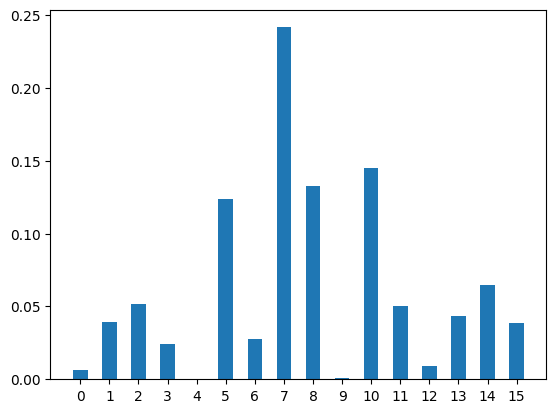



>>> Job ID: cl85ui96mcdhud4k1uq0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00077, 13: 0.01023, 1: 0.00731, 14: 0.03397, 5: 0.00013, 12: 0.04072, 2: 0.04973, 3: 0.05837, 0: 0.03964, 7: 0.13272, 10: 0.11317, 15: 0.07029, 4: 0.00051, 6: 0.13687, 8: 0.2542, 11: 0.05137}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00077, 13: 0.01023, 1: 0.00731, 14: 0.03397, 5: 0.00013, 12: 0.04072, 2: 0.04973, 3: 0.05837, 0: 0.03964, 7: 0.13272, 10: 0.11317, 15: 0.07029, 4: 0.00051, 6: 0.13687, 8: 0.2542, 11: 0.05137}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
45
{9: 0.00077, 13: 0.01023, 1: 0.00731, 14: 0.03397, 5: 0.00013, 12: 0.04072, 2: 0.04973, 3: 0.05837, 0: 0.03964, 7: 0.13272, 10: 0.11317, 15: 0.07029, 4: 0.00051, 6: 0.13687, 8: 0.2542, 11: 0.05137}
0.004329696425


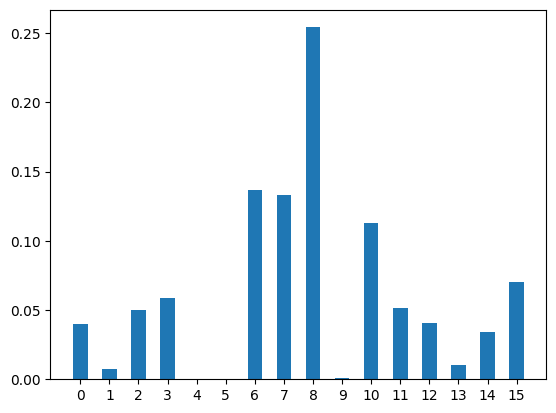



>>> Job ID: cl85ujh6mcdhud4k1veg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.0006, 1: 0.00864, 14: 0.02236, 13: 0.00859, 2: 0.00495, 11: 0.05915, 15: 0.06824, 10: 0.056, 5: 0.00051, 12: 0.08757, 8: 0.28145, 4: 0.05716, 6: 0.11091, 0: 0.05193, 3: 0.04975, 7: 0.13219}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.0006, 1: 0.00864, 14: 0.02236, 13: 0.00859, 2: 0.00495, 11: 0.05915, 15: 0.06824, 10: 0.056, 5: 0.00051, 12: 0.08757, 8: 0.28145, 4: 0.05716, 6: 0.11091, 0: 0.05193, 3: 0.04975, 7: 0.13219}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
46
{9: 0.0006, 1: 0.00864, 14: 0.02236, 13: 0.00859, 2: 0.00495, 11: 0.05915, 15: 0.06824, 10: 0.056, 5: 0.00051, 12: 0.08757, 8: 0.28145, 4: 0.05716, 6: 0.11091, 0: 0.05193, 3: 0.04975, 7: 0.13219}
0.004660114662499999


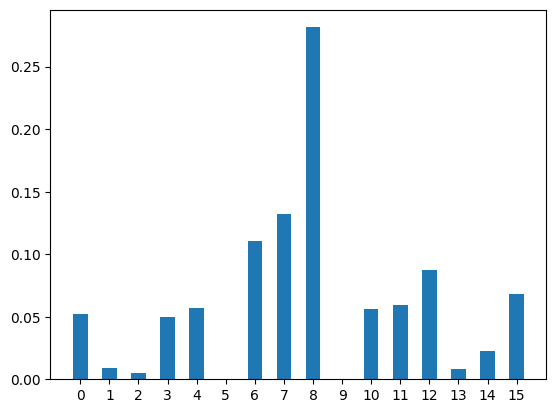



>>> Job ID: cl85ulh6mcdhud4k20b0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00456, 1: 0.01073, 13: 0.0088, 9: 0.05871, 14: 0.0216, 10: 0.02373, 15: 0.06441, 4: 0.04667, 6: 0.05233, 3: 0.02958, 0: 0.05368, 7: 0.07235, 8: 0.34251, 5: 0.03288, 12: 0.10658, 11: 0.07088}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00456, 1: 0.01073, 13: 0.0088, 9: 0.05871, 14: 0.0216, 10: 0.02373, 15: 0.06441, 4: 0.04667, 6: 0.05233, 3: 0.02958, 0: 0.05368, 7: 0.07235, 8: 0.34251, 5: 0.03288, 12: 0.10658, 11: 0.07088}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
47
{2: 0.00456, 1: 0.01073, 13: 0.0088, 9: 0.05871, 14: 0.0216, 10: 0.02373, 15: 0.06441, 4: 0.04667, 6: 0.05233, 3: 0.02958, 0: 0.05368, 7: 0.07235, 8: 0.34251, 5: 0.03288, 12: 0.10658, 11: 0.07088}
0.005938973499999999


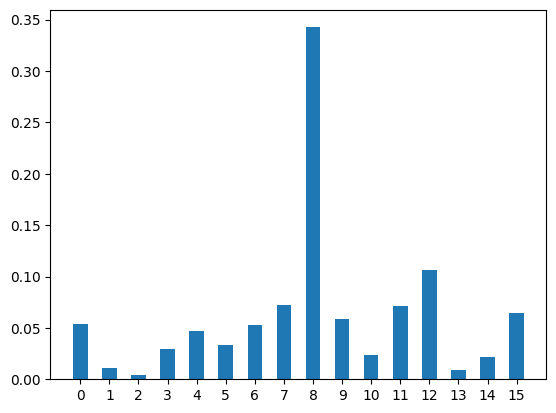



>>> Job ID: cl85umt7pau17fl76270
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.01392, 2: 0.01101, 11: 0.08291, 1: 0.04311, 5: 0.01988, 12: 0.09443, 9: 0.04191, 4: 0.05757, 6: 0.04073, 13: 0.01797, 8: 0.34578, 3: 0.02094, 0: 0.05588, 7: 0.08838, 15: 0.03062, 10: 0.03496}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.01392, 2: 0.01101, 11: 0.08291, 1: 0.04311, 5: 0.01988, 12: 0.09443, 9: 0.04191, 4: 0.05757, 6: 0.04073, 13: 0.01797, 8: 0.34578, 3: 0.02094, 0: 0.05588, 7: 0.08838, 15: 0.03062, 10: 0.03496}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
48
{14: 0.01392, 2: 0.01101, 11: 0.08291, 1: 0.04311, 5: 0.01988, 12: 0.09443, 9: 0.04191, 4: 0.05757, 6: 0.04073, 13: 0.01797, 8: 0.34578, 3: 0.02094, 0: 0.05588, 7: 0.08838, 15: 0.03062, 10: 0.03496}
0.006000503099999999


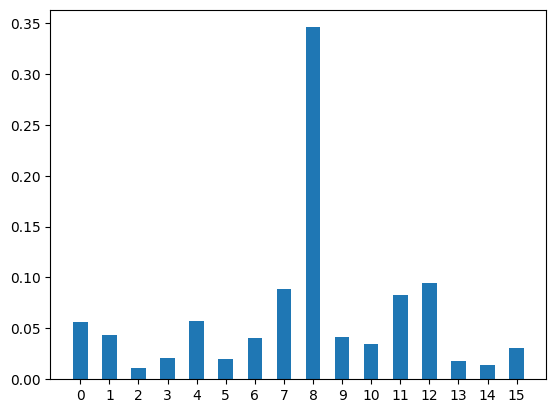



>>> Job ID: cl85uo16mcdhud4k21cg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{15: 0.00278, 10: 0.0379, 4: 0.02245, 6: 0.0519, 9: 0.262, 2: 0.03859, 14: 0.02988, 11: 0.07418, 8: 0.12436, 1: 0.06321, 12: 0.05791, 5: 0.06045, 13: 0.05122, 3: 0.00478, 0: 0.03502, 7: 0.08337}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {15: 0.00278, 10: 0.0379, 4: 0.02245, 6: 0.0519, 9: 0.262, 2: 0.03859, 14: 0.02988, 11: 0.07418, 8: 0.12436, 1: 0.06321, 12: 0.05791, 5: 0.06045, 13: 0.05122, 3: 0.00478, 0: 0.03502, 7: 0.08337}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
49
{15: 0.00278, 10: 0.0379, 4: 0.02245, 6: 0.0519, 9: 0.262, 2: 0.03859, 14: 0.02988, 11: 0.07418, 8: 0.12436, 1: 0.06321, 12: 0.05791, 5: 0.06045, 13: 0.05122, 3: 0.00478, 0: 0.03502, 7: 0.08337}
0.0034976502625


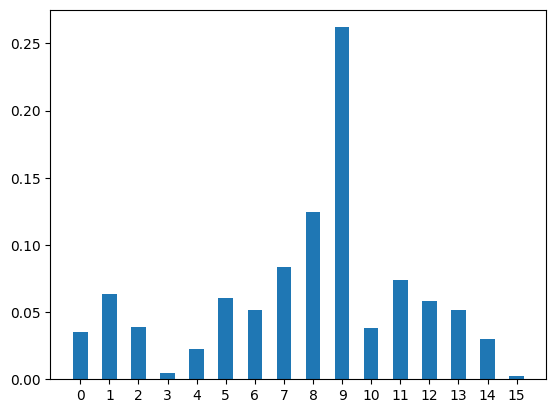

In [21]:
var1 = []
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  job = sampler.run(circuit, shots=100000)
  print(f">>> Job ID: {job.job_id()}")
  print(f">>> Job Status: {job.status()}")

  result = job.result()
  print(f">>> {result}")
  print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
  print(f"  > Metadata: {result.metadata[0]}")

  print(N)
  cnts = dict(result.quasi_dists[0])
  print(cnts)

  board = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  prob = []
  for i in range(16):
    prob.append(cnts.get(i, 0))

  var1.append(np.var(prob))
  print(np.var(prob))
  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

#4. Adding Chutes and Ladders in Board

1) Chutes & Ladder Operator (Notated CL)

Chutes & Ladder Operator

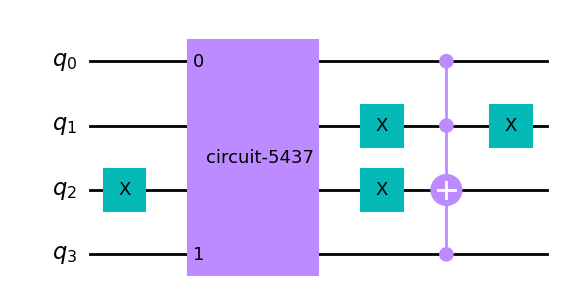

In [22]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

Verifying Chutes & Ladder Operator (3 <-> 10)

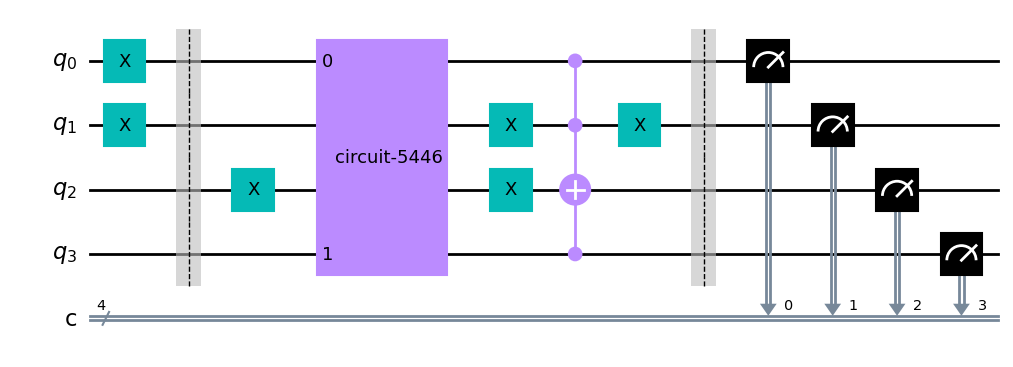

In [23]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl85upl7pau17fl763fg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


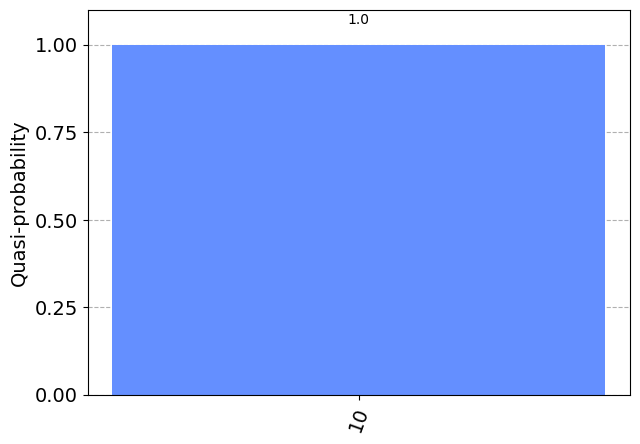

In [24]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 3 <-> 10
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying Chutes & Ladder Operator (9 <-> 13)

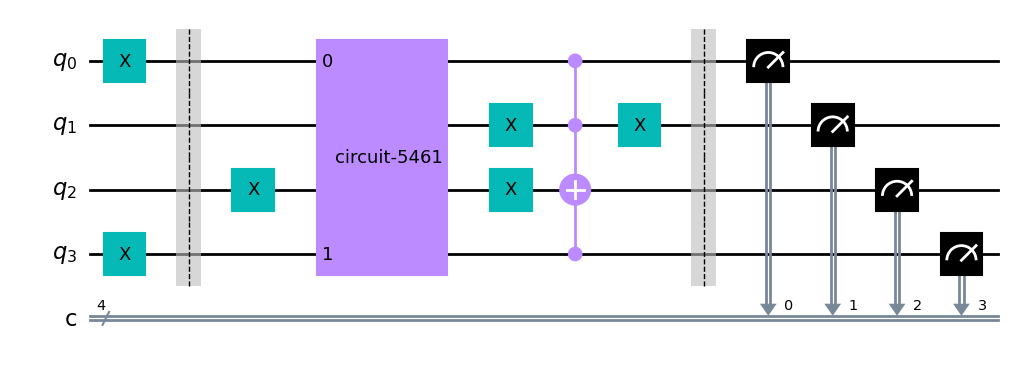

In [25]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(3)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl85uqdfa6vtjv91g7v0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


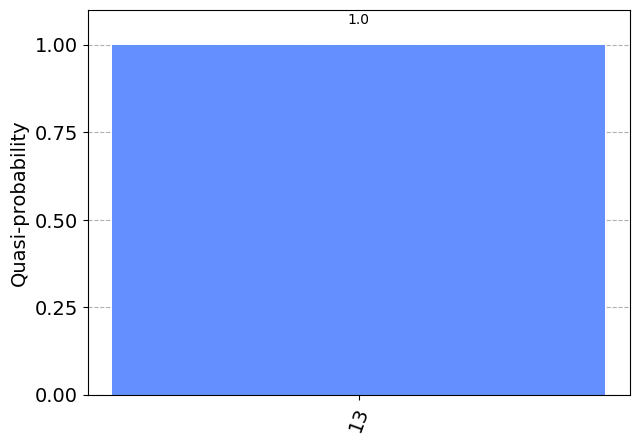

In [26]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 9 <-> 13
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying Chutes & Ladder Operator (7 <-> 7)

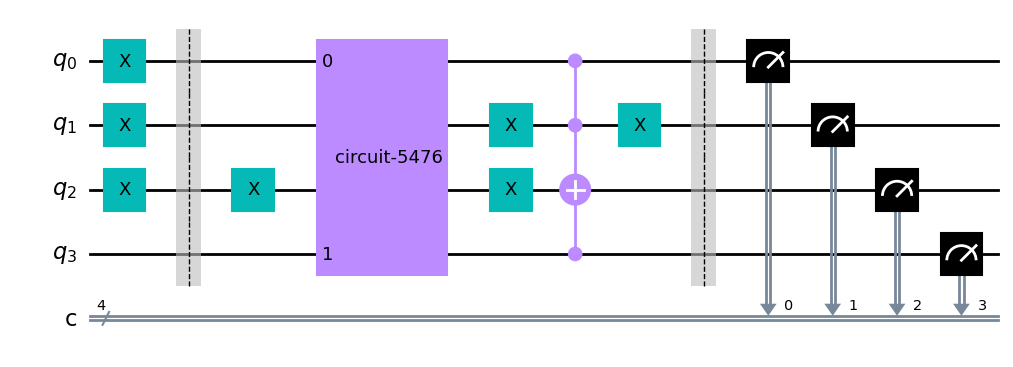

In [27]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)
CL.x(2)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl85urh6mcdhud4k22ug
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{7: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {7: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


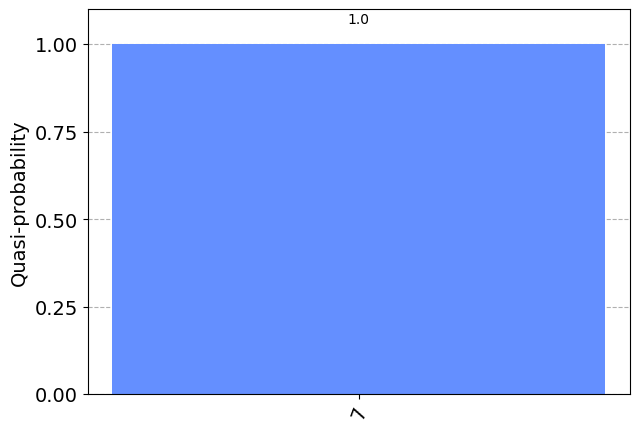

In [28]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 7 <-> 7
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Chutes & Ladders Board Evolution Operator

Chutes & Ladder Operator

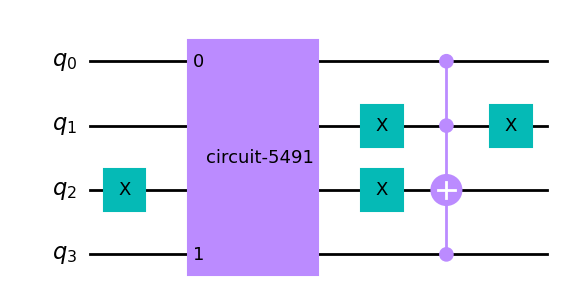

In [29]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

1 Step Chutes & Ladders Board Evolution Operator

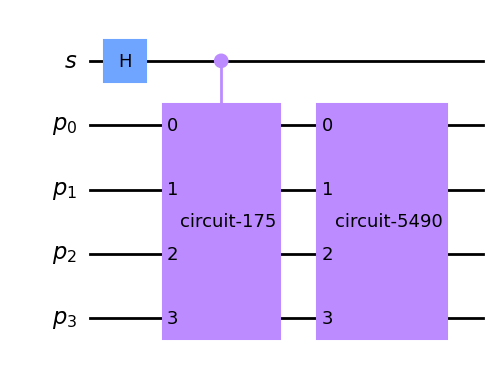

In [30]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])
circuit.append(CL, [p0, p1, p2, p3])

circuit.draw("mpl")

#5. Discussion

1) Role of Measurement in Quantum Chutes and Ladders Game

State measurement makes wave function collapse. Collapse of wave function arises randomness of Quantum Chutes and Ladders Game.

2) Measurement between Turns

Repetition of measurement and initializaing states is just repetition of 1 step evolution. Repetition of measurement can obtain probability of each state after 1 step evolution.

3) No Measurement between Turns

No measurement makes unitary evolution by each step. This procedure can obtain quantum superposition of states.

4) Quantum Analog of the "Memoryless" Nature of the Classical Game?

Quantum walks are quantum analogues of classical random walks.

Classical Walk : Walker occupy definite states and randomness arises from stocastic transitions defined by Markov's Process.

Quantum Walk : Randomness arises through quantum superposition of states, non-random, reversible unitary evolution and collapse of the wave function due to state measurements.

#6. Compare between #3 & #4 (10 Step)

1) Task 3 (Not Containing Chutes & Ladders)

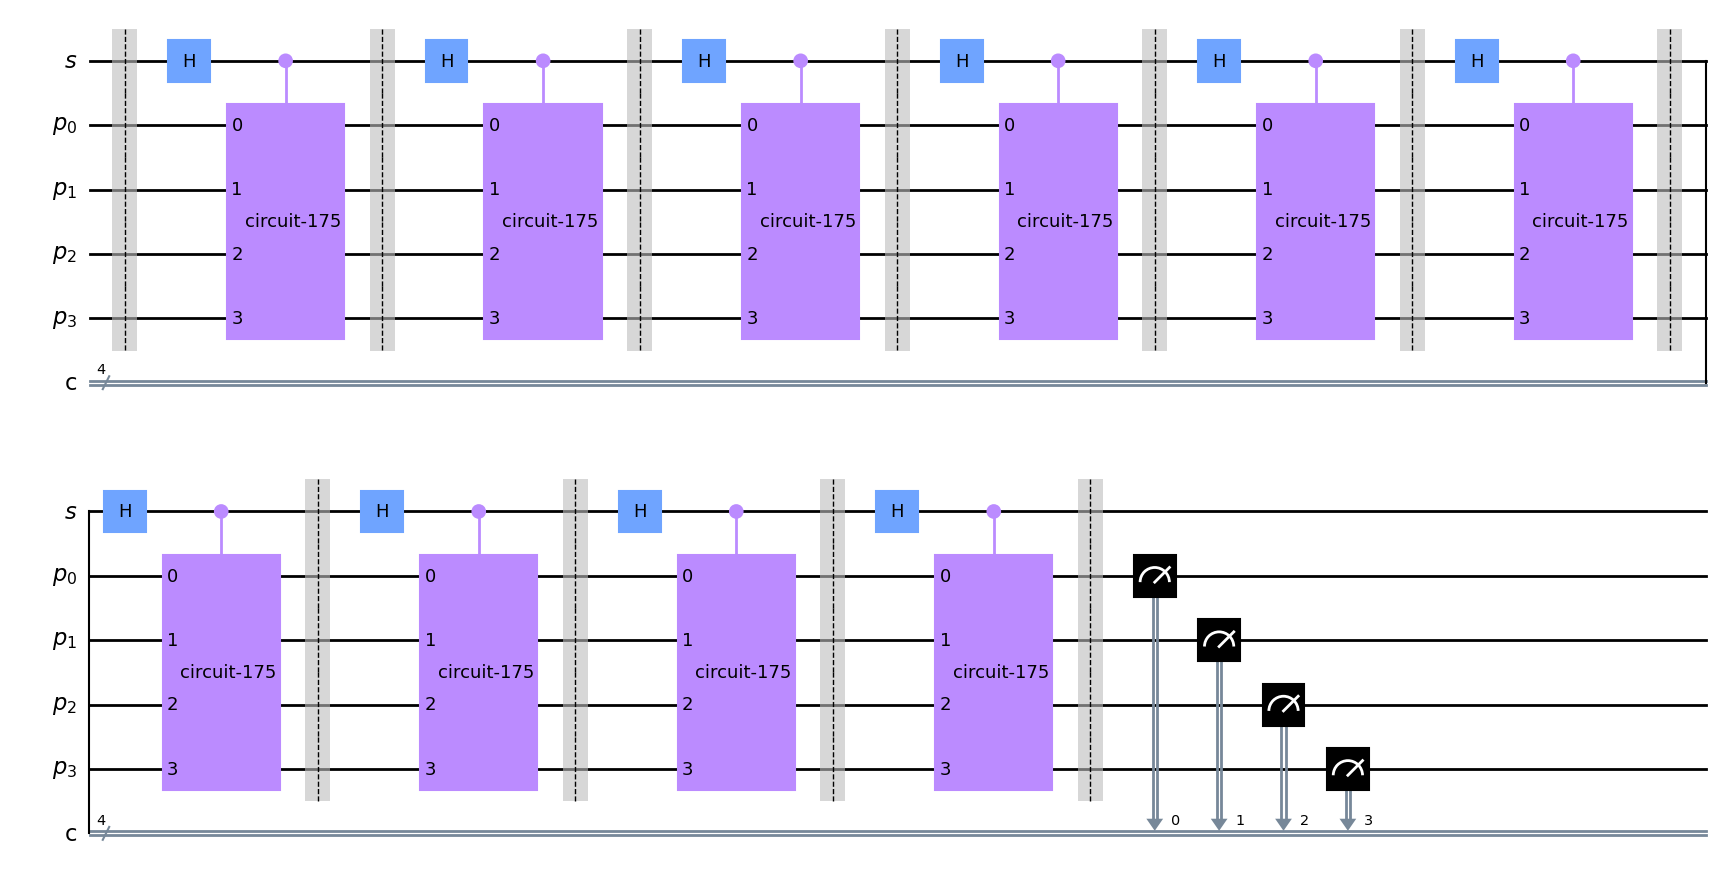

In [31]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl85ustfa6vtjv91g920
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00097, 9: 0.04841, 6: 0.04998, 4: 0.09752, 2: 0.43841, 5: 0.07125, 8: 0.08647, 1: 0.07913, 0: 0.00108, 7: 0.06369, 3: 0.06309}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00097, 9: 0.04841, 6: 0.04998, 4: 0.09752, 2: 0.43841, 5: 0.07125, 8: 0.08647, 1: 0.07913, 0: 0.00108, 7: 0.06369, 3: 0.06309}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

10


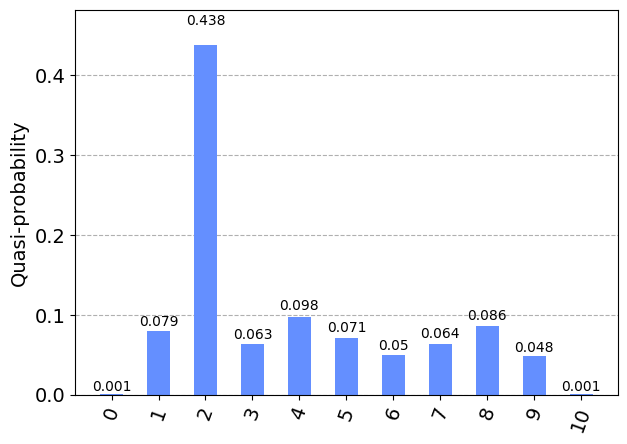

In [32]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Task 4 (Not Containing Chutes & Ladders)

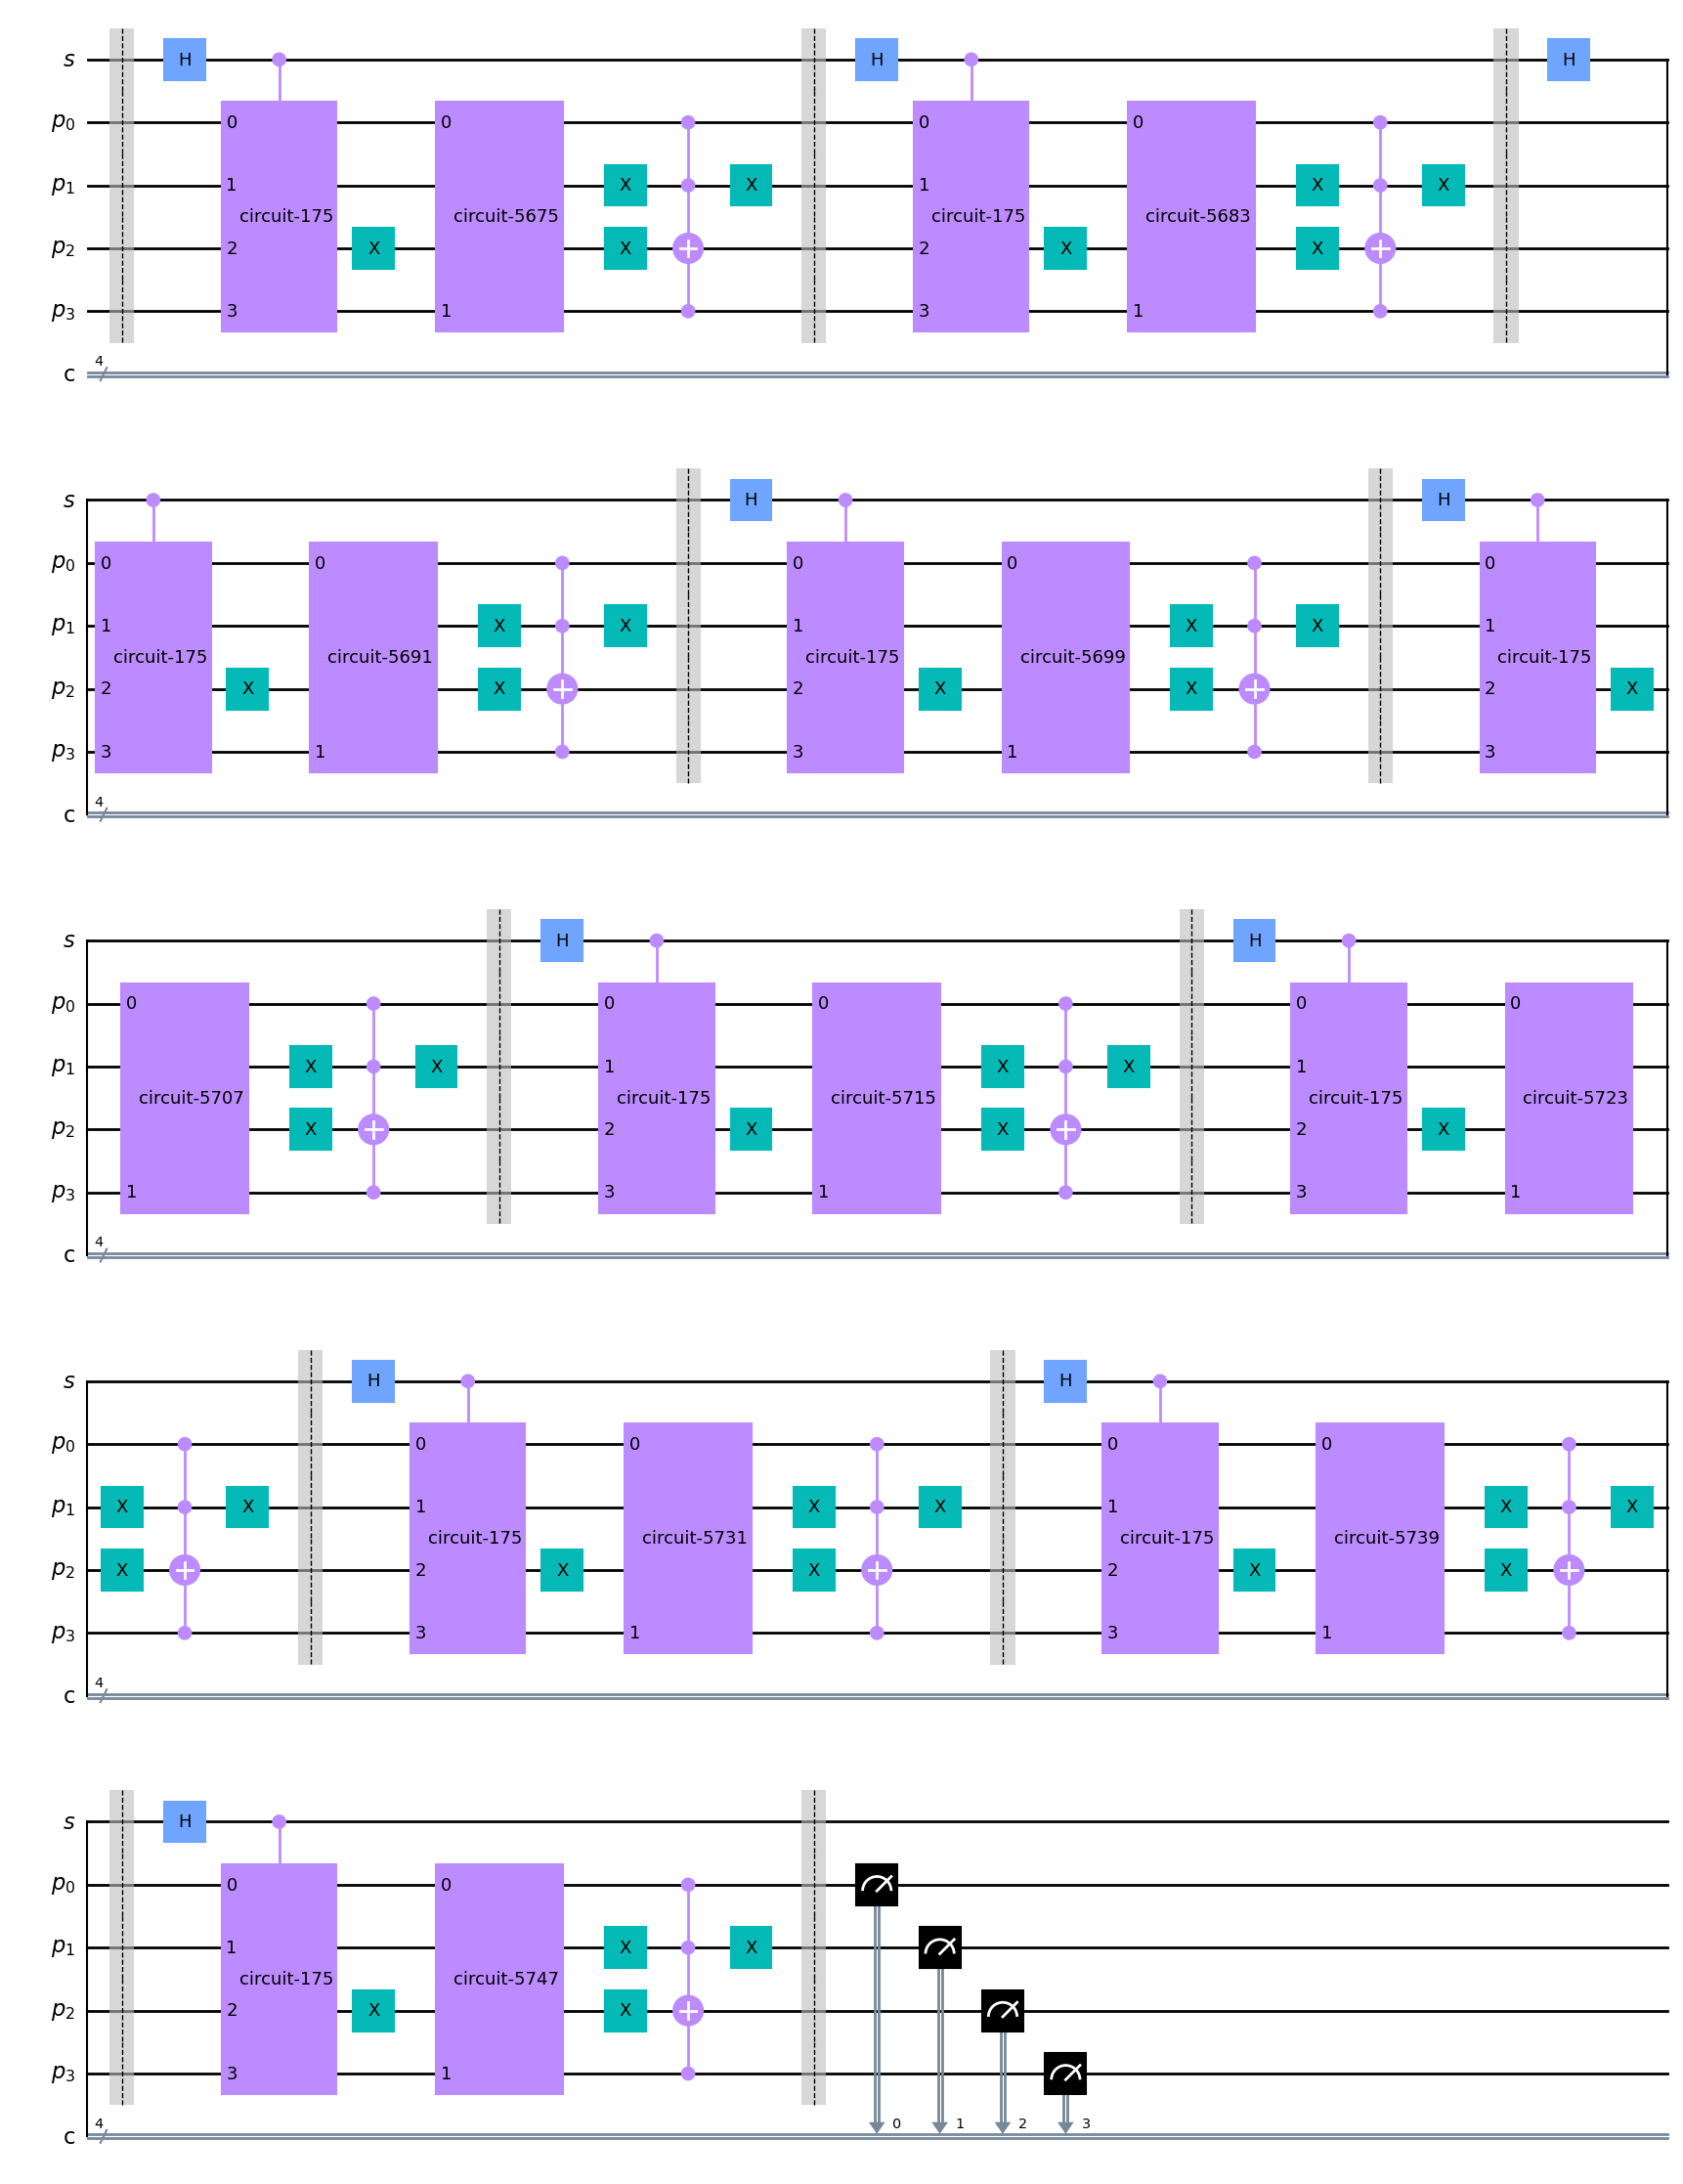

In [33]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

  qc1 = QuantumCircuit(2)
  qc1.swap(0,1)
  CSwapgate = qc1.to_gate().control(2)

  circuit.x(p2)
  circuit.append(CSwapgate, [p1,p2,p0,p3])
  circuit.x(p2)
  circuit.x(p1)
  circuit.append(C3XGate(), [p0,p1,p3,p2])
  circuit.x(p1)

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl85uu16mcdhud4k240g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00966, 4: 0.01978, 6: 0.00479, 14: 0.00474, 8: 0.02528, 12: 0.05142, 5: 0.05865, 9: 0.03645, 11: 0.08011, 2: 0.44171, 10: 0.07697, 15: 0.01672, 0: 0.0019, 3: 0.07861, 7: 0.01288, 1: 0.08033}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00966, 4: 0.01978, 6: 0.00479, 14: 0.00474, 8: 0.02528, 12: 0.05142, 5: 0.05865, 9: 0.03645, 11: 0.08011, 2: 0.44171, 10: 0.07697, 15: 0.01672, 0: 0.0019, 3: 0.07861, 7: 0.01288, 1: 0.08033}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

10


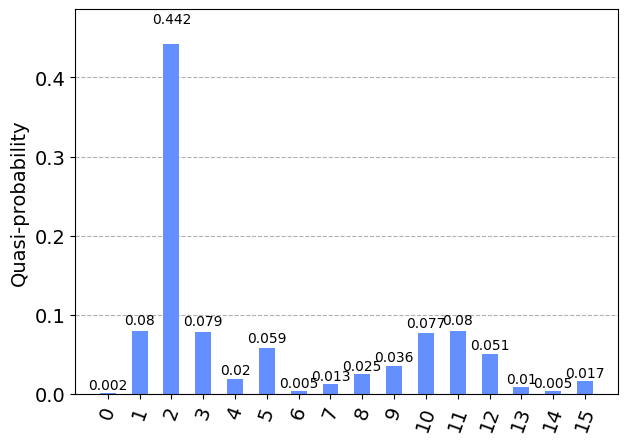

In [34]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

3) N Step Board Operator Containing Chutes & Ladders

>>> Job ID: cl85uv775e3r3c6jch00
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
0
{0: 1.0}
0.05859375


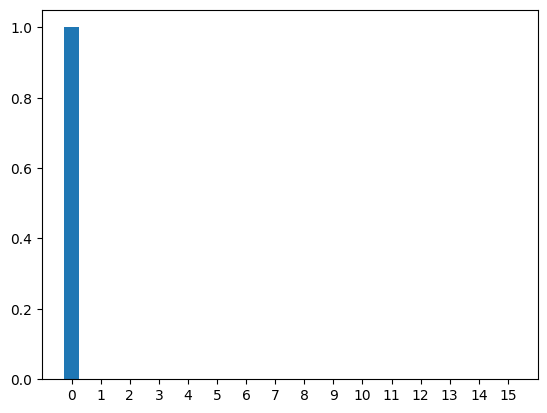



>>> Job ID: cl85uvvl4q34kqgq0qc0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.49948, 0: 0.50052}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.49948, 0: 0.50052}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
1
{1: 0.49948, 0: 0.50052}
0.027343783799999997


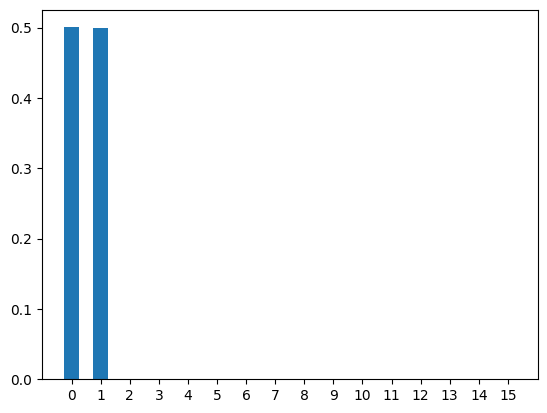



>>> Job ID: cl85v0t7pau17fl766jg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.25051, 0: 0.25158, 1: 0.49791}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.25051, 0: 0.25158, 1: 0.49791}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
2
{2: 0.25051, 0: 0.25158, 1: 0.49791}
0.019466382787500004


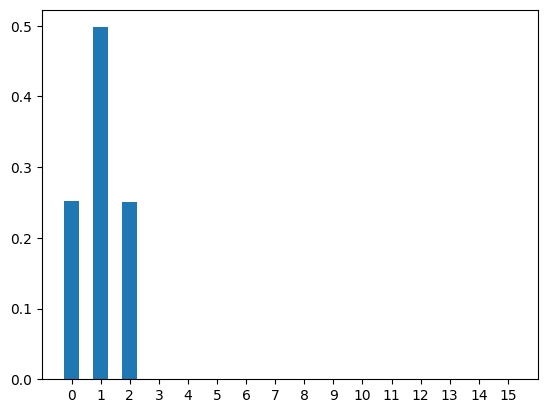



>>> Job ID: cl85v1l7pau17fl76720
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.12341, 1: 0.62585, 2: 0.12433, 0: 0.12641}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.12341, 1: 0.62585, 2: 0.12433, 0: 0.12641}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
3
{10: 0.12341, 1: 0.62585, 2: 0.12433, 0: 0.12641}
0.023490980475000003


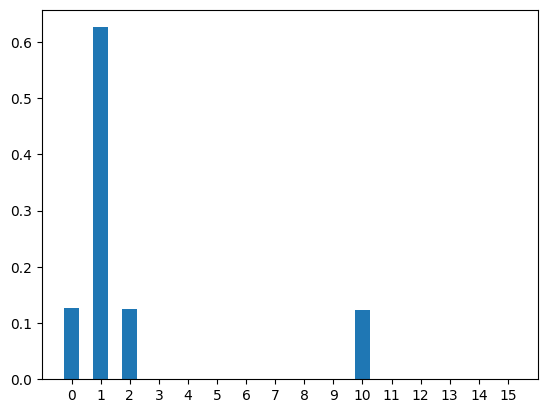



>>> Job ID: cl85v2fl4q34kqgq0rhg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.06265, 2: 0.12509, 1: 0.62361, 3: 0.06296, 10: 0.06244, 11: 0.06325}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.06265, 2: 0.12509, 1: 0.62361, 3: 0.06296, 10: 0.06244, 11: 0.06325}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
4
{0: 0.06265, 2: 0.12509, 1: 0.62361, 3: 0.06296, 10: 0.06244, 11: 0.06325}
0.022364077524999998


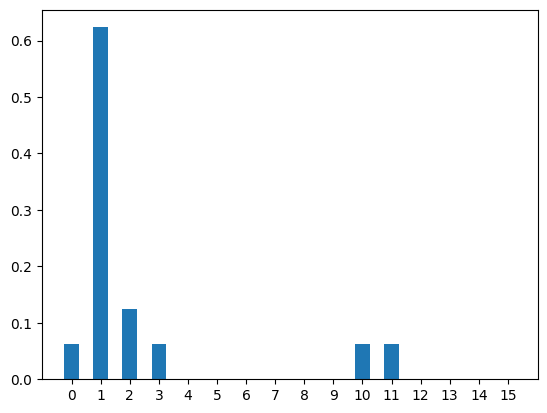



>>> Job ID: cl85v3775e3r3c6jcj00
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{12: 0.03066, 4: 0.03068, 1: 0.53131, 2: 0.12509, 10: 0.15744, 0: 0.03127, 3: 0.03152, 11: 0.06203}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {12: 0.03066, 4: 0.03068, 1: 0.53131, 2: 0.12509, 10: 0.15744, 0: 0.03127, 3: 0.03152, 11: 0.06203}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
5
{12: 0.03066, 4: 0.03068, 1: 0.53131, 2: 0.12509, 10: 0.15744, 0: 0.03127, 3: 0.03152, 11: 0.06203}
0.016745344999999995


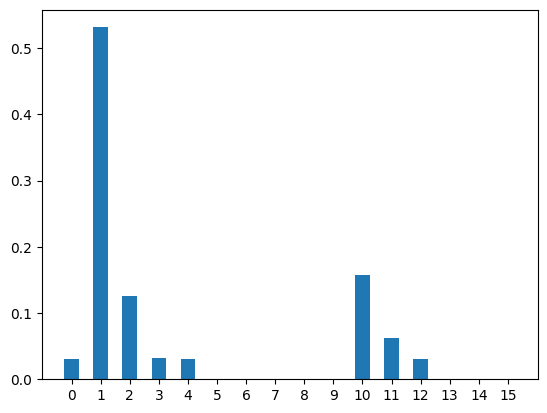



>>> Job ID: cl85v416mcdhud4k26ig
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01596, 5: 0.01557, 12: 0.07766, 1: 0.40577, 4: 0.03188, 11: 0.1398, 2: 0.20387, 0: 0.01563, 3: 0.01552, 10: 0.07834}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01596, 5: 0.01557, 12: 0.07766, 1: 0.40577, 4: 0.03188, 11: 0.1398, 2: 0.20387, 0: 0.01563, 3: 0.01552, 10: 0.07834}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
6
{9: 0.01596, 5: 0.01557, 12: 0.07766, 1: 0.40577, 4: 0.03188, 11: 0.1398, 2: 0.20387, 0: 0.01563, 3: 0.01552, 10: 0.07834}
0.011088949325000002


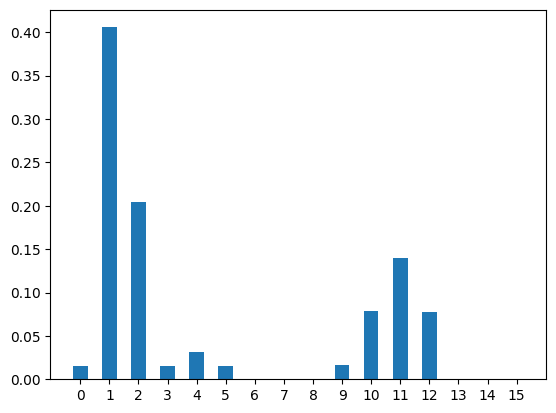



>>> Job ID: cl85v4v75e3r3c6jcjjg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{6: 0.00842, 4: 0.00862, 13: 0.0076, 10: 0.01556, 11: 0.07748, 1: 0.28522, 2: 0.32395, 0: 0.00764, 3: 0.07827, 5: 0.03884, 12: 0.07881, 9: 0.06959}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {6: 0.00842, 4: 0.00862, 13: 0.0076, 10: 0.01556, 11: 0.07748, 1: 0.28522, 2: 0.32395, 0: 0.00764, 3: 0.07827, 5: 0.03884, 12: 0.07881, 9: 0.06959}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
7
{6: 0.00842, 4: 0.00862, 13: 0.0076, 10: 0.01556, 11: 0.07748, 1: 0.28522, 2: 0.32395, 0: 0.00764, 3: 0.07827, 5: 0.03884, 12: 0.07881, 9: 0.06959}
0.009311822999999999


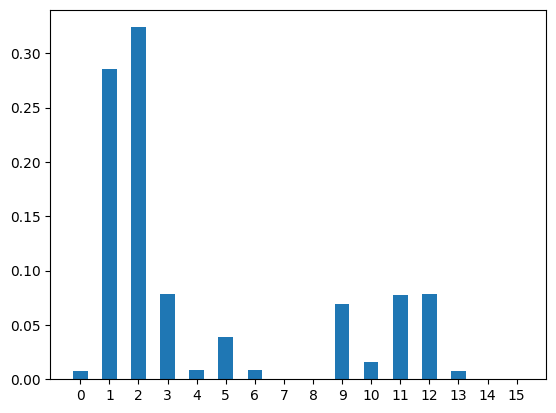



>>> Job ID: cl85v5t7pau17fl7692g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00423, 11: 0.06325, 10: 0.01977, 4: 0.0671, 6: 0.03888, 9: 0.0191, 5: 0.008, 12: 0.07882, 1: 0.19359, 2: 0.41482, 13: 0.03503, 7: 0.00385, 0: 0.00365, 3: 0.04991}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00423, 11: 0.06325, 10: 0.01977, 4: 0.0671, 6: 0.03888, 9: 0.0191, 5: 0.008, 12: 0.07882, 1: 0.19359, 2: 0.41482, 13: 0.03503, 7: 0.00385, 0: 0.00365, 3: 0.04991}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
8
{14: 0.00423, 11: 0.06325, 10: 0.01977, 4: 0.0671, 6: 0.03888, 9: 0.0191, 5: 0.008, 12: 0.07882, 1: 0.19359, 2: 0.41482, 13: 0.03503, 7: 0.00385, 0: 0.00365, 3: 0.04991}
0.010491484350000002


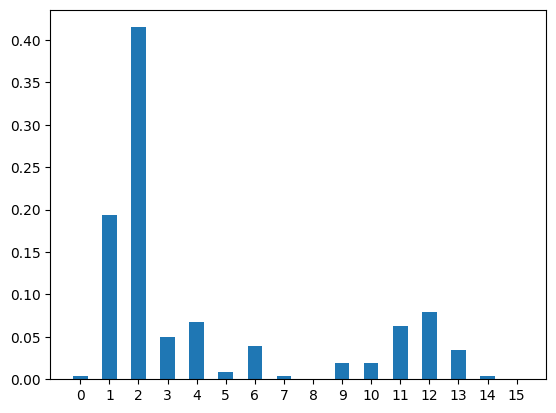



>>> Job ID: cl85v6p6mcdhud4k27p0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00194, 8: 0.00215, 14: 0.01942, 6: 0.00791, 4: 0.05087, 9: 0.08882, 7: 0.033, 0: 0.0021, 3: 0.01943, 15: 0.00189, 10: 0.07988, 1: 0.12682, 2: 0.45238, 11: 0.0478, 5: 0.02548, 12: 0.04011}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00194, 8: 0.00215, 14: 0.01942, 6: 0.00791, 4: 0.05087, 9: 0.08882, 7: 0.033, 0: 0.0021, 3: 0.01943, 15: 0.00189, 10: 0.07988, 1: 0.12682, 2: 0.45238, 11: 0.0478, 5: 0.02548, 12: 0.04011}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
9
{13: 0.00194, 8: 0.00215, 14: 0.01942, 6: 0.00791, 4: 0.05087, 9: 0.08882, 7: 0.033, 0: 0.0021, 3: 0.01943, 15: 0.00189, 10: 0.07988, 1: 0.12682, 2: 0.45238, 11: 0.0478, 5: 0.02548, 12: 0.04011}
0.0113471262875


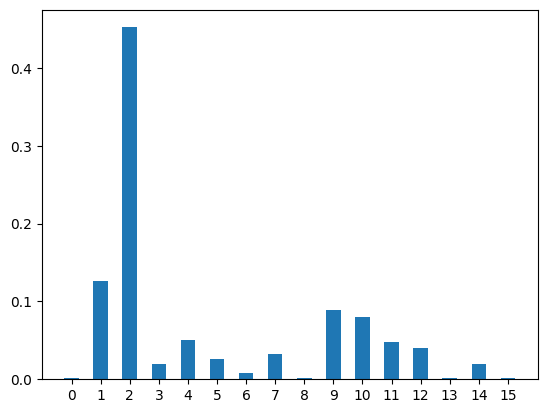



>>> Job ID: cl85v7p5o5utp9c00ga0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00455, 8: 0.02552, 6: 0.00515, 4: 0.01985, 13: 0.00965, 5: 0.05974, 12: 0.05178, 15: 0.01723, 10: 0.0786, 2: 0.43736, 0: 0.00205, 7: 0.0132, 3: 0.08068, 1: 0.08021, 11: 0.07842, 9: 0.03601}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00455, 8: 0.02552, 6: 0.00515, 4: 0.01985, 13: 0.00965, 5: 0.05974, 12: 0.05178, 15: 0.01723, 10: 0.0786, 2: 0.43736, 0: 0.00205, 7: 0.0132, 3: 0.08068, 1: 0.08021, 11: 0.07842, 9: 0.03601}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
10
{14: 0.00455, 8: 0.02552, 6: 0.00515, 4: 0.01985, 13: 0.00965, 5: 0.05974, 12: 0.05178, 15: 0.01723, 10: 0.0786, 2: 0.43736, 0: 0.00205, 7: 0.0132, 3: 0.08068, 1: 0.08021, 11: 0.07842, 9: 0.03601}
0.010203877775000002


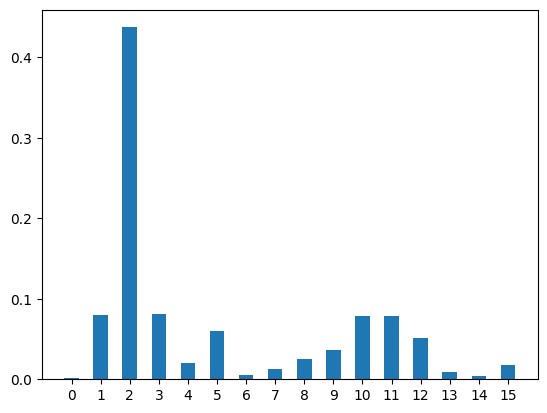



>>> Job ID: cl85v8vl4q34kqgq0uc0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.02073, 13: 0.02865, 14: 0.00635, 9: 0.02112, 7: 0.00107, 0: 0.01212, 3: 0.03222, 2: 0.38772, 12: 0.08734, 5: 0.01827, 1: 0.05062, 15: 0.00468, 10: 0.11289, 11: 0.10103, 6: 0.06414, 4: 0.05105}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.02073, 13: 0.02865, 14: 0.00635, 9: 0.02112, 7: 0.00107, 0: 0.01212, 3: 0.03222, 2: 0.38772, 12: 0.08734, 5: 0.01827, 1: 0.05062, 15: 0.00468, 10: 0.11289, 11: 0.10103, 6: 0.06414, 4: 0.05105}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
11
{8: 0.02073, 13: 0.02865, 14: 0.00635, 9: 0.02112, 7: 0.00107, 0: 0.01212, 3: 0.03222, 2: 0.38772, 12: 0.08734, 5: 0.01827, 1: 0.05062, 15: 0.00468, 10: 0.11289, 11: 0.10103, 6: 0.06414, 4: 0.05105}
0.0081854693


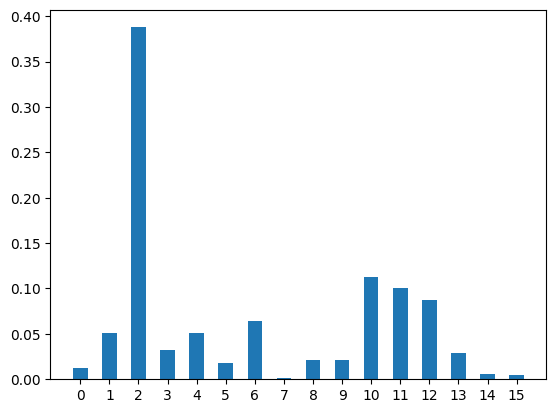



>>> Job ID: cl85v9p5o5utp9c00ha0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00048, 8: 0.00116, 1: 0.04158, 4: 0.03641, 6: 0.02144, 13: 0.03999, 14: 0.02955, 5: 0.02775, 12: 0.0916, 2: 0.31728, 15: 0.00686, 10: 0.11716, 11: 0.10344, 0: 0.00955, 7: 0.04758, 3: 0.10817}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00048, 8: 0.00116, 1: 0.04158, 4: 0.03641, 6: 0.02144, 13: 0.03999, 14: 0.02955, 5: 0.02775, 12: 0.0916, 2: 0.31728, 15: 0.00686, 10: 0.11716, 11: 0.10344, 0: 0.00955, 7: 0.04758, 3: 0.10817}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
12
{9: 0.00048, 8: 0.00116, 1: 0.04158, 4: 0.03641, 6: 0.02144, 13: 0.03999, 14: 0.02955, 5: 0.02775, 12: 0.0916, 2: 0.31728, 15: 0.00686, 10: 0.11716, 11: 0.10344, 0: 0.00955, 7: 0.04758, 3: 0.10817}
0.0057402890125


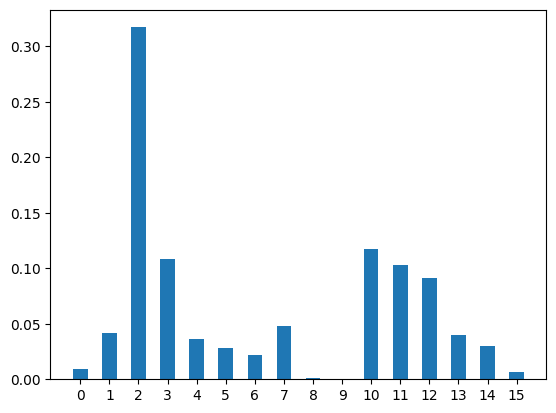



>>> Job ID: cl85vat7pau17fl76b30
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00011, 1: 0.0163, 11: 0.08478, 14: 0.0119, 0: 0.0063, 7: 0.02453, 3: 0.11019, 6: 0.04901, 4: 0.07642, 5: 0.01007, 12: 0.09085, 9: 0.06785, 15: 0.01902, 10: 0.14806, 2: 0.25973, 8: 0.02488}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00011, 1: 0.0163, 11: 0.08478, 14: 0.0119, 0: 0.0063, 7: 0.02453, 3: 0.11019, 6: 0.04901, 4: 0.07642, 5: 0.01007, 12: 0.09085, 9: 0.06785, 15: 0.01902, 10: 0.14806, 2: 0.25973, 8: 0.02488}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
13
{13: 0.00011, 1: 0.0163, 11: 0.08478, 14: 0.0119, 0: 0.0063, 7: 0.02453, 3: 0.11019, 6: 0.04901, 4: 0.07642, 5: 0.01007, 12: 0.09085, 9: 0.06785, 15: 0.01902, 10: 0.14806, 2: 0.25973, 8: 0.02488}
0.004340072825


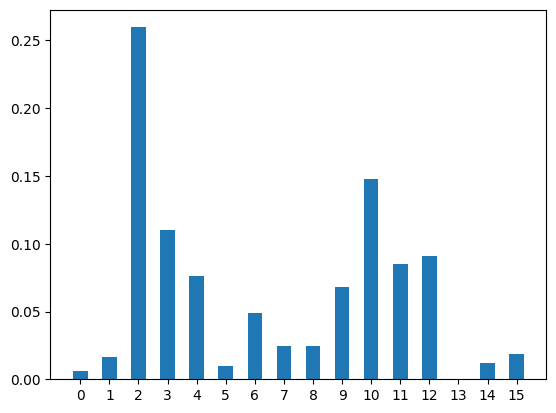



>>> Job ID: cl85vbvl4q34kqgq0vog
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00649, 13: 0.00776, 1: 0.01858, 8: 0.03521, 9: 0.08589, 6: 0.00649, 4: 0.04939, 11: 0.0672, 0: 0.00699, 7: 0.05595, 3: 0.21212, 2: 0.22197, 12: 0.02163, 5: 0.08009, 15: 0.02029, 10: 0.10395}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00649, 13: 0.00776, 1: 0.01858, 8: 0.03521, 9: 0.08589, 6: 0.00649, 4: 0.04939, 11: 0.0672, 0: 0.00699, 7: 0.05595, 3: 0.21212, 2: 0.22197, 12: 0.02163, 5: 0.08009, 15: 0.02029, 10: 0.10395}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
14
{14: 0.00649, 13: 0.00776, 1: 0.01858, 8: 0.03521, 9: 0.08589, 6: 0.00649, 4: 0.04939, 11: 0.0672, 0: 0.00699, 7: 0.05595, 3: 0.21212, 2: 0.22197, 12: 0.02163, 5: 0.08009, 15: 0.02029, 10: 0.10395}
0.004319132


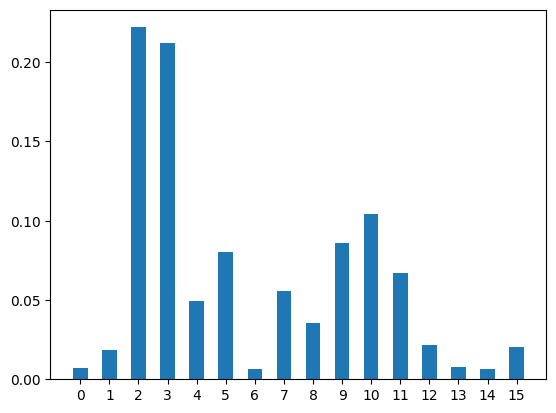



>>> Job ID: cl85vdt7pau17fl76cn0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00431, 1: 0.01786, 12: 0.02559, 5: 0.07319, 13: 0.07804, 2: 0.10315, 6: 0.02395, 4: 0.23765, 11: 0.04496, 7: 0.01312, 0: 0.02632, 3: 0.14945, 8: 0.04707, 15: 0.00449, 10: 0.12533, 9: 0.02552}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00431, 1: 0.01786, 12: 0.02559, 5: 0.07319, 13: 0.07804, 2: 0.10315, 6: 0.02395, 4: 0.23765, 11: 0.04496, 7: 0.01312, 0: 0.02632, 3: 0.14945, 8: 0.04707, 15: 0.00449, 10: 0.12533, 9: 0.02552}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
15
{14: 0.00431, 1: 0.01786, 12: 0.02559, 5: 0.07319, 13: 0.07804, 2: 0.10315, 6: 0.02395, 4: 0.23765, 11: 0.04496, 7: 0.01312, 0: 0.02632, 3: 0.14945, 8: 0.04707, 15: 0.00449, 10: 0.12533, 9: 0.02552}
0.0038404171375


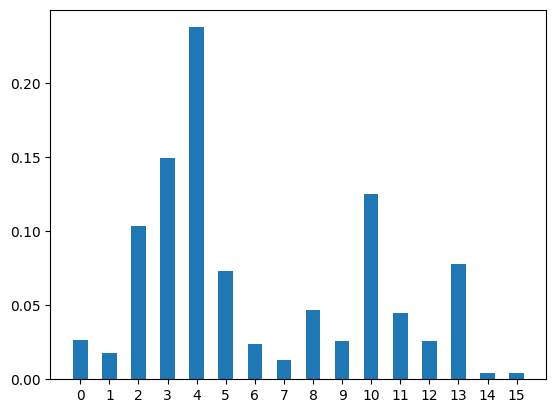



>>> Job ID: cl85vep5o5utp9c00jr0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00016, 13: 0.02607, 15: 0.00526, 10: 0.04272, 11: 0.04765, 8: 0.03648, 1: 0.03519, 12: 0.05012, 5: 0.10206, 2: 0.07293, 6: 0.02459, 4: 0.34757, 0: 0.00542, 7: 0.00599, 3: 0.11446, 9: 0.08333}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00016, 13: 0.02607, 15: 0.00526, 10: 0.04272, 11: 0.04765, 8: 0.03648, 1: 0.03519, 12: 0.05012, 5: 0.10206, 2: 0.07293, 6: 0.02459, 4: 0.34757, 0: 0.00542, 7: 0.00599, 3: 0.11446, 9: 0.08333}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
16
{14: 0.00016, 13: 0.02607, 15: 0.00526, 10: 0.04272, 11: 0.04765, 8: 0.03648, 1: 0.03519, 12: 0.05012, 5: 0.10206, 2: 0.07293, 6: 0.02459, 4: 0.34757, 0: 0.00542, 7: 0.00599, 3: 0.11446, 9: 0.08333}
0.0065399274


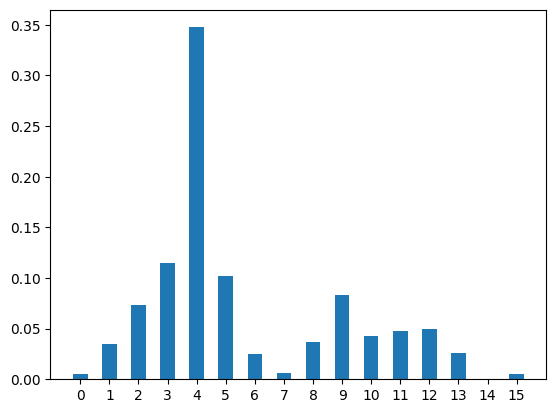



>>> Job ID: cl85vg95o5utp9c00ki0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0014, 8: 0.00509, 11: 0.05277, 14: 0.00623, 13: 0.09774, 15: 0.00415, 10: 0.02652, 9: 0.01973, 5: 0.10162, 12: 0.05143, 2: 0.09088, 6: 0.00401, 4: 0.45058, 0: 0.0064, 7: 0.02444, 3: 0.05701}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0014, 8: 0.00509, 11: 0.05277, 14: 0.00623, 13: 0.09774, 15: 0.00415, 10: 0.02652, 9: 0.01973, 5: 0.10162, 12: 0.05143, 2: 0.09088, 6: 0.00401, 4: 0.45058, 0: 0.0064, 7: 0.02444, 3: 0.05701}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
17
{1: 0.0014, 8: 0.00509, 11: 0.05277, 14: 0.00623, 13: 0.09774, 15: 0.00415, 10: 0.02652, 9: 0.01973, 5: 0.10162, 12: 0.05143, 2: 0.09088, 6: 0.00401, 4: 0.45058, 0: 0.0064, 7: 0.02444, 3: 0.05701}
0.011198246324999998


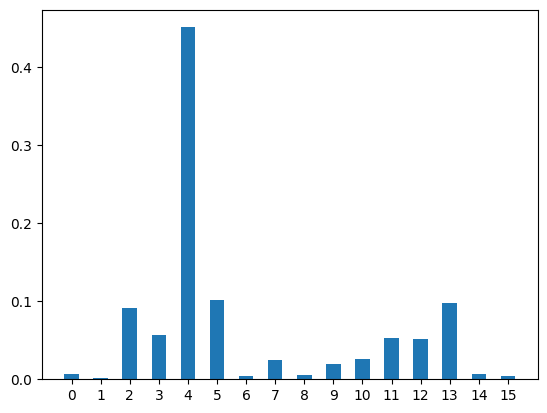



>>> Job ID: cl85vhh5o5utp9c00l1g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00222, 15: 0.00656, 10: 0.05859, 8: 0.0186, 9: 0.03526, 13: 0.01681, 14: 0.09762, 2: 0.09173, 11: 0.04533, 6: 0.06886, 4: 0.41289, 7: 0.01038, 0: 0.00666, 3: 0.03341, 12: 0.02528, 5: 0.0698}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00222, 15: 0.00656, 10: 0.05859, 8: 0.0186, 9: 0.03526, 13: 0.01681, 14: 0.09762, 2: 0.09173, 11: 0.04533, 6: 0.06886, 4: 0.41289, 7: 0.01038, 0: 0.00666, 3: 0.03341, 12: 0.02528, 5: 0.0698}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
18
{1: 0.00222, 15: 0.00656, 10: 0.05859, 8: 0.0186, 9: 0.03526, 13: 0.01681, 14: 0.09762, 2: 0.09173, 11: 0.04533, 6: 0.06886, 4: 0.41289, 7: 0.01038, 0: 0.00666, 3: 0.03341, 12: 0.02528, 5: 0.0698}
0.0090531698875


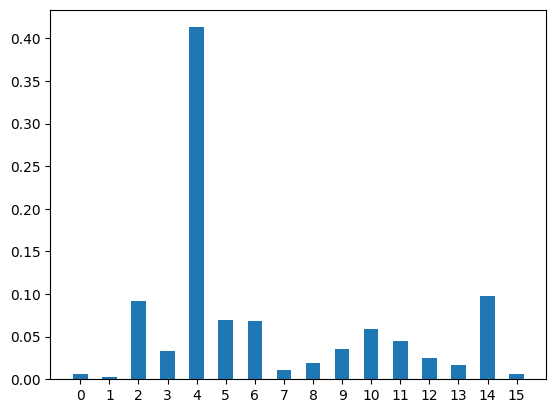



>>> Job ID: cl85vj5fa6vtjv91gjf0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00181, 1: 0.00632, 11: 0.04388, 8: 0.0059, 14: 0.04875, 15: 0.06501, 10: 0.07885, 13: 0.02419, 2: 0.04261, 6: 0.10442, 4: 0.23355, 0: 0.00678, 7: 0.04252, 3: 0.06413, 12: 0.04429, 5: 0.18699}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00181, 1: 0.00632, 11: 0.04388, 8: 0.0059, 14: 0.04875, 15: 0.06501, 10: 0.07885, 13: 0.02419, 2: 0.04261, 6: 0.10442, 4: 0.23355, 0: 0.00678, 7: 0.04252, 3: 0.06413, 12: 0.04429, 5: 0.18699}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
19
{9: 0.00181, 1: 0.00632, 11: 0.04388, 8: 0.0059, 14: 0.04875, 15: 0.06501, 10: 0.07885, 13: 0.02419, 2: 0.04261, 6: 0.10442, 4: 0.23355, 0: 0.00678, 7: 0.04252, 3: 0.06413, 12: 0.04429, 5: 0.18699}
0.0039416884375


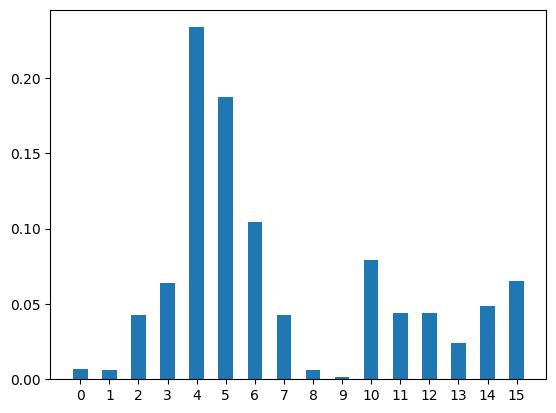



>>> Job ID: cl85vkfl4q34kqgq13rg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00022, 2: 0.01513, 13: 0.00354, 1: 0.00833, 8: 0.00546, 15: 0.03269, 10: 0.09576, 11: 0.00141, 12: 0.08918, 5: 0.17946, 6: 0.19722, 4: 0.14317, 14: 0.07019, 7: 0.04309, 0: 0.03434, 3: 0.08081}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00022, 2: 0.01513, 13: 0.00354, 1: 0.00833, 8: 0.00546, 15: 0.03269, 10: 0.09576, 11: 0.00141, 12: 0.08918, 5: 0.17946, 6: 0.19722, 4: 0.14317, 14: 0.07019, 7: 0.04309, 0: 0.03434, 3: 0.08081}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
20
{9: 0.00022, 2: 0.01513, 13: 0.00354, 1: 0.00833, 8: 0.00546, 15: 0.03269, 10: 0.09576, 11: 0.00141, 12: 0.08918, 5: 0.17946, 6: 0.19722, 4: 0.14317, 14: 0.07019, 7: 0.04309, 0: 0.03434, 3: 0.08081}
0.003882907275


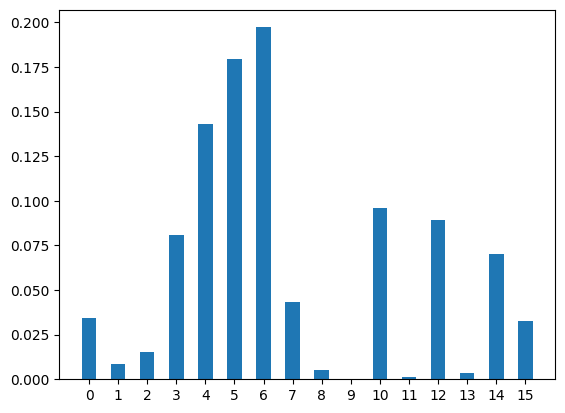



>>> Job ID: cl85vlfl4q34kqgq14fg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 9e-05, 2: 0.00161, 14: 0.0041, 11: 0.00397, 9: 0.00198, 1: 0.03243, 8: 0.01555, 7: 0.0317, 3: 0.09352, 0: 0.03407, 4: 0.10894, 6: 0.19448, 5: 0.24468, 12: 0.08999, 15: 0.07685, 10: 0.06604}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 9e-05, 2: 0.00161, 14: 0.0041, 11: 0.00397, 9: 0.00198, 1: 0.03243, 8: 0.01555, 7: 0.0317, 3: 0.09352, 0: 0.03407, 4: 0.10894, 6: 0.19448, 5: 0.24468, 12: 0.08999, 15: 0.07685, 10: 0.06604}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
21
{13: 9e-05, 2: 0.00161, 14: 0.0041, 11: 0.00397, 9: 0.00198, 1: 0.03243, 8: 0.01555, 7: 0.0317, 3: 0.09352, 0: 0.03407, 4: 0.10894, 6: 0.19448, 5: 0.24468, 12: 0.08999, 15: 0.07685, 10: 0.06604}
0.00485427155


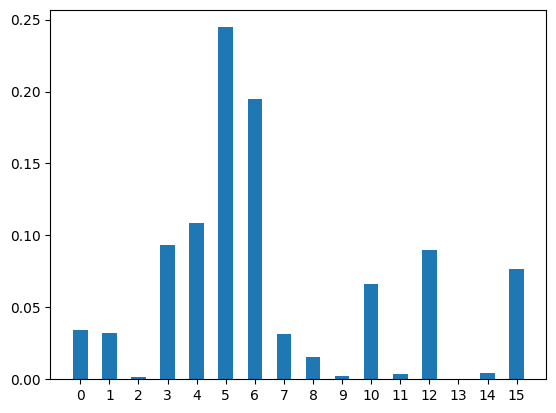



>>> Job ID: cl85vmn75e3r3c6jcrug
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.00587, 2: 0.0302, 1: 0.03496, 14: 0.00432, 15: 0.01306, 10: 0.05152, 13: 0.01572, 8: 0.01751, 0: 0.06409, 7: 0.11372, 3: 0.0609, 9: 0.04963, 12: 0.04429, 5: 0.23828, 6: 0.11146, 4: 0.14447}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.00587, 2: 0.0302, 1: 0.03496, 14: 0.00432, 15: 0.01306, 10: 0.05152, 13: 0.01572, 8: 0.01751, 0: 0.06409, 7: 0.11372, 3: 0.0609, 9: 0.04963, 12: 0.04429, 5: 0.23828, 6: 0.11146, 4: 0.14447}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
22
{11: 0.00587, 2: 0.0302, 1: 0.03496, 14: 0.00432, 15: 0.01306, 10: 0.05152, 13: 0.01572, 8: 0.01751, 0: 0.06409, 7: 0.11372, 3: 0.0609, 9: 0.04963, 12: 0.04429, 5: 0.23828, 6: 0.11146, 4: 0.14447}
0.0036444713624999995


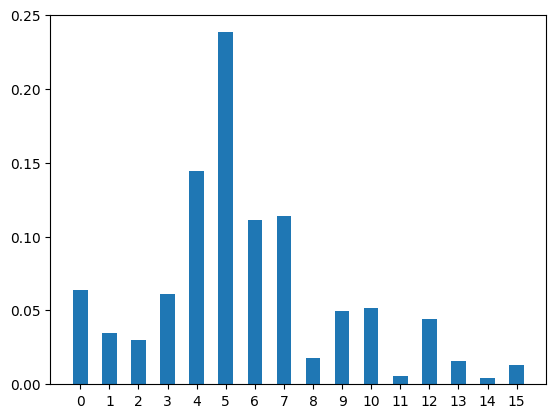



>>> Job ID: cl85vnvl4q34kqgq15gg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.0054, 11: 0.02101, 15: 0.00941, 10: 0.03565, 1: 0.0326, 2: 0.04319, 9: 0.02185, 13: 0.02942, 8: 0.1061, 12: 0.03733, 5: 0.16322, 6: 0.09761, 4: 0.17532, 7: 0.11393, 3: 0.0598, 0: 0.04816}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.0054, 11: 0.02101, 15: 0.00941, 10: 0.03565, 1: 0.0326, 2: 0.04319, 9: 0.02185, 13: 0.02942, 8: 0.1061, 12: 0.03733, 5: 0.16322, 6: 0.09761, 4: 0.17532, 7: 0.11393, 3: 0.0598, 0: 0.04816}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
23
{14: 0.0054, 11: 0.02101, 15: 0.00941, 10: 0.03565, 1: 0.0326, 2: 0.04319, 9: 0.02185, 13: 0.02942, 8: 0.1061, 12: 0.03733, 5: 0.16322, 6: 0.09761, 4: 0.17532, 7: 0.11393, 3: 0.0598, 0: 0.04816}
0.002627058625


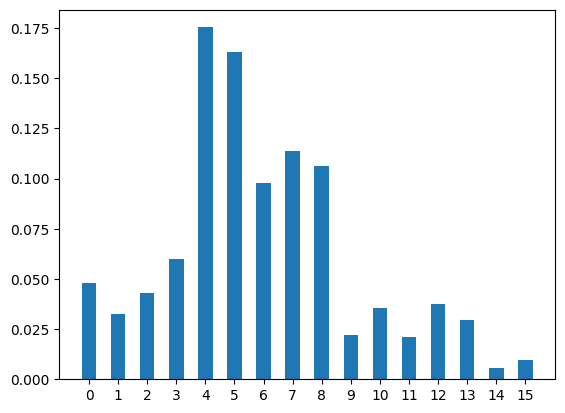



>>> Job ID: cl85vp775e3r3c6jct5g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00242, 14: 0.00825, 11: 0.05475, 1: 0.07153, 9: 0.03682, 15: 0.00931, 10: 0.10279, 6: 0.06031, 4: 0.16047, 13: 0.04191, 8: 0.10159, 5: 0.12897, 12: 0.02831, 3: 0.00093, 0: 0.00771, 7: 0.18393}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00242, 14: 0.00825, 11: 0.05475, 1: 0.07153, 9: 0.03682, 15: 0.00931, 10: 0.10279, 6: 0.06031, 4: 0.16047, 13: 0.04191, 8: 0.10159, 5: 0.12897, 12: 0.02831, 3: 0.00093, 0: 0.00771, 7: 0.18393}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
24
{2: 0.00242, 14: 0.00825, 11: 0.05475, 1: 0.07153, 9: 0.03682, 15: 0.00931, 10: 0.10279, 6: 0.06031, 4: 0.16047, 13: 0.04191, 8: 0.10159, 5: 0.12897, 12: 0.02831, 3: 0.00093, 0: 0.00771, 7: 0.18393}
0.0031553974374999997


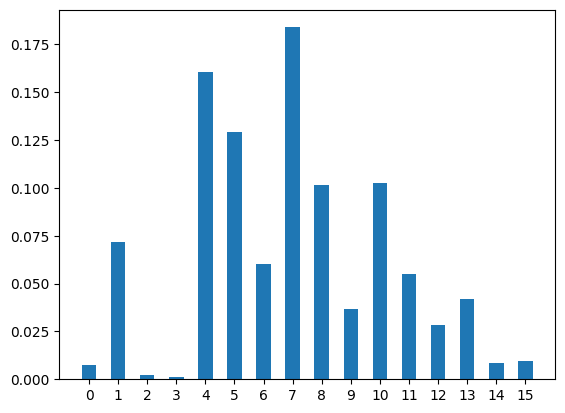



>>> Job ID: cl85vqnl4q34kqgq16mg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00037, 10: 0.00048, 15: 0.01096, 13: 0.05052, 8: 0.08627, 4: 0.08722, 6: 0.07592, 0: 0.00803, 3: 0.1047, 7: 0.1894, 9: 0.04724, 2: 0.07475, 12: 0.02379, 5: 0.18009, 1: 0.00688, 11: 0.05338}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00037, 10: 0.00048, 15: 0.01096, 13: 0.05052, 8: 0.08627, 4: 0.08722, 6: 0.07592, 0: 0.00803, 3: 0.1047, 7: 0.1894, 9: 0.04724, 2: 0.07475, 12: 0.02379, 5: 0.18009, 1: 0.00688, 11: 0.05338}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
25
{14: 0.00037, 10: 0.00048, 15: 0.01096, 13: 0.05052, 8: 0.08627, 4: 0.08722, 6: 0.07592, 0: 0.00803, 3: 0.1047, 7: 0.1894, 9: 0.04724, 2: 0.07475, 12: 0.02379, 5: 0.18009, 1: 0.00688, 11: 0.05338}
0.0032249805625000003


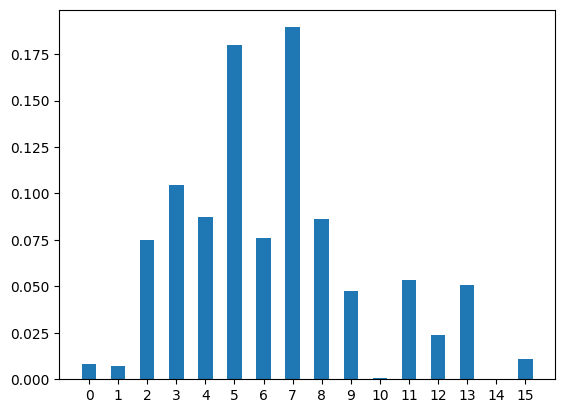



>>> Job ID: cl85vs7l4q34kqgq17c0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00878, 1: 0.01254, 14: 0.04765, 2: 0.02593, 8: 0.09725, 5: 0.21441, 12: 0.0387, 0: 0.00127, 3: 0.00847, 7: 0.13352, 15: 0.01021, 10: 0.08798, 13: 0.0869, 11: 0.0333, 6: 0.07414, 4: 0.11895}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00878, 1: 0.01254, 14: 0.04765, 2: 0.02593, 8: 0.09725, 5: 0.21441, 12: 0.0387, 0: 0.00127, 3: 0.00847, 7: 0.13352, 15: 0.01021, 10: 0.08798, 13: 0.0869, 11: 0.0333, 6: 0.07414, 4: 0.11895}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
26
{9: 0.00878, 1: 0.01254, 14: 0.04765, 2: 0.02593, 8: 0.09725, 5: 0.21441, 12: 0.0387, 0: 0.00127, 3: 0.00847, 7: 0.13352, 15: 0.01021, 10: 0.08798, 13: 0.0869, 11: 0.0333, 6: 0.07414, 4: 0.11895}
0.003228508675


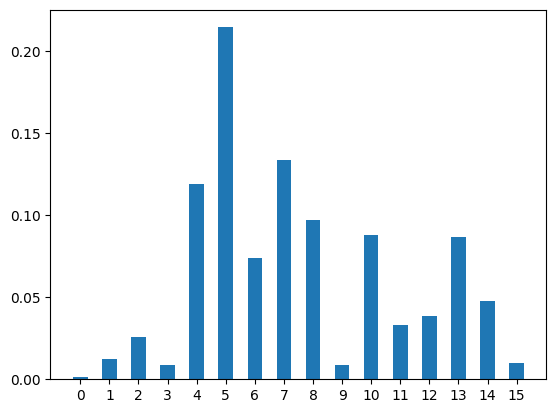



>>> Job ID: cl85vtf75e3r3c6jcv10
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.02075, 1: 0.01338, 9: 0.03876, 3: 0.00105, 0: 0.0042, 7: 0.07302, 8: 0.08788, 10: 0.0086, 15: 0.03324, 13: 0.10575, 14: 0.10826, 12: 0.0171, 5: 0.1872, 11: 0.10368, 6: 0.07361, 4: 0.12352}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.02075, 1: 0.01338, 9: 0.03876, 3: 0.00105, 0: 0.0042, 7: 0.07302, 8: 0.08788, 10: 0.0086, 15: 0.03324, 13: 0.10575, 14: 0.10826, 12: 0.0171, 5: 0.1872, 11: 0.10368, 6: 0.07361, 4: 0.12352}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
27
{2: 0.02075, 1: 0.01338, 9: 0.03876, 3: 0.00105, 0: 0.0042, 7: 0.07302, 8: 0.08788, 10: 0.0086, 15: 0.03324, 13: 0.10575, 14: 0.10826, 12: 0.0171, 5: 0.1872, 11: 0.10368, 6: 0.07361, 4: 0.12352}
0.002720565275


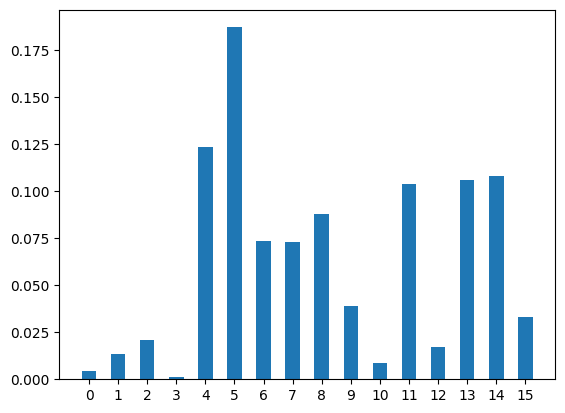



>>> Job ID: cl85vuv75e3r3c6jcvj0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00856, 15: 0.0411, 0: 0.00529, 3: 0.02245, 7: 0.00296, 1: 0.00458, 13: 0.05078, 2: 0.02124, 9: 0.03175, 8: 0.12564, 12: 0.02267, 5: 0.11958, 14: 0.18107, 6: 0.17625, 4: 0.08915, 11: 0.09693}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00856, 15: 0.0411, 0: 0.00529, 3: 0.02245, 7: 0.00296, 1: 0.00458, 13: 0.05078, 2: 0.02124, 9: 0.03175, 8: 0.12564, 12: 0.02267, 5: 0.11958, 14: 0.18107, 6: 0.17625, 4: 0.08915, 11: 0.09693}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
28
{10: 0.00856, 15: 0.0411, 0: 0.00529, 3: 0.02245, 7: 0.00296, 1: 0.00458, 13: 0.05078, 2: 0.02124, 9: 0.03175, 8: 0.12564, 12: 0.02267, 5: 0.11958, 14: 0.18107, 6: 0.17625, 4: 0.08915, 11: 0.09693}
0.0034783929


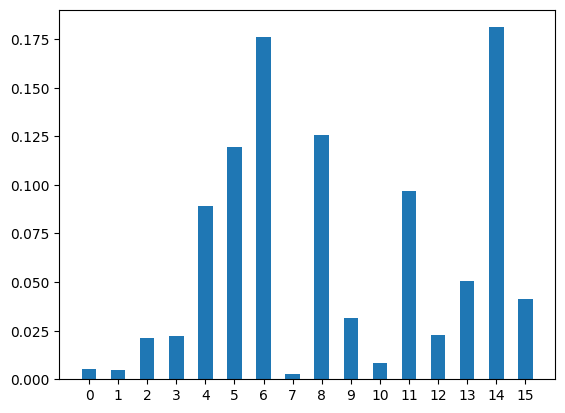



>>> Job ID: cl8600t7pau17fl76lo0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 7e-05, 13: 0.00352, 0: 0.00265, 7: 0.00122, 3: 0.03252, 1: 0.0095, 9: 0.02464, 8: 0.12913, 11: 0.02485, 5: 0.1681, 12: 0.0756, 6: 0.18318, 4: 0.04197, 15: 0.03857, 10: 0.03749, 14: 0.22699}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 7e-05, 13: 0.00352, 0: 0.00265, 7: 0.00122, 3: 0.03252, 1: 0.0095, 9: 0.02464, 8: 0.12913, 11: 0.02485, 5: 0.1681, 12: 0.0756, 6: 0.18318, 4: 0.04197, 15: 0.03857, 10: 0.03749, 14: 0.22699}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
29
{2: 7e-05, 13: 0.00352, 0: 0.00265, 7: 0.00122, 3: 0.03252, 1: 0.0095, 9: 0.02464, 8: 0.12913, 11: 0.02485, 5: 0.1681, 12: 0.0756, 6: 0.18318, 4: 0.04197, 15: 0.03857, 10: 0.03749, 14: 0.22699}
0.00501718025


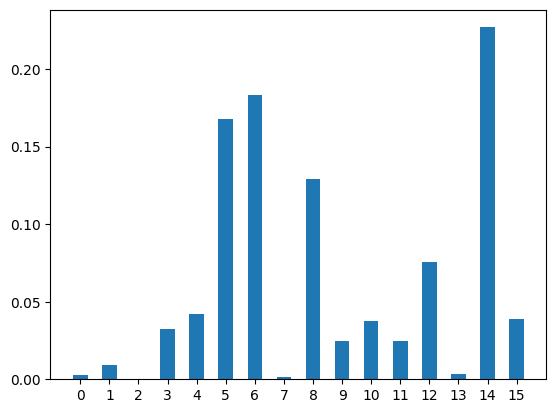



>>> Job ID: cl8602f75e3r3c6jd1b0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00164, 11: 0.00403, 2: 0.01006, 10: 0.02876, 15: 0.03635, 8: 0.08333, 9: 0.04338, 13: 0.06244, 14: 0.2076, 12: 0.05542, 5: 0.20071, 6: 0.12743, 4: 0.01011, 0: 0.02475, 3: 0.04312, 7: 0.06087}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00164, 11: 0.00403, 2: 0.01006, 10: 0.02876, 15: 0.03635, 8: 0.08333, 9: 0.04338, 13: 0.06244, 14: 0.2076, 12: 0.05542, 5: 0.20071, 6: 0.12743, 4: 0.01011, 0: 0.02475, 3: 0.04312, 7: 0.06087}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
30
{1: 0.00164, 11: 0.00403, 2: 0.01006, 10: 0.02876, 15: 0.03635, 8: 0.08333, 9: 0.04338, 13: 0.06244, 14: 0.2076, 12: 0.05542, 5: 0.20071, 6: 0.12743, 4: 0.01011, 0: 0.02475, 3: 0.04312, 7: 0.06087}
0.0038415232749999997


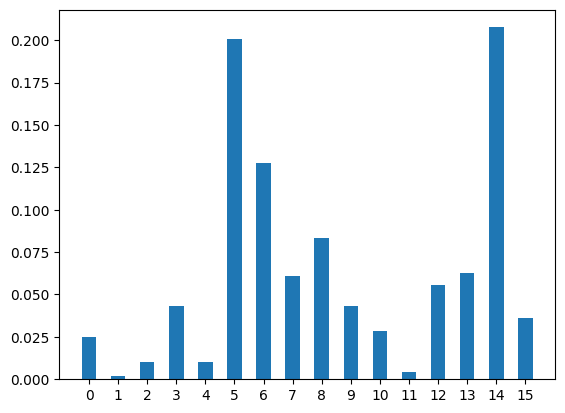



>>> Job ID: cl8603h5o5utp9c00t2g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.01308, 9: 0.00357, 1: 0.00887, 8: 0.07117, 2: 0.00614, 13: 0.05954, 3: 0.04865, 0: 0.05232, 7: 0.06062, 14: 0.15554, 4: 0.03616, 6: 0.11107, 10: 0.01119, 15: 0.11542, 5: 0.18784, 12: 0.05882}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.01308, 9: 0.00357, 1: 0.00887, 8: 0.07117, 2: 0.00614, 13: 0.05954, 3: 0.04865, 0: 0.05232, 7: 0.06062, 14: 0.15554, 4: 0.03616, 6: 0.11107, 10: 0.01119, 15: 0.11542, 5: 0.18784, 12: 0.05882}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
31
{11: 0.01308, 9: 0.00357, 1: 0.00887, 8: 0.07117, 2: 0.00614, 13: 0.05954, 3: 0.04865, 0: 0.05232, 7: 0.06062, 14: 0.15554, 4: 0.03616, 6: 0.11107, 10: 0.01119, 15: 0.11542, 5: 0.18784, 12: 0.05882}
0.0028260506375


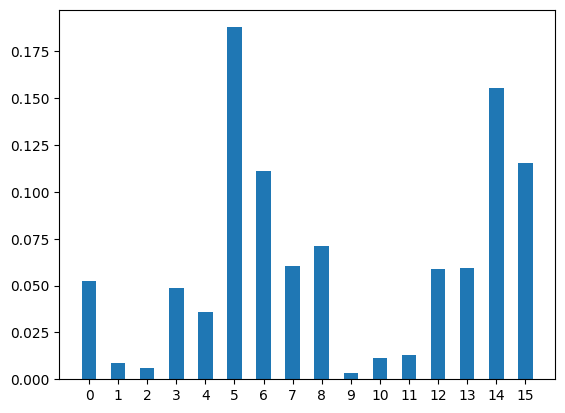



>>> Job ID: cl860557pau17fl76no0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00029, 2: 0.00238, 11: 0.01048, 14: 0.00856, 1: 0.00904, 3: 0.01402, 0: 0.10328, 7: 0.07184, 9: 0.06928, 8: 0.07131, 12: 0.04644, 5: 0.15691, 4: 0.01926, 6: 0.14992, 15: 0.21436, 10: 0.05263}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00029, 2: 0.00238, 11: 0.01048, 14: 0.00856, 1: 0.00904, 3: 0.01402, 0: 0.10328, 7: 0.07184, 9: 0.06928, 8: 0.07131, 12: 0.04644, 5: 0.15691, 4: 0.01926, 6: 0.14992, 15: 0.21436, 10: 0.05263}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
32
{13: 0.00029, 2: 0.00238, 11: 0.01048, 14: 0.00856, 1: 0.00904, 3: 0.01402, 0: 0.10328, 7: 0.07184, 9: 0.06928, 8: 0.07131, 12: 0.04644, 5: 0.15691, 4: 0.01926, 6: 0.14992, 15: 0.21436, 10: 0.05263}
0.0038765134499999993


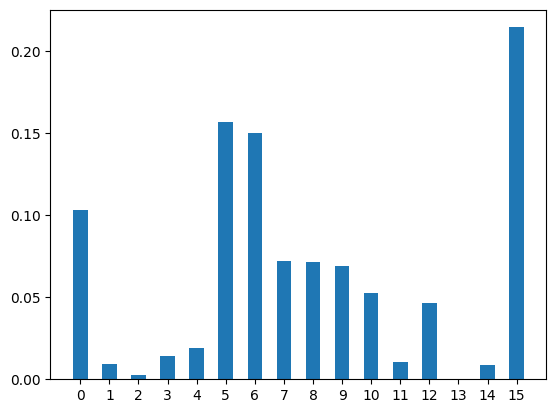



>>> Job ID: cl8606t7pau17fl76ofg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00122, 14: 0.00081, 1: 0.00786, 11: 0.04734, 13: 0.03344, 8: 0.05378, 4: 0.01768, 6: 0.27512, 10: 0.0035, 15: 0.21392, 3: 0.07355, 0: 0.11208, 7: 0.06576, 5: 0.04379, 12: 0.01531, 9: 0.03484}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00122, 14: 0.00081, 1: 0.00786, 11: 0.04734, 13: 0.03344, 8: 0.05378, 4: 0.01768, 6: 0.27512, 10: 0.0035, 15: 0.21392, 3: 0.07355, 0: 0.11208, 7: 0.06576, 5: 0.04379, 12: 0.01531, 9: 0.03484}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
33
{2: 0.00122, 14: 0.00081, 1: 0.00786, 11: 0.04734, 13: 0.03344, 8: 0.05378, 4: 0.01768, 6: 0.27512, 10: 0.0035, 15: 0.21392, 3: 0.07355, 0: 0.11208, 7: 0.06576, 5: 0.04379, 12: 0.01531, 9: 0.03484}
0.005703426699999999


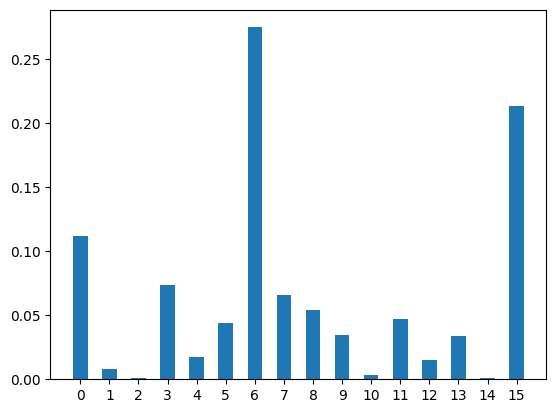



>>> Job ID: cl8608dfa6vtjv91gt8g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00445, 1: 0.02828, 11: 0.04174, 9: 0.03015, 2: 0.004, 8: 0.02274, 13: 0.06265, 12: 0.02302, 5: 0.04445, 10: 0.01153, 15: 0.14932, 3: 0.01946, 0: 0.15435, 7: 0.04938, 6: 0.27491, 4: 0.07957}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00445, 1: 0.02828, 11: 0.04174, 9: 0.03015, 2: 0.004, 8: 0.02274, 13: 0.06265, 12: 0.02302, 5: 0.04445, 10: 0.01153, 15: 0.14932, 3: 0.01946, 0: 0.15435, 7: 0.04938, 6: 0.27491, 4: 0.07957}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
34
{14: 0.00445, 1: 0.02828, 11: 0.04174, 9: 0.03015, 2: 0.004, 8: 0.02274, 13: 0.06265, 12: 0.02302, 5: 0.04445, 10: 0.01153, 15: 0.14932, 3: 0.01946, 0: 0.15435, 7: 0.04938, 6: 0.27491, 4: 0.07957}
0.004931997424999999


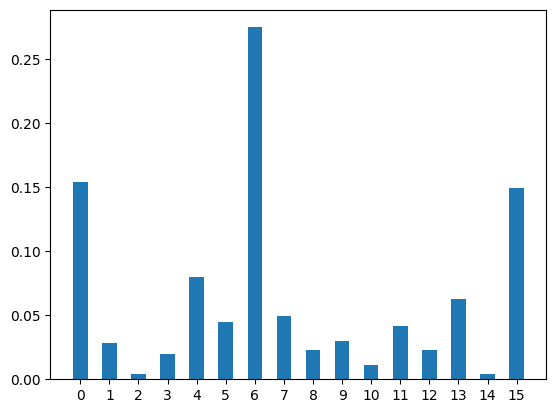



>>> Job ID: cl860a95o5utp9c0102g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.04207, 12: 0.00989, 5: 0.02253, 9: 0.02594, 8: 0.02155, 13: 0.03107, 4: 0.0791, 6: 0.18181, 14: 0.06068, 0: 0.08626, 3: 0.02327, 7: 0.15344, 2: 0.02722, 10: 0.01268, 15: 0.0641, 1: 0.15839}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.04207, 12: 0.00989, 5: 0.02253, 9: 0.02594, 8: 0.02155, 13: 0.03107, 4: 0.0791, 6: 0.18181, 14: 0.06068, 0: 0.08626, 3: 0.02327, 7: 0.15344, 2: 0.02722, 10: 0.01268, 15: 0.0641, 1: 0.15839}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
35
{11: 0.04207, 12: 0.00989, 5: 0.02253, 9: 0.02594, 8: 0.02155, 13: 0.03107, 4: 0.0791, 6: 0.18181, 14: 0.06068, 0: 0.08626, 3: 0.02327, 7: 0.15344, 2: 0.02722, 10: 0.01268, 15: 0.0641, 1: 0.15839}
0.0029122315250000004


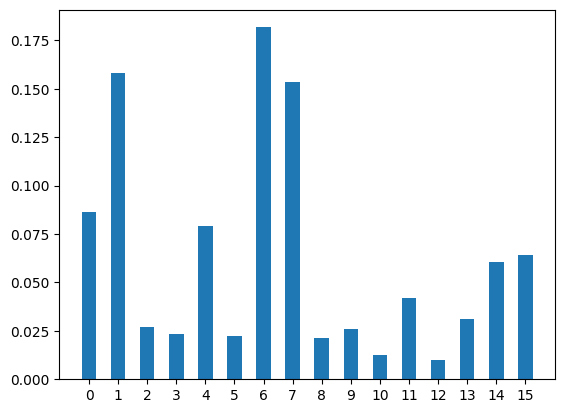



>>> Job ID: cl860c57pau17fl76qo0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.07581, 9: 0.03276, 13: 0.00904, 12: 0.04555, 5: 0.01632, 8: 0.03333, 10: 0.02456, 15: 0.06066, 4: 0.06756, 6: 0.1798, 3: 0.02481, 0: 0.05522, 7: 0.15853, 1: 0.1577, 14: 0.04463, 11: 0.01372}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.07581, 9: 0.03276, 13: 0.00904, 12: 0.04555, 5: 0.01632, 8: 0.03333, 10: 0.02456, 15: 0.06066, 4: 0.06756, 6: 0.1798, 3: 0.02481, 0: 0.05522, 7: 0.15853, 1: 0.1577, 14: 0.04463, 11: 0.01372}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
36
{2: 0.07581, 9: 0.03276, 13: 0.00904, 12: 0.04555, 5: 0.01632, 8: 0.03333, 10: 0.02456, 15: 0.06066, 4: 0.06756, 6: 0.1798, 3: 0.02481, 0: 0.05522, 7: 0.15853, 1: 0.1577, 14: 0.04463, 11: 0.01372}
0.0028047039125


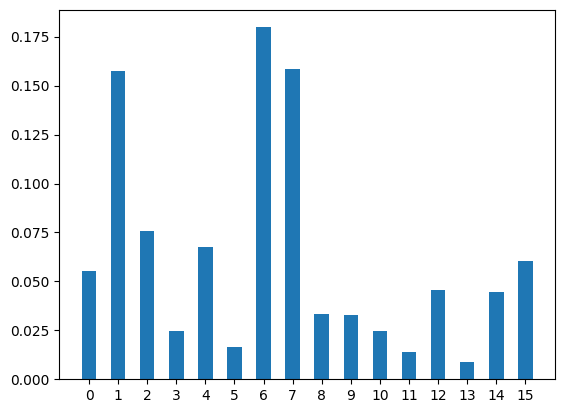



>>> Job ID: cl860dtfa6vtjv91gvt0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00614, 1: 0.15241, 11: 0.02287, 8: 0.02228, 2: 0.07594, 6: 0.15321, 4: 0.0541, 13: 0.0594, 3: 0.00975, 0: 0.05794, 7: 0.1691, 10: 0.02492, 15: 0.07269, 5: 0.03048, 12: 0.05225, 14: 0.03652}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00614, 1: 0.15241, 11: 0.02287, 8: 0.02228, 2: 0.07594, 6: 0.15321, 4: 0.0541, 13: 0.0594, 3: 0.00975, 0: 0.05794, 7: 0.1691, 10: 0.02492, 15: 0.07269, 5: 0.03048, 12: 0.05225, 14: 0.03652}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
37
{9: 0.00614, 1: 0.15241, 11: 0.02287, 8: 0.02228, 2: 0.07594, 6: 0.15321, 4: 0.0541, 13: 0.0594, 3: 0.00975, 0: 0.05794, 7: 0.1691, 10: 0.02492, 15: 0.07269, 5: 0.03048, 12: 0.05225, 14: 0.03652}
0.0025266164125


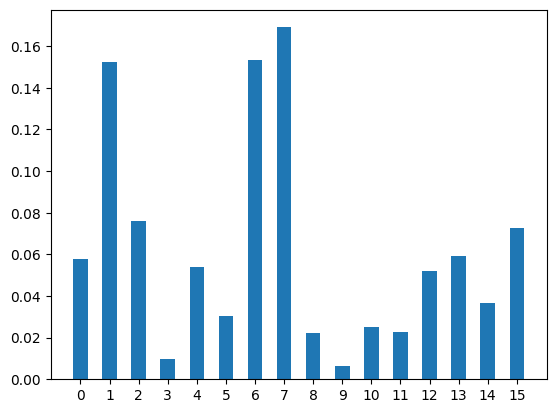



>>> Job ID: cl860fvl4q34kqgq1g2g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00349, 13: 0.01502, 11: 0.03578, 5: 0.04053, 12: 0.05584, 1: 0.08125, 8: 0.03008, 3: 0.00604, 0: 0.10751, 7: 0.25117, 4: 0.04377, 6: 0.04941, 2: 0.10929, 10: 0.06618, 15: 0.00924, 14: 0.0954}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00349, 13: 0.01502, 11: 0.03578, 5: 0.04053, 12: 0.05584, 1: 0.08125, 8: 0.03008, 3: 0.00604, 0: 0.10751, 7: 0.25117, 4: 0.04377, 6: 0.04941, 2: 0.10929, 10: 0.06618, 15: 0.00924, 14: 0.0954}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
38
{9: 0.00349, 13: 0.01502, 11: 0.03578, 5: 0.04053, 12: 0.05584, 1: 0.08125, 8: 0.03008, 3: 0.00604, 0: 0.10751, 7: 0.25117, 4: 0.04377, 6: 0.04941, 2: 0.10929, 10: 0.06618, 15: 0.00924, 14: 0.0954}
0.0034896368750000004


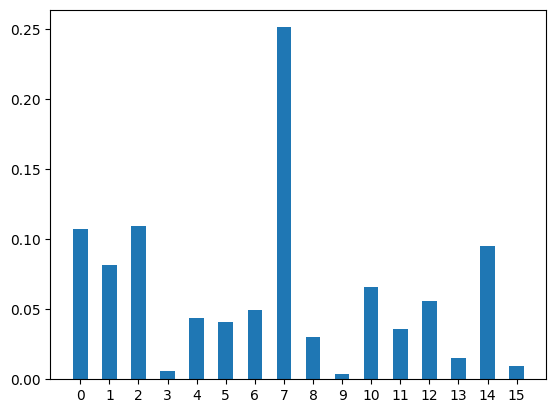



>>> Job ID: cl860i775e3r3c6jd8b0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00288, 9: 0.02367, 13: 0.00293, 1: 0.00913, 8: 0.03173, 2: 0.08602, 0: 0.11447, 3: 0.05642, 7: 0.28147, 12: 0.04837, 5: 0.05576, 10: 0.09548, 15: 0.09139, 4: 0.03364, 6: 0.02112, 11: 0.04552}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00288, 9: 0.02367, 13: 0.00293, 1: 0.00913, 8: 0.03173, 2: 0.08602, 0: 0.11447, 3: 0.05642, 7: 0.28147, 12: 0.04837, 5: 0.05576, 10: 0.09548, 15: 0.09139, 4: 0.03364, 6: 0.02112, 11: 0.04552}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
39
{14: 0.00288, 9: 0.02367, 13: 0.00293, 1: 0.00913, 8: 0.03173, 2: 0.08602, 0: 0.11447, 3: 0.05642, 7: 0.28147, 12: 0.04837, 5: 0.05576, 10: 0.09548, 15: 0.09139, 4: 0.03364, 6: 0.02112, 11: 0.04552}
0.00429036675


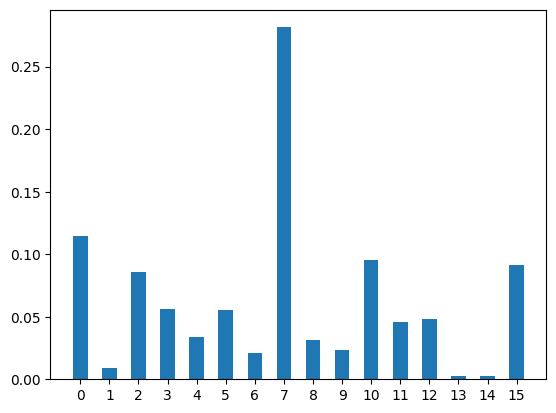



>>> Job ID: cl860jlfa6vtjv91h2a0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00275, 9: 0.02166, 13: 0.00867, 2: 0.07411, 15: 0.04111, 10: 0.04819, 11: 0.04978, 1: 0.0354, 8: 0.07784, 4: 0.02422, 6: 0.01978, 3: 0.07396, 0: 0.14118, 7: 0.23145, 5: 0.0811, 12: 0.0688}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00275, 9: 0.02166, 13: 0.00867, 2: 0.07411, 15: 0.04111, 10: 0.04819, 11: 0.04978, 1: 0.0354, 8: 0.07784, 4: 0.02422, 6: 0.01978, 3: 0.07396, 0: 0.14118, 7: 0.23145, 5: 0.0811, 12: 0.0688}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
40
{14: 0.00275, 9: 0.02166, 13: 0.00867, 2: 0.07411, 15: 0.04111, 10: 0.04819, 11: 0.04978, 1: 0.0354, 8: 0.07784, 4: 0.02422, 6: 0.01978, 3: 0.07396, 0: 0.14118, 7: 0.23145, 5: 0.0811, 12: 0.0688}
0.0030378902874999996


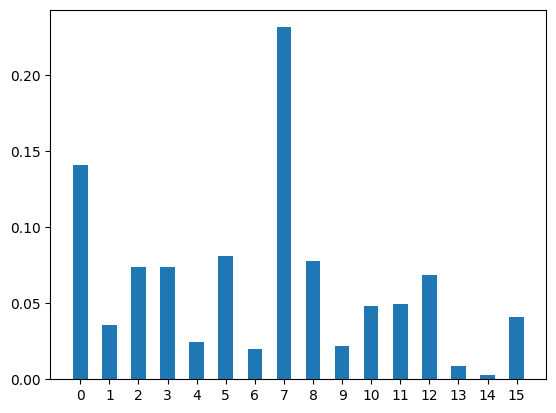



>>> Job ID: cl860llfa6vtjv91h390
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.005, 11: 0.01331, 13: 0.01619, 4: 0.00548, 6: 0.01803, 9: 0.07091, 14: 0.00656, 15: 0.01279, 10: 0.09876, 8: 0.15786, 12: 0.03883, 5: 0.10224, 3: 0.05479, 7: 0.15189, 0: 0.16886, 2: 0.0785}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.005, 11: 0.01331, 13: 0.01619, 4: 0.00548, 6: 0.01803, 9: 0.07091, 14: 0.00656, 15: 0.01279, 10: 0.09876, 8: 0.15786, 12: 0.03883, 5: 0.10224, 3: 0.05479, 7: 0.15189, 0: 0.16886, 2: 0.0785}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
41
{1: 0.005, 11: 0.01331, 13: 0.01619, 4: 0.00548, 6: 0.01803, 9: 0.07091, 14: 0.00656, 15: 0.01279, 10: 0.09876, 8: 0.15786, 12: 0.03883, 5: 0.10224, 3: 0.05479, 7: 0.15189, 0: 0.16886, 2: 0.0785}
0.003183549925


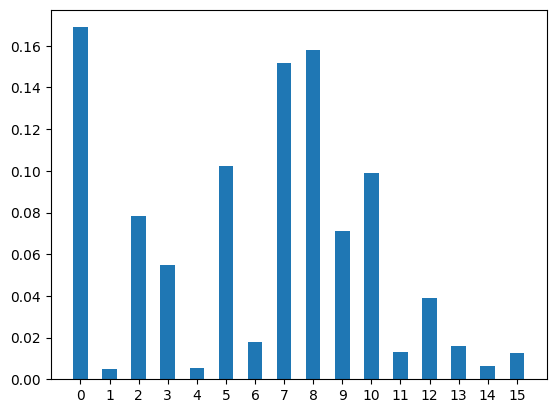



>>> Job ID: cl860n96mcdhud4k2tcg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01568, 2: 0.0771, 6: 0.024, 4: 0.01413, 11: 0.09496, 12: 0.03736, 5: 0.08981, 14: 0.01627, 8: 0.21009, 1: 0.15627, 15: 0.00804, 10: 0.0469, 3: 0.02694, 7: 0.10389, 0: 0.02987, 13: 0.04869}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01568, 2: 0.0771, 6: 0.024, 4: 0.01413, 11: 0.09496, 12: 0.03736, 5: 0.08981, 14: 0.01627, 8: 0.21009, 1: 0.15627, 15: 0.00804, 10: 0.0469, 3: 0.02694, 7: 0.10389, 0: 0.02987, 13: 0.04869}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
42
{9: 0.01568, 2: 0.0771, 6: 0.024, 4: 0.01413, 11: 0.09496, 12: 0.03736, 5: 0.08981, 14: 0.01627, 8: 0.21009, 1: 0.15627, 15: 0.00804, 10: 0.0469, 3: 0.02694, 7: 0.10389, 0: 0.02987, 13: 0.04869}
0.003050865675


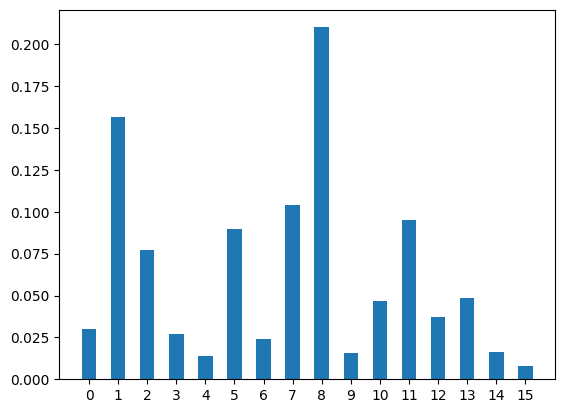



>>> Job ID: cl860pp5o5utp9c017fg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.03132, 11: 0.06431, 4: 0.01632, 6: 0.06994, 5: 0.04478, 12: 0.05989, 13: 0.02565, 15: 0.01991, 10: 0.06311, 2: 0.08821, 8: 0.22958, 1: 0.13575, 0: 0.00111, 7: 0.07152, 3: 0.01979, 9: 0.05881}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.03132, 11: 0.06431, 4: 0.01632, 6: 0.06994, 5: 0.04478, 12: 0.05989, 13: 0.02565, 15: 0.01991, 10: 0.06311, 2: 0.08821, 8: 0.22958, 1: 0.13575, 0: 0.00111, 7: 0.07152, 3: 0.01979, 9: 0.05881}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
43
{14: 0.03132, 11: 0.06431, 4: 0.01632, 6: 0.06994, 5: 0.04478, 12: 0.05989, 13: 0.02565, 15: 0.01991, 10: 0.06311, 2: 0.08821, 8: 0.22958, 1: 0.13575, 0: 0.00111, 7: 0.07152, 3: 0.01979, 9: 0.05881}
0.0028929108375


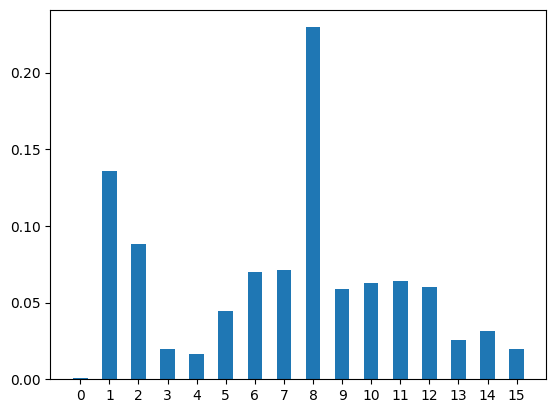



>>> Job ID: cl860rp5o5utp9c018h0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.03789, 4: 0.00507, 6: 0.08787, 14: 0.02646, 11: 0.12508, 12: 0.02226, 5: 0.03858, 1: 0.12059, 8: 0.22764, 9: 0.06486, 0: 0.01997, 3: 0.05817, 7: 0.04185, 15: 0.00518, 10: 0.01863, 2: 0.0999}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.03789, 4: 0.00507, 6: 0.08787, 14: 0.02646, 11: 0.12508, 12: 0.02226, 5: 0.03858, 1: 0.12059, 8: 0.22764, 9: 0.06486, 0: 0.01997, 3: 0.05817, 7: 0.04185, 15: 0.00518, 10: 0.01863, 2: 0.0999}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
44
{13: 0.03789, 4: 0.00507, 6: 0.08787, 14: 0.02646, 11: 0.12508, 12: 0.02226, 5: 0.03858, 1: 0.12059, 8: 0.22764, 9: 0.06486, 0: 0.01997, 3: 0.05817, 7: 0.04185, 15: 0.00518, 10: 0.01863, 2: 0.0999}
0.0032167615500000002


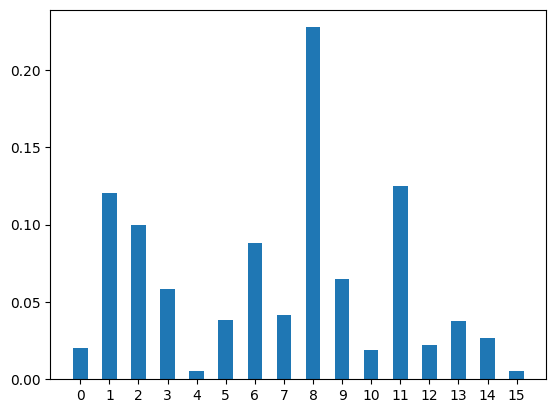



>>> Job ID: cl860u16mcdhud4k30ag
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{5: 0.00068, 12: 0.00951, 14: 0.03699, 9: 0.02472, 15: 0.01658, 10: 0.11894, 1: 0.07778, 13: 0.03591, 2: 0.07866, 4: 0.02708, 6: 0.12161, 11: 0.13237, 8: 0.21821, 7: 0.01934, 0: 0.00672, 3: 0.0749}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {5: 0.00068, 12: 0.00951, 14: 0.03699, 9: 0.02472, 15: 0.01658, 10: 0.11894, 1: 0.07778, 13: 0.03591, 2: 0.07866, 4: 0.02708, 6: 0.12161, 11: 0.13237, 8: 0.21821, 7: 0.01934, 0: 0.00672, 3: 0.0749}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
45
{5: 0.00068, 12: 0.00951, 14: 0.03699, 9: 0.02472, 15: 0.01658, 10: 0.11894, 1: 0.07778, 13: 0.03591, 2: 0.07866, 4: 0.02708, 6: 0.12161, 11: 0.13237, 8: 0.21821, 7: 0.01934, 0: 0.00672, 3: 0.0749}
0.0033879660374999993


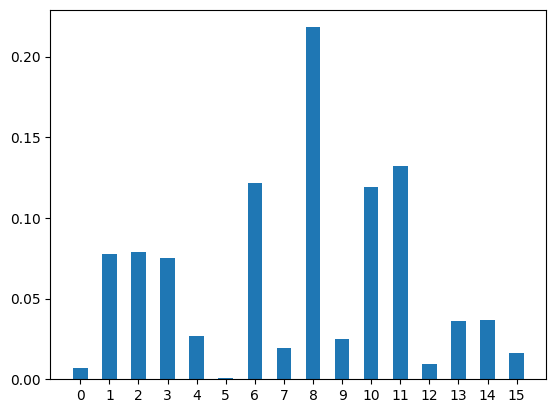



>>> Job ID: cl860vp6mcdhud4k3120
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01733, 2: 0.01468, 0: 0.02255, 7: 0.02284, 3: 0.11502, 14: 0.023, 13: 0.06089, 5: 0.00364, 12: 0.04251, 11: 0.1, 6: 0.11953, 4: 0.08799, 8: 0.18147, 1: 0.06953, 15: 0.03661, 10: 0.08241}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01733, 2: 0.01468, 0: 0.02255, 7: 0.02284, 3: 0.11502, 14: 0.023, 13: 0.06089, 5: 0.00364, 12: 0.04251, 11: 0.1, 6: 0.11953, 4: 0.08799, 8: 0.18147, 1: 0.06953, 15: 0.03661, 10: 0.08241}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
46
{9: 0.01733, 2: 0.01468, 0: 0.02255, 7: 0.02284, 3: 0.11502, 14: 0.023, 13: 0.06089, 5: 0.00364, 12: 0.04251, 11: 0.1, 6: 0.11953, 4: 0.08799, 8: 0.18147, 1: 0.06953, 15: 0.03661, 10: 0.08241}
0.0022662302874999997


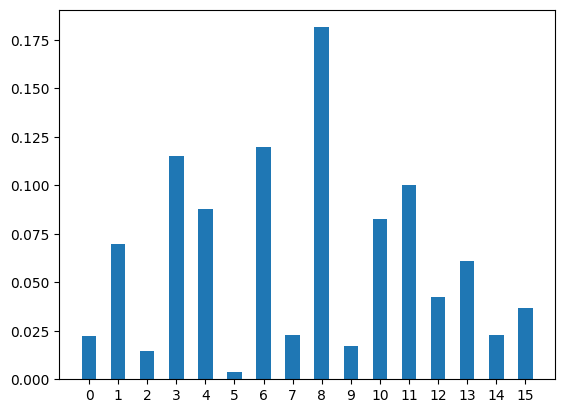



>>> Job ID: cl8611tfa6vtjv91h8r0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{5: 0.00799, 12: 0.03635, 9: 0.0947, 11: 0.08366, 13: 0.10116, 2: 0.05552, 14: 0.01612, 1: 0.04874, 8: 0.10213, 6: 0.0637, 4: 0.14234, 0: 0.01214, 7: 0.0751, 3: 0.07082, 10: 0.05683, 15: 0.0327}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {5: 0.00799, 12: 0.03635, 9: 0.0947, 11: 0.08366, 13: 0.10116, 2: 0.05552, 14: 0.01612, 1: 0.04874, 8: 0.10213, 6: 0.0637, 4: 0.14234, 0: 0.01214, 7: 0.0751, 3: 0.07082, 10: 0.05683, 15: 0.0327}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
47
{5: 0.00799, 12: 0.03635, 9: 0.0947, 11: 0.08366, 13: 0.10116, 2: 0.05552, 14: 0.01612, 1: 0.04874, 8: 0.10213, 6: 0.0637, 4: 0.14234, 0: 0.01214, 7: 0.0751, 3: 0.07082, 10: 0.05683, 15: 0.0327}
0.0012908881


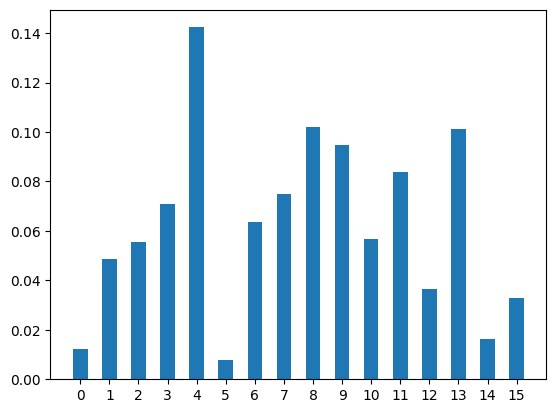



>>> Job ID: cl861416mcdhud4k3400
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0027, 4: 0.02765, 6: 0.02615, 14: 0.02384, 10: 0.04693, 15: 0.03674, 11: 0.10161, 2: 0.10108, 13: 0.12764, 0: 0.01244, 3: 0.03228, 7: 0.10612, 5: 0.14729, 12: 0.04424, 9: 0.09047, 8: 0.07282}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0027, 4: 0.02765, 6: 0.02615, 14: 0.02384, 10: 0.04693, 15: 0.03674, 11: 0.10161, 2: 0.10108, 13: 0.12764, 0: 0.01244, 3: 0.03228, 7: 0.10612, 5: 0.14729, 12: 0.04424, 9: 0.09047, 8: 0.07282}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
48
{1: 0.0027, 4: 0.02765, 6: 0.02615, 14: 0.02384, 10: 0.04693, 15: 0.03674, 11: 0.10161, 2: 0.10108, 13: 0.12764, 0: 0.01244, 3: 0.03228, 7: 0.10612, 5: 0.14729, 12: 0.04424, 9: 0.09047, 8: 0.07282}
0.0018442039125000002


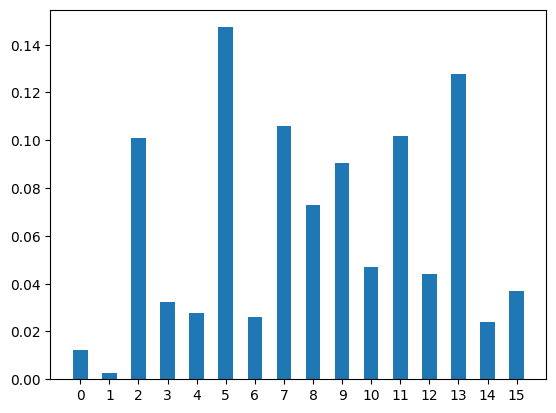



>>> Job ID: cl8616fl4q34kqgq1rp0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.02212, 11: 0.01718, 15: 0.00436, 10: 0.02394, 1: 0.01215, 2: 0.10209, 9: 0.12413, 5: 0.06014, 12: 0.13631, 4: 0.01655, 6: 0.12068, 13: 0.11629, 7: 0.11883, 0: 0.03097, 3: 0.0645, 14: 0.02976}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.02212, 11: 0.01718, 15: 0.00436, 10: 0.02394, 1: 0.01215, 2: 0.10209, 9: 0.12413, 5: 0.06014, 12: 0.13631, 4: 0.01655, 6: 0.12068, 13: 0.11629, 7: 0.11883, 0: 0.03097, 3: 0.0645, 14: 0.02976}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
49
{8: 0.02212, 11: 0.01718, 15: 0.00436, 10: 0.02394, 1: 0.01215, 2: 0.10209, 9: 0.12413, 5: 0.06014, 12: 0.13631, 4: 0.01655, 6: 0.12068, 13: 0.11629, 7: 0.11883, 0: 0.03097, 3: 0.0645, 14: 0.02976}
0.0022211631


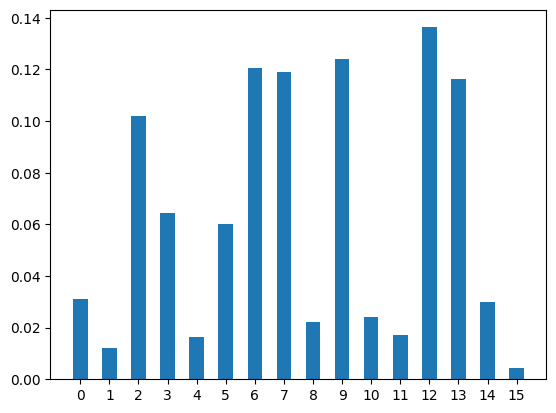

In [35]:
var2 = []
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

    qc1 = QuantumCircuit(2)
    qc1.swap(0,1)
    CSwapgate = qc1.to_gate().control(2)

    circuit.x(p2)
    circuit.append(CSwapgate, [p1,p2,p0,p3])
    circuit.x(p2)
    circuit.x(p1)
    circuit.append(C3XGate(), [p0,p1,p3,p2])
    circuit.x(p1)

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  job = sampler.run(circuit, shots=100000)
  print(f">>> Job ID: {job.job_id()}")
  print(f">>> Job Status: {job.status()}")

  result = job.result()
  print(f">>> {result}")
  print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
  print(f"  > Metadata: {result.metadata[0]}")

  print(N)
  cnts = dict(result.quasi_dists[0])
  print(cnts)

  board = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  prob = []
  for i in range(16):
    prob.append(cnts.get(i, 0))

  var2.append(np.var(prob))
  print(np.var(prob))
  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

compare variance between task3 and task4

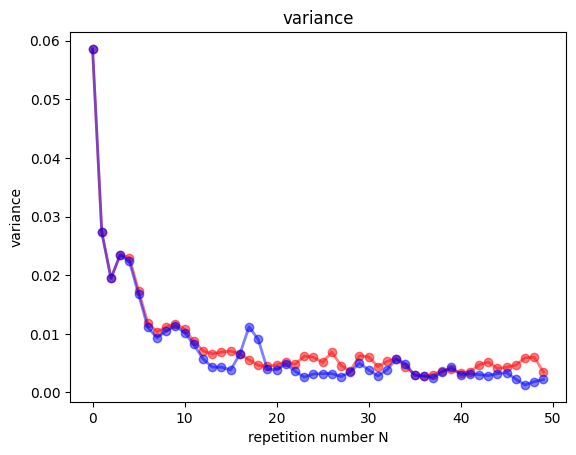

In [36]:
n = [i for i in range(50)]
plt.plot(n, var1, color='red', marker='o', alpha=0.5, linewidth=2)
plt.plot(n, var2, color='blue', marker='o', alpha=0.5, linewidth=2)

plt.title("variance")
plt.xlabel("repetition number N")
plt.ylabel("variance")
plt.show()